**Quantitative and Qualitative Insights on Unemployment Rate in South Africa During COVID-19 Pandemic Using Twitter Data**


Please kindly cite our manuscript if you use our code:

Nia ZM, Asgary A, Bragazzi N, Mellado B, Orbinski J, Wu J and Kong J (2022) Nowcasting unemployment rate during the COVID-19 pandemic using Twitter data: The case of South Africa. Front. Public Health 10:952363. doi: 10.3389/fpubh.2022.952363

# Data Gathering

This part retrieves tweets for tracing unemployment rate of South Africa.
If you have a Twitter Academic Researcher Developer's account, you can use this code to retrieve tweets using the full_archive search.
This code has been written with the help of Postman. See this link:
https://developer.twitter.com/en/docs/twitter-api/tweets/search/quick-start/full-archive-search

The query used for gathering the dataset is as below:

_____________________________________________________________

place_country:ZA (employed OR unemployed OR employment OR unemployment OR jobless OR "lost his job" OR "lost her job" OR "lost my job" OR "lost their jobs" OR layoff OR "lay-off" OR "lay off" OR "laid off" OR "laid-off" OR "laid her off" OR "laid him off" OR "laid me off" OR "laid them off" OR retrench OR retrenched OR retrenches OR retrenchment OR retrenchments OR retrenching OR bankrupt OR bankruptcy OR debt OR loan OR famine OR inflation OR "be broke" OR "being broke" OR "am broke" OR "are broke" OR "is broke" OR career OR hire OR hired OR hires OR money OR buy OR rent OR lend OR poverty OR payment OR afford OR axed OR canned OR downsized OR outsourced OR "pink slip" OR "fired job" OR "been fired") -is:retweet
_____________________________________________________________

We clean the data as we gather it.

**Note: This part may take more than 12 hours. You may want to execute it locally.**

In [ ]:
bearer_token = 'your Twitter bearer_token'
file_path = 'path to the .csv files'

In [ ]:
bearer_token = 'Bearer ' + bearer_token
file_path1 = file_path + '/dataset1.csv'

In [ ]:
import pandas as pd
import numpy as np
import re
import codecs
import time

In [ ]:
# This part is from Postman
import requests

url = "https://api.twitter.com/2/tweets/search/all?query=place_country:ZA (employed OR unemployed OR employment OR unemployment OR jobless OR \"lost his job\" OR \"lost her job\" OR \"lost my job\" OR \"lost their jobs\" OR layoff OR \"lay-off\" OR \"lay off\" OR \"laid off\" OR \"laid-off\" OR \"laid her off\" OR \"laid him off\" OR \"laid me off\" OR \"laid them off\" OR retrench OR retrenched OR retrenches OR retrenchment OR retrenchments OR retrenching OR bankrupt OR bankruptcy OR debt OR loan OR famine OR inflation OR \"be broke\" OR \"being broke\" OR \"am broke\" OR \"are broke\" OR \"is broke\" OR career OR hire OR money OR buy OR rent OR lend OR poverty OR payment OR afford OR axed OR canned OR downsized OR outsourced OR \"pink slip\" OR \"fired job\" OR \"been fired\") -is:retweet&start_time=2006-03-21T00:00:00Z&end_time=2021-12-24T00:00:00Z&max_results=100&{}tweet.fields=attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,id,in_reply_to_user_id,lang,possibly_sensitive,public_metrics,referenced_tweets,reply_settings,source,text,withheld&expansions=attachments.poll_ids,attachments.media_keys,author_id,geo.place_id,in_reply_to_user_id,referenced_tweets.id,entities.mentions.username,referenced_tweets.id.author_id&media.fields=duration_ms,height,media_key,preview_image_url,public_metrics,type,url,width&place.fields=contained_within,country,country_code,full_name,geo,id,name,place_type&poll.fields=duration_minutes,end_datetime,id,options,voting_status&user.fields=created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld".format("")

payload={}
headers = {
  'Authorization': bearer_token,
  'Cookie': 'guest_id=v1%3A162293170903148426; guest_id_ads=v1%3A162293170903148426; guest_id_marketing=v1%3A162293170903148426; personalization_id="v1_haPFQuaTsVH4ulEJ4+U9BA=="'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


In [ ]:
columns = ['OriginalText', 'CleanedText', 'TweetID', 'ConversationID', 'CreateDate', 'Type', 'RetweetCount', 'ReplyCount', 'LikeCount', 'GeoId', 'GeoCityProvince', 'GeoCountry', 'GeoCoordinate(bbox)', 'AuthorID', 'Name', 'UserName', 'Descreption', 'Location', 'Hashtags', 'CreatedAccountAt', 'FollowerCount', 'FollowingCount', 'TweetCount']

In [ ]:
data = response.json()

In [ ]:
# Preparing data to write to file.

rows = []
for items in data['data']:
    d = []
#--------------------------------------------------------------------
    d.append (items ['text'])
#--------------------------------------------------------------------
    typ = 'tweet'
    if 'referenced_tweets' in items:
        typ = items['referenced_tweets'][0]['type']

    # Cleaning the Data: Removing punctuations and urls
    l = items ['text']
    l = re.sub ('\n', ' ', l)
    #l = re.sub (',', '-', l)
    l = re.sub ('\S+@\S+', '', l)
    l = re.sub ('@\S+', '', l)
    l = re.sub ('#\S+', '', l)
    l = re.sub ('http\S+', '', l)
    l = l.replace ('....', '.')
    l = l.replace ('...', '.')
    l = l.replace ('..', '.')
    l = l.replace ('   ', ' ')
    l = l.replace ('  ', ' ')

    p1 = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890#,.!?' -$%"
    txt = ''
    for letter in l:
        if letter in p1 or letter == '"':
            txt += letter

    txt = txt.replace ('....', '.')
    txt = txt.replace ('...', '.')
    txt = txt.replace ('..', '.')
    txt = txt.replace ('   ', ' ')
    txt = txt.replace ('  ', ' ')

    if len(txt) > 0  and txt[(len(txt) - 1)] == ' ':
        txt = txt[0:(len(txt) - 1)]
    if txt != '' and txt[(len(txt) - 1)] != '.':
        txt += '.'

    txt = txt.replace ('....', '.')
    txt = txt.replace ('...', '.')
    txt = txt.replace ('..', '.')
    txt = txt.replace ('   ', ' ')
    txt = txt.replace ('  ', ' ')

    d.append (txt)
#---------------------------------------------------------------------
    d.append ((str (items ['id']) + '-'))
    d.append ((str (items ['conversation_id']) + '-'))
    d.append (str (items ['created_at']))
    d.append (typ)

    if 'retweet_count' in items ['public_metrics']:
        d.append (str(items ['public_metrics']['retweet_count']))
    else:
        d.append ('')

    if 'reply_count' in items ['public_metrics']:
        d.append (str(items ['public_metrics']['reply_count']))
    else:
        d.append ('')

    if 'like_count' in items ['public_metrics']:
        d.append (str(items ['public_metrics']['like_count']))
    else:
        d.append ('')

    if 'geo' in items and 'place_id' in items['geo']:
        d.append ((str(items['geo']['place_id']) + '-'))
        for p in data ['includes']['places']:
            if p['id'] == items['geo']['place_id']:
                d.append (str(p['full_name']))
                d.append (str(p['country']))
                d.append ((str(p['geo']['bbox'][0]) + ' ' + str(p['geo']['bbox'][1]) + ' ' + str(p['geo']['bbox'][2]) + ' ' + str(p['geo']['bbox'][3])))
                break
    else:
        d.append ('')
        d.append ('')
        d.append ('')
        d.append ('')
    #    d.append ('')

    d.append ((str(items['author_id']) + '-'))

    for u in data['includes']['users']:
        if u['id'] == items['author_id']:
            d.append (str(u['name']))
            d.append (str(u['username']))

#----------------------------------------------------------------------
        # Cleaning the description
            p = re.sub ('\n', ' ', u['description'])
        #    p = re.sub (',', '-', p)
            p = re.sub ('\S+@\S+', '', p)
        #    p = re.sub ('@\S+', '', p)
            p = re.sub ('#\S+', '', p)
            p = re.sub ('http\S+', '', p)
            p = p.replace ('....', '.')
            p = p.replace ('...', '.')
            p = p.replace ('..', '.')
            p = p.replace ('   ', ' ')
            p = p.replace ('  ', ' ')
            p += '.'

            p1 = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890#,.!?' -$%"
            txt = ''
            for letter in p:
                if letter in p1 or letter == '"':
                    txt += letter

            txt = txt.replace ('....', '.')
            txt = txt.replace ('...', '.')
            txt = txt.replace ('..', '.')
            txt = txt.replace ('   ', ' ')
            txt = txt.replace ('  ', ' ')

            txt = txt.replace ('....', '.')
            txt = txt.replace ('...', '.')
            txt = txt.replace ('..', '.')
            txt = txt.replace ('   ', ' ')
            txt = txt.replace ('  ', ' ')

            #line = line + txt + ','
            p = txt
            if p[(len(p) - 1)] == ' ':
                p = p[0:(len(p) - 2)]
            if p[(len(p) - 1)] != '.':
                p += '.'
#-----------------------------------------------------------------------
            d.append (p)
            if 'location' in u:
                d.append (u['location'])
            else:
                d.append ('')

            tg = ''
            if 'entities' in u:
                if 'descriprion' in u['entities']:
                    if 'hashtags' in u['entities']['description']:
                        for t in u['entities']['description']['hashtags']:
                            tg += str( t['tag'] + ' ')
            d.append (tg)

            d.append (str(u['created_at']))
            d.append (str(u['public_metrics']['followers_count']))
            d.append (str (u['public_metrics']['following_count']))
            d.append (str(u['public_metrics']['tweet_count']))

            break


    rows.append (d)
#df = df.append (rows)
df = pd.DataFrame (rows, columns = columns)


In [ ]:
df.to_csv (file_path1, index=False, encoding='utf-8')

In [ ]:
# This is the main part for collecting the dataset.
while 'meta' not in data or 'next_token' in data['meta']:
    if 'meta' in data:
      nt = "next_token="
      nt = nt + data['meta']['next_token']
      nt = nt + "&"

 #---------- This part is from Postman again -----------
    url = "https://api.twitter.com/2/tweets/search/all?query=place_country:ZA (employed OR unemployed OR employment OR unemployment OR jobless OR \"lost his job\" OR \"lost her job\" OR \"lost my job\" OR \"lost their jobs\" OR layoff OR \"lay-off\" OR \"lay off\" OR \"laid off\" OR \"laid-off\" OR \"laid her off\" OR \"laid him off\" OR \"laid me off\" OR \"laid them off\" OR retrench OR retrenched OR retrenches OR retrenchment OR retrenchments OR retrenching OR bankrupt OR bankruptcy OR debt OR loan OR famine OR inflation OR \"be broke\" OR \"being broke\" OR \"am broke\" OR \"are broke\" OR \"is broke\" OR career OR hire OR money OR buy OR rent OR lend OR poverty OR payment OR afford OR axed OR canned OR downsized OR outsourced OR \"pink slip\" OR \"fired job\" OR \"been fired\") -is:retweet&start_time=2006-03-21T00:00:00Z&end_time=2021-12-24T00:00:00Z&max_results=100&{}tweet.fields=attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,id,in_reply_to_user_id,lang,possibly_sensitive,public_metrics,referenced_tweets,reply_settings,source,text,withheld&expansions=attachments.poll_ids,attachments.media_keys,author_id,geo.place_id,in_reply_to_user_id,referenced_tweets.id,entities.mentions.username,referenced_tweets.id.author_id&media.fields=duration_ms,height,media_key,preview_image_url,public_metrics,type,url,width&place.fields=contained_within,country,country_code,full_name,geo,id,name,place_type&poll.fields=duration_minutes,end_datetime,id,options,voting_status&user.fields=created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld".format(nt)

    payload={}
    headers = {
      'Authorization': bearer_token,
      'Cookie': 'guest_id=v1%3A162293170903148426; personalization_id="v1_haPFQuaTsVH4ulEJ4+U9BA=="'
    }

    response = requests.request("GET", url, headers=headers, data=payload)
#-------------------------------------------------------
    data = response.json()

    if 'data' in data:
        rows = []
        for items in data['data']:
            d = []
            d.append (items ['text'])
#-------------------------------------------------------
            typ = 'tweet'
            if 'referenced_tweets' in items:
                typ = items['referenced_tweets'][0]['type']

            # Cleaning the Data: Removing punctuation and urls
            l = items ['text']
            l = re.sub ('\n', ' ', l)
            #l = re.sub (',', '-', l)
            l = re.sub ('\S+@\S+', '', l)
            l = re.sub ('@\S+', '', l)
            l = re.sub ('#\S+', '', l)
            l = re.sub ('http\S+', '', l)
            l = l.replace ('....', '.')
            l = l.replace ('...', '.')
            l = l.replace ('..', '.')
            l = l.replace ('   ', ' ')
            l = l.replace ('  ', ' ')

            p1 = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890#.,!?' -$%"
            txt = ''
            for letter in l:
                if letter in p1 or letter == '"':
                    txt += letter

            txt = txt.replace ('....', '.')
            txt = txt.replace ('...', '.')
            txt = txt.replace ('..', '.')
            txt = txt.replace ('   ', ' ')
            txt = txt.replace ('  ', ' ')

            if len(txt) > 0  and txt[(len(txt) - 1)] == ' ':
                txt = txt[0:(len(txt) - 1)]
            if txt != '' and txt[(len(txt) - 1)] != '.':
                txt += '.'

            txt = txt.replace ('....', '.')
            txt = txt.replace ('...', '.')
            txt = txt.replace ('..', '.')
            txt = txt.replace ('   ', ' ')
            txt = txt.replace ('  ', ' ')
#----------------------------------------------------------------------
            d.append (txt)
#----------------------------------------------------------------------
            d.append ((str (items ['id']) + '-'))
            d.append ((str (items ['conversation_id']) + '-'))
            d.append (str (items ['created_at']))
            d.append (typ)

            if 'retweet_count' in items ['public_metrics']:
                d.append (str(items ['public_metrics']['retweet_count']))
            else:
                d.append ('')

            if 'reply_count' in items ['public_metrics']:
                d.append (str(items ['public_metrics']['reply_count']))
            else:
                d.append ('')

            if 'like_count' in items ['public_metrics']:
                d.append (str(items ['public_metrics']['like_count']))
            else:
                d.append ('')

            if 'geo' in items and 'place_id' in items['geo']:
                d.append ((str(items['geo']['place_id']) + '-'))
                for p in data ['includes']['places']:
                    if p['id'] == items['geo']['place_id']:
                        d.append (str(p['full_name']))
                        d.append (str(p['country']))
                        d.append ((str(p['geo']['bbox'][0]) + ' ' + str(p['geo']['bbox'][1]) + ' ' + str(p['geo']['bbox'][2]) + ' ' + str(p['geo']['bbox'][3])))
                        break
            else:
                d.append ('')
                d.append ('')
                d.append ('')
                d.append ('')
            #    d.append ('')

            d.append ((str(items['author_id']) + '-'))

            for u in data['includes']['users']:
                if u['id'] == items['author_id']:
                    d.append (str(u['name']))
                    d.append (str(u['username']))

#-----------------------------------------------------------------------
                # Cleaning the description
                    p = re.sub ('\n', ' ', u['description'])
                #    p = re.sub (',', '-', p)
                    p = re.sub ('\S+@\S+', '', p)
                #    p = re.sub ('@\S+', '', p)
                    p = re.sub ('#\S+', '', p)
                    p = re.sub ('http\S+', '', p)
                    p = p.replace ('....', '.')
                    p = p.replace ('...', '.')
                    p = p.replace ('..', '.')
                    p = p.replace ('   ', ' ')
                    p = p.replace ('  ', ' ')
                    p += '.'

                    p1 = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890#.,!?' -$%"
                    txt = ''
                    for letter in p:
                        if letter in p1 or letter == '"':
                            txt += letter

                    txt = txt.replace ('....', '.')
                    txt = txt.replace ('...', '.')
                    txt = txt.replace ('..', '.')
                    txt = txt.replace ('   ', ' ')
                    txt = txt.replace ('  ', ' ')

                    txt = txt.replace ('....', '.')
                    txt = txt.replace ('...', '.')
                    txt = txt.replace ('..', '.')
                    txt = txt.replace ('   ', ' ')
                    txt = txt.replace ('  ', ' ')

                    #line = line + txt + ','
                    p = txt
                    if p[(len(p) - 1)] == ' ':
                        p = p[0:(len(p) - 2)]
                    if p[(len(p) - 1)] != '.':
                        p += '.'
#----------------------------------------------------------------------

                    d.append (p)
                    if 'location' in u:
                        d.append (u['location'])
                    else:
                        d.append ('')

                    tg = ''
                    if 'entities' in u:
                        if 'descriprion' in u['entities']:
                            if 'hashtags' in u['entities']['description']:
                                for t in u['entities']['description']['hashtags']:
                                    tg += str( t['tag'] + ' ')
                    d.append (tg)

                    d.append (str(u['created_at']))
                    d.append (str(u['public_metrics']['followers_count']))
                    d.append (str (u['public_metrics']['following_count']))
                    d.append (str(u['public_metrics']['tweet_count']))

                    break


            rows.append (d)

        df = pd.DataFrame (rows, columns = columns)
        df.to_csv (file_path1, mode='a', index=False, header=False, encoding='utf-8')

    if 'meta' not in data:
      time.sleep (200)


# Fitting GMI to Quarterly Unemployment Rate

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib.request as URL
import csv
import codecs
import re
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
#import matplotlib.dates as mdates
from matplotlib import gridspec
import seaborn as sns
import math
from tqdm import tqdm

In [ ]:
# Quarterly Census Unemployment
# Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2019.pdf

unemployment = {'2019-12':38.7,'2020-01':0,'2020-02':0,'2020-03':39.7,'2020-04':0,'2020-05':0,'2020-06':42,'2020-07':0,'2020-08':0,'2020-09':43.1,'2020-10':0,'2020-11':0,'2020-12':42.6,'2021-01':0,'2021-02':0,'2021-03':43.2,'2021-04':0,'2021-05':0,'2021-06':44.4,'2021-07':0,'2021-08':0, '2021-09':46.6, '2021-10':0, '2021-11':0}
employment = {'2019-12':42.3996,'2020-01':0,'2020-02':0,'2020-03':42.1428,'2020-04':0,'2020-05':0,'2020-06':36.2579,'2020-07':0,'2020-08':0,'2020-09':37.5079,'2020-10':0,'2020-11':0,'2020-12':38.2173,'2021-01':0,'2021-02':0,'2021-03':38.0063,'2021-04':0,'2021-05':0,'2021-06':37.7,'2021-07':0, '2021-08':0,'2021-09':35.9, '2021-10':0, '2021-11':0}

In [ ]:
# This will work while GMI is available at https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
# This may take several minutes

response = URL.urlopen ('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
rdr = csv.reader (codecs.iterdecode(response, 'utf-8'))
MI = {}
for line in tqdm(rdr):
    if line[1] == 'South Africa' and line[2] == '':
        MI[line[8]] = [line[9], line[10], line[11], line[12], line[13], line[14]]

8391199it [00:52, 161265.92it/s]


In [ ]:
k = list (MI.keys())[0]
retail = {k[0:7]:0}
grocery = {k[0:7]:0}
parks = {k[0:7]:0}
transit = {k[0:7]:0}
residential = {k[0:7]:0}
WP = {k[0:7]:0}
n = 0
avgret = 0
avgg = 0
avgp = 0
avgt = 0
avgres = 0
avg = 0
ret = 0
g = 1
p = 2
t = 3
workplace = 4
res = 5
for k in MI.keys():
    dt0 = pd.to_datetime (k)
    ky = list (WP.keys())[-1]
    dt1 = pd.to_datetime (ky)
    if dt0.month == dt1.month:
        n = n + 1
        avg = avg + int(MI[k][workplace])
        avgret = avgret + int(MI[k][ret])
        avgg = avgg + int(MI[k][g])
        avgp = avgp + int(MI[k][p])
        avgt = avgt + int(MI[k][t])
        avgres = avgres + int(MI[k][res])
    else:
        if n != 0:
            avg = avg / n
            avgret = avgret / n
            avgg = avgg / n
            avgp = avgp / n
            avgt = avgt / n
            avgres = avgres / n
            WP[ky] = avg
            retail[ky] = avgret
            grocery[ky] = avgg
            parks[ky] = avgp
            transit[ky] = avgt
            residential[ky] = avgres
            n = 0
            avg = 0
            avgret = 0
            avgg = 0
            avgp = 0
            avgt = 0
            avgres = 0
        avg = int(MI[k][workplace])
        avgret = int(MI[k][ret])
        avgg = int(MI[k][g])
        avgp = int(MI[k][p])
        avgt = int(MI[k][t])
        avgres = int(MI[k][res])
        WP[k[0:7]] = avg
        retail[k[0:7]] = avgret
        grocery[k[0:7]] = avgg
        parks[k[0:7]] = avgp
        transit[k[0:7]] = avgt
        residential[k[0:7]] = avgres
        n = 1

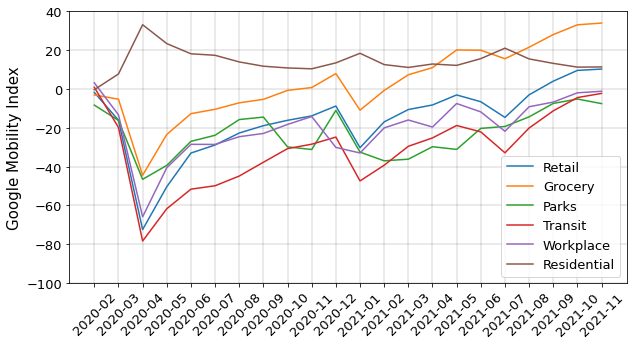

In [ ]:
l = len(WP)
f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.plot (list(retail.keys())[0:l-1], list(retail.values())[0:l-1])
plt.plot (list(grocery.keys())[0:l-1], list(grocery.values())[0:l-1])
plt.plot (list(parks.keys())[0:l-1], list(parks.values())[0:l-1])
plt.plot (list(transit.keys())[0:l-1], list(transit.values())[0:l-1])
plt.plot (list(WP.keys())[0:l-1], list(WP.values())[0:l-1])
plt.plot (list(residential.keys())[0:l-1], list(residential.values())[0:l-1])
plt.rcParams.update({'font.size': 13})
plt.ylim (-100, 40)
plt.xticks(rotation=45)#'vertical')
plt.ylabel ('Google Mobility Index',{'fontsize': 15})
plt.legend (['Retail','Grocery','Parks','Transit','Workplace','Residential'])
plt.show()

In [ ]:
GMI1 = {}
for k in WP.keys():
    GMI1[k] = (WP[k] + retail[k] + transit[k] + grocery[k] + parks[k]) / 5

x = {}
y = {}
for k in GMI1:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and unemployment[k] != 0:
        x[k] = -GMI1[k]
        y[k] = unemployment[k]

In [ ]:
model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))
model.coef_[0]

-0.13543424033945978

In [ ]:
# The slope of Linear Regression is in model.coef_[0]
import math
GMI2 = {}
for k in GMI1.keys():
    GMI2[k] = -abs(model.coef_[0]) * GMI1[k]

In [ ]:
# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and  unemployment[k] != 0:
        x[k] = GMI2[k]
        y[k] = unemployment[k]

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)
out.x[0]

41.113375648157465

In [ ]:
# The offset is stored in out.x[0]
GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

In [ ]:
er = {}
for k in unemployment.keys ():
    if unemployment[k] != 0:
        er[k] = unemployment[k]

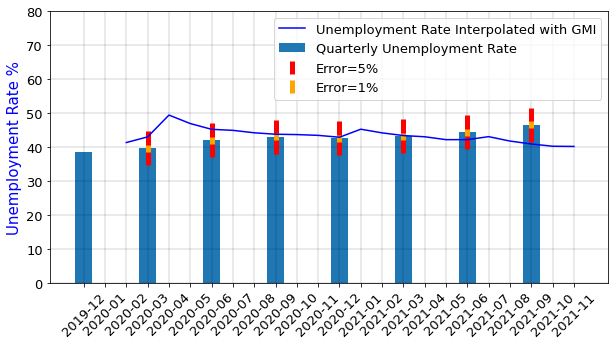

In [ ]:
l = len (GMI3)
f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.ylim(0, 80)
plt.bar (list(unemployment.keys()), list(unemployment.values()))
plt.plot (list(GMI3.keys())[0:l-1], list(GMI3.values())[0:l-1], 'b')
plt.errorbar (list(er.keys()), list(er.values()), yerr=[0,5,5,5,5,5,5,5], elinewidth=5, fmt='none', color='r')
plt.errorbar (list(er.keys()), list(er.values()), yerr=[0,1,1,1,1,1,1,1], elinewidth=5, fmt='none', color='orange')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)#'vertical')
plt.ylabel ('Unemployment Rate %', {'fontsize': 15}, color='b')
plt.legend (['Unemployment Rate Interpolated with GMI','Quarterly Unemployment Rate', 'Error=5%', 'Error=1%'])
plt.show()

In [ ]:
GMI3

{'2020-02': 41.36257465038207,
 '2020-03': 43.03129924522272,
 '2020-04': 49.447095903712224,
 '2020-05': 46.95102829143444,
 '2020-06': 45.25585761267374,
 '2020-07': 44.950970380872995,
 '2020-08': 44.23185825313509,
 '2020-09': 43.80851703091271,
 '2020-10': 43.70847044692002,
 '2020-11': 43.472640114870856,
 '2020-12': 42.92557316082869,
 '2021-01': 45.28911909707539,
 '2021-02': 44.205145877621135,
 '2021-03': 43.41750527251331,
 '2021-04': 43.061822919174496,
 '2021-05': 42.211703648845855,
 '2021-06': 42.22303352400544,
 '2021-07': 43.09508440357614,
 '2021-08': 41.797537004194865,
 '2021-09': 40.938214030651764,
 '2021-10': 40.27543089663784,
 '2021-11': 40.21680097711024,
 '2021-12': 38.973514650794}

In [ ]:
# Just in Case.
GMI3 = {'2020-02': 41.36257465038207,
        '2020-03': 43.03129924522272,
        '2020-04': 49.447095903712224,
        '2020-05': 46.95102829143444,
        '2020-06': 45.25585761267374,
        '2020-07': 44.950970380872995,
        '2020-08': 44.23185825313509,
        '2020-09': 43.80851703091271,
        '2020-10': 43.70847044692002,
        '2020-11': 43.472640114870856,
        '2020-12': 42.92557316082869,
        '2021-01': 45.28911909707539,
        '2021-02': 44.205145877621135,
        '2021-03': 43.41750527251331,
        '2021-04': 43.061822919174496,
        '2021-05': 42.211703648845855,
        '2021-06': 42.22303352400544,
        '2021-07': 43.09508440357614,
        '2021-08': 41.797537004194865,
        '2021-09': 40.938214030651764,
        '2021-10': 40.27543089663784,
        '2021-11': 40.21680097711024,
        '2021-12': 38.973514650794
        }

**SMAPE**

In [ ]:
output = []
prediction = []
for k in GMI3.keys():
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and unemployment[k] != 0:
        output.append (unemployment[k])
        prediction.append (GMI3[k])

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (output[i] - prediction[i])
    denom = (abs(output[i]) + abs(prediction[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.0519600182597337

# Removing Bots, Spammers, Broadcasters

In [ ]:
file_path1 = file_path + '/dataset1.csv'
file_path2 = file_path + '/dataset2.csv'

In [ ]:
import pandas as pd
from tqdm import tqdm
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [ ]:
df = pd.read_csv (file_path1, sep=',', encoding='utf-8')

In [ ]:
df = df[~pd.isnull(df['CleanedText'])]

In [ ]:
# Removing those that their ratio is <0.2 and >5
follower = list(df['FollowerCount'])
following = list(df['FollowingCount'])
ratio = [x/y if y!=0 else 0 for x,y in zip(following, follower)]
df['Ratio'] = ratio
df = df[(df['Ratio']>0.1) & (df['Ratio']<10)]
len (df)

1237606

In [ ]:
df = df.reset_index (drop= True)

# Selecting Keywords by Correlation Checking

In [ ]:
df1 = df.drop (columns=['OriginalText','ConversationID','Type','RetweetCount', 'ReplyCount','LikeCount', 'GeoId', 'GeoCountry','GeoCoordinate(bbox)','Name','UserName','Descreption','Hashtags','CreatedAccountAt','TweetCount'])

In [ ]:
dates = list(df1['CreateDate'])
dates = [str(x)[0:7] for x in dates]
df1['Date'] = dates
#df1 = df1.drop (columns=['CreateDate'])

In [ ]:
txt = list (df1['CleanedText'])
txt = [str(x).lower() for x in txt]
df1['TextToLower'] = txt

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1 = df1.sort_values(by="Date")

In [ ]:
all_dates = list(df1['Date'].unique())
desired_dates = []
for item in all_dates:
    dt = pd.to_datetime (item)
    if dt <= pd.to_datetime ('2020-03'):
        desired_dates.append(str(dt.year) + '-Q' + str(dt.quarter))
    else:
        desired_dates.append (str(dt)[0:7])

In [ ]:
keywords = {
    'LostJob': 'lost his job|lost her job|lost my job|lost their jobs',
    'Layoff': 'layoff|lay off|lay-off|laid off|laid-off|laid her off|laid him off|laid me off|laid them off',
    'Employed': 'employed',
    'Unemployed':'unemployed',
    'Retrench':'retrench|retrenched|retrenches|retrenching|retrenchment|retrenchments',
    'Employment':'employment',
    'Unemployment':'unemployment',
    'Jobless': 'jobless',
    'Debt': 'debt',
    'Bankruptcy':'bankrupt|bankruptcy',
    'Loan': 'loan',
    'Famine': 'famine',
    'Inflation': 'inflation',
    'Broke': 'be broke|being broke|am broke|are broke|is broke',
    'Career': 'career',
    'Hire': 'hire|hired|hires',
    'Money': 'money',
    'Buy': 'buy',
    'Rent': 'rent',
    'Lend': 'lend',
    'Poverty': 'poverty',
    'Payment': 'payment',
    'Afford': 'afford',
    'Axed': 'axed',
    'Canned': 'canned',
    'Downsized': 'downsized',
    'Outsourced': 'outsourced',
    'PinkSlip': 'pink slip',
    'Fired': 'fired job|been fired',
}

In [ ]:
keyword_dates = {}
for k in keywords.keys():
    keyword_dates[k] = {}
    for item in desired_dates:
        keyword_dates[k][item] = 0

In [ ]:
for k in tqdm(keywords.keys()):
    df2 = df1[df1['TextToLower'].str.contains(keywords[k], na=False)]
    df3 = df2.groupby('Date')['TextToLower'].count()
    for item in df3.index:
        dt = pd.to_datetime (item)
        if dt <= pd.to_datetime ('2020-03'):
            d = str(dt.year) + '-Q' + str(dt.quarter)
        else:
            d = str(dt)[0:7]
        keyword_dates [k][d] += df3 [item]

100%|██████████| 29/29 [00:31<00:00,  1.10s/it]


**Correlation Checking for before COVID-19 Pandemic**

In [ ]:
# Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2019.pdf, ..., https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2010.pdf

unemp2 = {'2010-Q3':36.4, '2010-Q4':35.8, '2011-Q1':36.5,  '2011-Q2':36.9, '2011-Q3':36,   '2011-Q4':35.4, '2012-Q1':36.6, '2012-Q2':36.2 , '2012-Q3':36.3, '2012-Q4':35.9, '2013-Q1':36.7, '2013-Q2':36.8, '2013-Q3':35.6, '2013-Q4':34   , '2014-Q1':35.1 , '2014-Q2':35.6 , '2014-Q3':35.8 , '2014-Q4':34.6 , '2015-Q1':36.1 , '2015-Q2':34.9 , '2015-Q3':34.4 , '2015-Q4':33.8 , '2016-Q1':36.30, '2016-Q2':36.4 , '2016-Q3':36.3 , '2016-Q4':35.6 , '2017-Q1':36.4 , '2017-Q2':36.6 , '2017-Q3':36.8 , '2017-Q4':36.3 , '2018-Q1':36.7 , '2018-Q2':37.20, '2018-Q3':37.3 , '2018-Q4':37   , '2019-Q1':38   , '2019-Q2':38.5 , '2019-Q3':38.5 , '2019-Q4':38.7 , '2020-Q1':39.70, '2020-Q2':42   , '2020-Q3':43.1 , '2020-Q4':42.60, '2021-Q1':43.20, '2021-Q2':44.4, '2021-Q3':46.6}

In [ ]:
print ('Keyword', '(Correlation,', 'P-Value)')
for k in keyword_dates.keys():
  print (k, stats.pearsonr (list(keyword_dates[k].values())[1:40], list(unemp2.values())[0:39]))

Keyword (Correlation, P-Value)
LostJob (0.6949609280960376, 9.15680390720618e-07)
Layoff (0.34815880711734865, 0.0298576975190729)
Employed (0.6570259856241761, 5.541237648059495e-06)
Unemployed (0.6410040343165173, 1.1014391473434625e-05)
Retrench (0.7339763479999155, 1.0555085753994927e-07)
Employment (0.7154624824446647, 3.0752974699581104e-07)
Unemployment (0.7013623207954756, 6.576898172950912e-07)
Jobless (0.47672064645593726, 0.0021534301405401277)
Debt (0.6299682335841672, 1.7287519782896933e-05)
Bankruptcy (0.5208366290266919, 0.0006753874290121756)
Loan (0.5018819180524423, 0.0011328555498471202)
Famine (0.4923293266576475, 0.0014540319442402033)
Inflation (0.3924418944981205, 0.013470028110998464)
Broke (0.45997882401087786, 0.0032169839077103974)
Career (0.4641552216178947, 0.0029158977075519218)
Hire (0.6109412407538508, 3.6146715489546824e-05)
Money (0.5422042675890216, 0.00036320169615369915)
Buy (0.4810012856554735, 0.0019370761653799608)
Rent (0.6817702478505703, 1.764

**Correlation Checking for during COVID-19 Pandemic**

In [ ]:
print ('Keyword', '(Correlation,', 'P-Value)')
for k in keyword_dates.keys():
  print (k, stats.pearsonr (list(keyword_dates[k].values())[40:60], list(GMI3.values())[2:22]))

Keyword (Correlation, P-Value)
LostJob (0.7879774182348758, 3.698339299882009e-05)
Layoff (0.779154968587516, 5.154775766840093e-05)
Employed (0.7213322393530484, 0.00033146018409278095)
Unemployed (0.6879312543240209, 0.0008007188352842343)
Retrench (0.7253646786052783, 0.0002955095340945106)
Employment (0.16481661260001462, 0.4874351570605745)
Unemployment (0.0736646731150173, 0.7575911458682915)
Jobless (0.5326769548885348, 0.015602916531789692)
Debt (0.8151530207786326, 1.1971890695495577e-05)
Bankruptcy (0.7145000560173564, 0.0004008883650694966)
Loan (0.6954323815774383, 0.0006634454494927635)
Famine (0.7783785580644458, 5.303850180341094e-05)
Inflation (0.4331115452613022, 0.05644733769285751)
Broke (0.48588408491204815, 0.029854982476411534)
Career (0.8377709413785367, 4.037464405970722e-06)
Hire (0.5915799867097077, 0.006005747928892976)
Money (0.8816543670508877, 2.7936529717776673e-07)
Buy (0.8747710952614003, 4.5269793010408217e-07)
Rent (0.8382246792804221, 3.9438622181077

**Building the Final Dataset**

In [ ]:
desired_keywords = ['LostJob', 'Employed', 'Unemployed', 'Retrench', 'Jobless', 'Debt', 'Bankruptcy', 'Loan', 'Famine', 'Broke', 'Career', 'Hire', 'Money', 'Buy', 'Rent', 'Lend', 'Poverty', 'Payment', 'Afford', 'Canned']

In [ ]:
keyword_string = ''
for item in desired_keywords:
  keyword_string += keywords[item] + '|'
l = len (keyword_string)
keyword_string = keyword_string[0:l-1]

In [ ]:
df4 = df1[df1['TextToLower'].str.contains(keyword_string, na=False)]

In [ ]:
#dataset4.csv
df4.to_csv (file_path2, encoding='utf-8')

In [ ]:
len (df4)

1182632

In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'])
print (len(df4[df4['Date'] < pd.to_datetime('2020-04-01')]), len(df4[df4['Date'] >= pd.to_datetime('2020-04-01')]))

892894 289738


In [ ]:
df4.head()

,CleanedText,TweetID,CreateDate,GeoCityProvince,AuthorID,Location,FollowerCount,FollowingCount,Ratio,Date,TextToLower
1237605,anybody know what the toll roads are like in I...,15734950414-,2010-06-08 21:55:31+00:00,"Madison, WI",17104460-,"Minneapolis *and* St. Paul, MN",456.0,538.0,1.179825,2010-06-01,anybody know what the toll roads are like in i...
1237494,bring in the money B.,17120621246-,2010-06-26 22:03:55+00:00,"Johannesburg, South Africa",62229685-,"Vosloorus, South Africa",58.0,142.0,2.448276,2010-06-01,bring in the money b.
1237493,I have my money on and to win today!.,17150900874-,2010-06-27 08:13:15+00:00,"Sandton, South Africa",28778613-,"Johannesburg, South Africa",348.0,603.0,1.732759,2010-06-01,i have my money on and to win today!.
1237492,Eish BlackBerry wants thy money.,17154522381-,2010-06-27 09:51:02+00:00,"Durban, South Africa",114685464-,Hogwarts.. Chilling with Harry,55.0,106.0,1.927273,2010-06-01,eish blackberry wants thy money.
1237491,"I have R20 to my name, this will buy me a box ...",17154595904-,2010-06-27 09:53:07+00:00,"Johannesburg, South Africa",41199332-,South Africa,8447.0,3075.0,0.364035,2010-06-01,"i have r20 to my name, this will buy me a box ..."


In [ ]:
df5 = df4.groupby('Date')['TextToLower'].count()
final = {}
for item in desired_dates:
  final[item] = 0
  i = 0
for item in df5.index:
  dt = pd.to_datetime (item)
  if dt <= pd.to_datetime ('2020-03'):
    d = str(dt.year) + '-Q' + str(dt.quarter)
  else:
    d = str(dt)[0:7]
  final [d] += df5 [item]
  i += 1

In [ ]:
for item in final.keys():
  final[item] /= len (df4)

**Correlation Checking for the final dataset**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


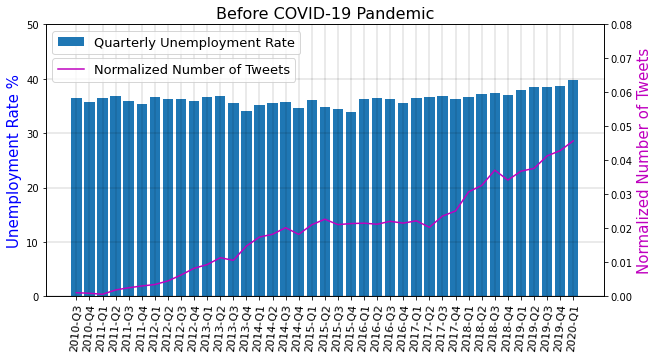

In [ ]:
f = plt.figure (figsize=(10,5))
plt.title ('Before COVID-19 Pandemic', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 50, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (list(unemp2.keys())[0:39], list(unemp2.values())[0:39])
ax2.plot (list(final.keys())[1:40], list(final.values())[1:40], 'm')
ax1.set_xticklabels(list(unemp2.keys()), fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='b')
ax2.set_ylabel ('Normalized Number of Tweets', {'fontsize': 15}, color = 'm')
ax2.set_ylim (0, 0.08)
ax1.legend (['Quarterly Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Normalized Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
stats.pearsonr (list(final.values())[1:40], list(unemp2.values())[0:39])

(0.5389517248041531, 0.0004002373758758898)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


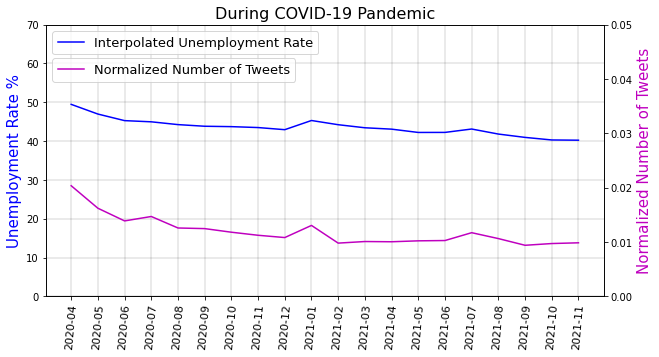

In [ ]:
f = plt.figure (figsize=(10,5))
plt.title ('During COVID-19 Pandemic', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.plot (list(GMI3.keys())[2:22], list(GMI3.values())[2:22], 'b')
ax2.plot (list(final.keys())[40:60], list(final.values())[40:60], 'm')
ax1.set_xticklabels(list(GMI3.keys())[2:22], fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='b')
ax2.set_ylabel ('Normalized Number of Tweets', {'fontsize': 15}, color = 'm')
ax2.set_ylim (0, 0.05)
ax1.legend (['Interpolated Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Normalized Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
stats.pearsonr (list(final.values())[40:60], list(GMI3.values())[2:22])

(0.9062531371350896, 3.763970364988913e-08)

# Word Cloud

In [ ]:
file_path2 = file_path + '/dataset2.csv'

In [ ]:
import codecs
import re
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
txt = list (df['CleanedText'].astype(str))
t = ''
t = t.join (txt)
t = t.lower()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
t = lemmatizer.lemmatize(t)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
s = set(STOPWORDS)
sw = stopwords.words('english')
sw += s

In [ ]:
sw.append ('co')
sw.append ('will')
sw.append ('amp') # to be loud and angry
sw.append ('anc') # annoying new character
sw.append ('httpst')
sw.append ('sa')
sw.append ('see')
sw.append ('look')
sw.append ('still')
sw.append ('say')
sw.append ('go')
sw.append ('going')
sw.append ('said')
sw.append ('must')
sw.append ('may')
sw.append ('getting')
sw.append ('let')
sw.append ('us')
sw.append ('n')
sw.append ('got')
sw.append ('yet')
sw.append ('etc')
sw.append ('make')
sw.append ('give')
sw.append ('â')
sw.append ('ã')
sw.append ('think')
sw.append ('much')
sw.append ('thing')
sw.append ('told')
sw.append ('might')
sw.append ('take')
sw.append ('lol')
sw.append ('due')
sw.append ('become')
sw.append ('put')
sw.append ('ye')
sw.append ('tell')
sw.append ('keep')
sw.append ('white')
sw.append ('anything')
sw.append ('everything')
sw.append ('eff')
sw.append ('call')
sw.append ('already')
sw.append ('use')
sw.append ('guy')
sw.append ('girl')
sw.append ('instead')
sw.append ('children')
sw.append ('something')
sw.append ('parent')
sw.append ('tweet')
sw.append ('lot')
sw.append ('gonna')
sw.append ('sabc')
sw.append ('made')
sw.append ('long')
sw.append ('saying')
sw.append ('every')
sw.append ('things')
sw.append ('u')
sw.append ('maybe')
sw.append ('says')
sw.append ('happen')
sw.append ('something')
sw.append ('given')
sw.append ('done')
sw.append ('ke')
sw.append ('kid')
sw.append ('twitter')
sw.append ('enough')
sw.append ('next')
sw.append ('making')
sw.append ('ask')
sw.append ('child')
sw.append ('guys')
sw.append ('come')
sw.append ('everyone')
sw.append ('really')
sw.append ('know')
sw.append ('care')
sw.append ('soon')
sw.append ('r350')
sw.append ('others')
sw.append ('called')
sw.append ('now')
sw.append ('want')
sw.append ('one')
sw.append ('nothing')
sw.append ('really')
sw.append ('around')
sw.append ('sa')
sw.append ('due')
sw.append ('RT')
sw.append ('even')
sw.append ('way')
sw.append ('today')
sw.append ('man')
sw.append ('time')
sw.append ('mean')
sw.append ('right')
sw.append ('well')
sw.append ('afford')
sw.append ('need')
sw.append ('spend')
sw.append ('day')
sw.append ('dont')
sw.append ('cant')
sw.append ('alway')
sw.append ('sure')
sw.append ('back')
sw.append ('though')
sw.append ('south')
sw.append ('africa')
sw.append ('always')
sw.append ('friend')
sw.append ('life')
sw.append ('people')
sw.append ('thank')
sw.append ('good')
sw.append ('year')
sw.append ('ye')
sw.append ('someone')
sw.append ('im')
sw.append ('car')
sw.append ('love')
sw.append ('never')
sw.append ('black')
sw.append ('new')
sw.append ('month')
sw.append ('please')
sw.append ('food')
sw.append ('help')
sw.append ('start')
sw.append ('end')
sw.append ('last')
sw.append ('home')
sw.append ('stop')
sw.append ('first')
sw.append ('better')
sw.append ('live')
sw.append ('problem')
sw.append ('wanna')
sw.append ('many')
sw.append ('year')
sw.append ('without')
sw.append ('best')

In [ ]:
wordcloud = WordCloud (width = 800, height = 500, max_words=200, background_color ='white', stopwords = sw, min_font_size = 30, collocations=False).generate(t)

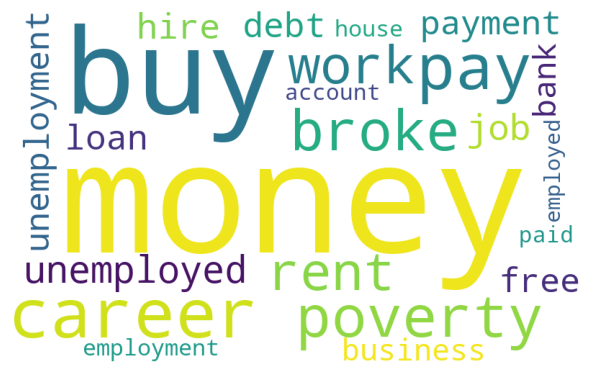

In [ ]:
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Correcting the Locations (Identifying Travelers)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
df.head ()

,Unnamed: 0,CleanedText,TweetID,CreateDate,GeoCityProvince,AuthorID,Location,FollowerCount,FollowingCount,Ratio,Date,TextToLower,Year
0,1237605,anybody know what the toll roads are like in I...,15734950414-,2010-06-08 21:55:31+00:00,"Madison, WI",17104460-,"Minneapolis *and* St. Paul, MN",456.0,538.0,1.179825,2010-06-01,anybody know what the toll roads are like in i...,2010
1,1237494,bring in the money B.,17120621246-,2010-06-26 22:03:55+00:00,"Johannesburg, South Africa",62229685-,"Vosloorus, South Africa",58.0,142.0,2.448276,2010-06-01,bring in the money b.,2010
2,1237493,I have my money on and to win today!.,17150900874-,2010-06-27 08:13:15+00:00,"Sandton, South Africa",28778613-,"Johannesburg, South Africa",348.0,603.0,1.732759,2010-06-01,i have my money on and to win today!.,2010
3,1237492,Eish BlackBerry wants thy money.,17154522381-,2010-06-27 09:51:02+00:00,"Durban, South Africa",114685464-,Hogwarts.. Chilling with Harry,55.0,106.0,1.927273,2010-06-01,eish blackberry wants thy money.,2010
4,1237491,"I have R20 to my name, this will buy me a box ...",17154595904-,2010-06-27 09:53:07+00:00,"Johannesburg, South Africa",41199332-,South Africa,8447.0,3075.0,0.364035,2010-06-01,"i have r20 to my name, this will buy me a box ...",2010


In [ ]:
uid = pd.unique (df['AuthorID'])
len (uid)

144809

In [ ]:
years = list (df['CreateDate'].astype (str))
years = [x[:4] for x in years]
df['Year'] = years
years = pd.unique (years).tolist ()

In [ ]:
locations = {}
n = {}
for item in years:
  locations[item] = {}
  n[item] = 0

In [ ]:
# This takes approximately 1 hour to execute
for y in tqdm (years):
  aux = df[df['Year'] == y]
  uid = pd.unique (aux['AuthorID'])
  for item in uid:
    aux2 = aux[aux['AuthorID'] == item]
    locations [y][item] = list(aux2['GeoCityProvince'])
    if len(pd.unique(locations[y][item])) > 1:
      n[y] += 1

100%|██████████| 12/12 [47:17<00:00, 236.46s/it]


In [ ]:
n

{'2010': 184,
 '2011': 623,
 '2012': 1570,
 '2013': 3337,
 '2014': 5171,
 '2015': 5568,
 '2016': 5649,
 '2017': 6558,
 '2018': 9327,
 '2019': 10142,
 '2020': 9226,
 '2021': 6535}

In [ ]:
for y in tqdm (list(locations.keys())):
  for k in list(locations[y].keys()):
    a = locations[y][k]
    a = [x.replace(',','') for x in a]
    a = [x.replace('-','') for x in a]
    a = [x.lower() for x in a]
    a = [x.replace('south africa','') for x in a]
    a = [x.replace(' ','') for x in a]
    locations[y][k] = a

100%|██████████| 12/12 [00:03<00:00,  3.47it/s]


In [ ]:
year = [y for y in list(locations.keys()) for k in list(locations[y].keys())]
u = [k for y in list(locations.keys()) for k in list(locations[y].keys())]
aux = [','.join(locations[y][k]) for y in list(locations.keys()) for k in list(locations[y].keys())]
location = pd.DataFrame (data= {'Year':year, 'UserID':u, 'Location':aux})

In [ ]:
location.head ()

,Year,UserID,Location
0,2010,17104460-,madisonwi
1,2010,62229685-,johannesburg
2,2010,28778613-,"sandton,randburg,sandton,sandton"
3,2010,114685464-,"durban,durban,durban,durban,durban,durban"
4,2010,41199332-,"johannesburg,johannesburg,johannesburg,johanne..."


In [ ]:
location.to_csv ('/content/drive/MyDrive/ZA_Tracing_Unemployment_Rate/UserLocations0.csv', index=False)

In [ ]:
location = pd.read_csv ('/content/drive/MyDrive/ZA_Tracing_Unemployment_Rate/UserLocations0.csv')
for y in list(locations.keys()):
  aux = location[location['Year'] == int(y)]
  for i in aux.index:
    u = aux['UserID'][i]
    locations[y][u] = str(aux['Location'][i]).split(',')

In [ ]:
provinces = {'Gauteng' : 'gauteng|toekomsrus|fochville|sharpeville|kameeldrift|kokosi|khutsong|temba|amandebele|absa|bophelong|zola|saulsville|walkerville|ivorypark|palmridgemagistrate|sebokeng|aspenhills|westerndeeplevelsmine|diepsloot|vanderbijlpark|rabie|tshepisong|crescent|bedfordview|diepsloot|clayville|akasia|orange|temba|etwatwa|vaal|daveyton|ebony|sandton|thembisa|mogale|noordheuwel|diepkloof|zeerust|meadowlands|sandton|germiston|johannesburg|pretoria|tshwane|soweto|brakpan|heidelberg|magaliesburg|alberton|randfontein|springs|vereeniging|cullinan|emfuleni|krugersdorp|carletonville|merafong|edenvale|benoni|vanderbijilpark|tembisa|boksburg|soshanguve|randburg|alexandra|nigel|kempton|hammanskraal|roodepoort|bronkhorstspruit|centurion|shapeville|midrand|meyerton|evaton|muldersdrift|rankuwa|katlehong|mabopane|lenasia|westonaria|mamelodi|thema|vosloorus|duduza|tsakane|thokoza|tokoza|atteridgeville|ekangala|reiger|kagiso'
    ,'Western Cape' : 'westerncape|capetown|stanford|witsand|stripedhorse|robbenisland|masiphumelele|masiphumelele|hartenbos|kaapstad|plettenberg|crossroads|blouwinkel|gordon|plettenbergbay|nooitgedacht|touwsrivier|sedgefield|crystal|thembalethu|eersterivier|bluedowns|kuilsriver|wellington|mfuleni|khayelitsha|kraaifontein|strand|goodwood|schoemansville|mitchell|brackenfell|newlands|pacaltsdorp|fishhoek|protea|incognito|milnerton|parow|constantia|bellville|capetown|swellendam|oudtshoorn|franschhoek|knysna|hermanus|worcester|mossel|beaufort|stellen|paarl|bredasdorp|simon|gansbaai|george|clanwilliam|albert|guguletu|hout|laingsburg|ashton|kleinmond|somersetwest|piketberg|ceres|melkbosstrand|montagu|grabouw|vredendal|langebaan|malmesbury|albertinia|tulbagh|hopefield|moorreesburg|wilderness|darling|heidelberg|bitterfontein|villiersdorp|atlantis|riviersonderend|porterville|citrusdal|overberg|robertson|langa|klawer|calitzdorp|drakenstein|betty'
    ,'KwaZulu-Natal' : 'kwazulu|shakaskraal|sobonakhona|roseneath|mountedgecombe|ezakheni|uvongo|catoridge|mapumulo|westbrook|catoridge|macala|utrecht|macalagwala|hillcrest|assegay|stanger|mountedgecombe|utrecht|ezakheni|adamsmission|jolivet|newgermany|uvongo|catoridge|genaz|tongaat|hambanathi|esikhawini|clermont|ntuzuma|pitsfontein|umdoni|nzalabantu|nseleni|chatsworth|mkhambathini|westville|kingsburgh|verulam|maphunulo|pholela|mtubatuba|elangeni|mzimkulu|kwadabeka|phoenix|kzn|msunduzi|klaarwater|ushaka|pomeroykzn|klaarwater|klaarwater|manyiseni|edendale|westville|lamontville|ballito|mpumalanga|durban|pietermaritzburg|kokstad|ixopo|ulundi|newcastle|scottburgh|richards|umzimkulu|ladysmith|empangeni|dundee|shepstone|pinetown|amanzimtoti|umhlanga|margate|hibberdene|dolphin|estcourt|saltrock|edward|umkomaas|eshowe|hluhluwe|howick|vryheid|paulpietersburg|queensburgh|mooi|kloof|pennington|colenso|umlazi|pongola|mkuze|raynkonyeni|wartburg|bergville|kwadukuza|nongoma|inanda|lamercy|umzumbe|kwamashu|mtunzini|greytown|jozini|southbroom|manguzi'
    ,'Eastern Cape' : 'easterncape|mountfletcher|sterkspruit|gonubie|maclear|dutywa|mlungisi|tsomo|mlungisi|libode|gonubie|dimbaza|adelaide|lingelethu|bethelsdorp|motherwell|middeldrift|beaconbay|kwadwesi|matatiele|kenton|debeershouse|ibhayi|motherwell|forthare|uitenhage|elizabeth|kingwilliam|grahamstown|gqeberha|eastlondon|graaff|makhanda|qonce|mthatha|bisho|cradock|kariega|queenstown|aliwal|stutterheim|addo|alexandria|alfred|jeffreys|bathurst|barkly|butterworth|hogsback|beaufort|alice|francis|molteno|paterson|johns|despatch|whittlesea|ngcobo|mdantsane|cofimvaba|patensie|salem|nqanqarhu|ngqeleni|bethesda|coffee|somerseteast|chintsa|burgersdorp|grey|humansdorp|zwelitsha|tarkastad|willowmore|frere|flagstaff|morgans|berlin|aberdeen'
    ,'Free State' : 'freestate|kutlwanong|riebeeckstad|thabong|bronville|meqheleng|thabong|reitz|bethlehem|bohlokong|paulroux|mmamahabane|kestell|ladybrand|manyatseng|bothaville|kgotsong|bolokanang|naledi|bultfontein|bloemfontein|kroonstad|harrismith|bethlehem|sasolburg|ficksburg|welkom|phuthaditjhaba|parys|winburg|ladybrand|thaba|koppies|virginia|botshabelo|odendaalsrus|senekal|philippolis|wepener|allanridge|clarens|dewetsdorp|koffiefontein|petrus|tweeling|cornelia|heilbron|zastron|brandfort|vredefort|ventersburg|deneysville|frankfort|clocolan|viljoenskroon|smithfield|bethulie|vrede|fouriesburg|villiers|hennenman|jagersfontein|wesselsbron|theunissen|jacobsdal|marquard|memel|rouxville|bothaville|springfontein|hobhouse'
    ,'Mpumalanga' : 'mpumalanga|eskomkomati|impumelelo|machadodorp|driekop|kwazamokuhle|klipfontein|theblyde|evander|leandra|sakhile|luthuli|kwaguqa|emalahleni|trichardt|mhluzi|boschfontein|nelspruit|kwandebele|middelburg|mbombela|malelane|bethal|standerton|lydenburg|barberton|hazyview|graskop|volksrust|pilgrimsrest|secunda|belfast|ermelo|pietretief|sabie|komatipoort|delmas|emgwenya|ngodwana|entokozweni|whiteriver|greylingstad|siyabuswa|chrissiesmeer|breyten|balfour|emanzana|wakkerstroom|kaapmuiden|kinross|kwaMhlanga|amersfoort|morgenzon|hectorspruit|perdekop|loopspruit|bushbuckridge|amsterdam|embalenhle|waterval|acornhoek|dullstroom|vaalbank|carolina|matsulu|balmoral|kwaggafontein|ebuhleni|lochiel|skukuza'
    ,'North West' : 'northwest|northwest|tidimalo|lethlabile|phokeng|ipelegeng|wildt|tswelelang|mafikeng|mahikeng|klerksdorp|potchefstroom|brits|vryburg|lichtenburg|orkney|stilfontein|bloemhof|mmabatho|koster|christiana|wolmaraansstad|zeerust|schweizer|mogwase|ventersdorp|ottosdal|hartbeespoort|coligny|reivilo|swartruggens|groot|taung|delareyville|beestekraal|kroondal|mooinooi|rustenburg|broederstroom|derby|setlagole|sannieshof|jericho|kosmos|mathibestad|ramokokastad|amalia|ganyesa|bray|hartbeesfontein|makwassie|leeudoringstad|lehurutshe|ottoshoop|stella|morokweng|tosca|marikana|jbmarks'
    ,'Limpopo' : 'limpopo|tshikota|mavambe|onverwacht|lekalakala|madeira|tubatse|sekhukhuneland|lenyenye|thulamahashe|moletji|leokaneng|makhado|venda|tshitavha|polokwane|louis|tzaneen|modimolle|hoedspruit|musina|thohoyandou|lephalale|belabela|giyani|mokopane|phalaborwa|modjadjiskloof|haenertsburg|thulamela|thabazimbi|mankweng|gravelotte|alldays|mookgophong|lebowakgomo|bochum|dendron|vaalwater|bandelierkop|seshego|leydsdorp|vivo|ofcolaco|roedtan|zebediela|baltimore|moria|letsitele|northam|tshipise|groblersdal|burgersfort|marblehall|ohrigstad|sibasa|mahwelereng|makumeke|janefurse|kgapane|malamulele|nkowankowa|alma|morebeng|roossenekal|apel'
    ,'Northern Cape' : 'northerncape|mmab|wolmaransstad|calvinia|segonyana|galeshewe|kimberley|upington|springbok|kuruman|kakamas|colesberg|postmasburg|deaar|kenhardt|prieska|alexander|warrenton|barkly|danielskuil|richmond|nolloth|victoriawest|griekwastad|kempdorp|douglas|strydenburg|hartswater|pofadder|garies|kathu|groblershoop|orania|kloof|kamieskroon|hanover|aggeneys|olifantshoek|kiep|askham|loxton|sutherland|vosburg|hondeklip|britstown|augrabies|campbell|kleinsee|hopetown|keimoes|noupoort|nababeep|carnarvon|delportshoop|windsorton|petrusville|steinkopf'
}
p = {}
for k in list(provinces.keys()):
  a = provinces[k]
  a = a.split('|')
  p[k] = a

In [ ]:
pr = {}
for y in years:
  pr[y] = {}

In [ ]:
for y in tqdm (list(locations.keys())):
  for k in list (locations[y].keys()):
    a = locations[y][k]
    b = []
    for item in a:
      for k2 in list(p.keys()):
        b1 = False
        for item2 in p[k2]:
          if item in item2 or item2 in item:
            b1 = True
        if b1 == True:
          b.append (k2)
          break
    pr[y][k] = b

100%|██████████| 12/12 [00:49<00:00,  4.09s/it]


In [ ]:
pr3 = {}
for y in year:
  pr3[y] = {}

In [ ]:
q = 0
for y in list(pr.keys()):
  for k in list(pr[y].keys()):
    a = pr[y][k]
    if len (a) > 0:
      pr3[y][k] = max(a,key=a.count)
    else:
      pr3[y][k] = ''
      q += 1
q

4483

In [ ]:
for y in tqdm (list(pr3.keys())):
  aux = df[df['Year'] == y]
  for k in list(pr3[y].keys()):
    if pr3[y][k] == '':
      aux2 = aux[aux['AuthorID'] == k]
      a = list (aux2['Location'])
      a = [str(x).lower() for x in a]
      a = [str(x).replace('south africa', '') for x in a]
      a = [str(x).replace(',','') for x in a]
      a = [str(x).replace('-','') for x in a]
      a = [str(x).replace(' ','') for x in a]
      for item in a:
        for k2 in list(p.keys()):
          b1 = False
          for item2 in p[k2]:
            if item in item2 or item2 in item:
              b1 = True
          if b1 == True:
            b.append (k2)
            break
      if len (b) > 0:
        pr3[y][k] = max(b,key=b.count)
      else:
        pr3[y][k] = ''

100%|██████████| 12/12 [05:41<00:00, 28.43s/it]


In [ ]:
n2 = {}
for y in year:
  n2[y] = 0

In [ ]:
for y in list(pr3.keys()):
  for k in list(pr3[y].keys()):
    if pr3[y][k] == '':
      n2[y] += 1

In [ ]:
n2

{'2010': 0,
 '2011': 0,
 '2012': 0,
 '2013': 0,
 '2014': 0,
 '2015': 0,
 '2016': 0,
 '2017': 0,
 '2018': 0,
 '2019': 0,
 '2020': 0,
 '2021': 0}

In [ ]:
prov = []
for i in df.index:
  y = df['Year'][i]
  u = df['AuthorID'][i]
  prov.append (pr3[y][u])

In [ ]:
df['Province'] = prov

In [ ]:
df.to_csv ('/content/drive/MyDrive/ZA_Tracing_Unemployment_Rate/dataset4.csv', index= False)
df.head()

,Unnamed: 0,CleanedText,TweetID,CreateDate,GeoCityProvince,AuthorID,Location,FollowerCount,FollowingCount,Ratio,Date,TextToLower,Year,Province
0,1237605,anybody know what the toll roads are like in I...,15734950414-,2010-06-08 21:55:31+00:00,"Madison, WI",17104460-,"Minneapolis *and* St. Paul, MN",456.0,538.0,1.179825,2010-06-01,anybody know what the toll roads are like in i...,2010,Gauteng
1,1237494,bring in the money B.,17120621246-,2010-06-26 22:03:55+00:00,"Johannesburg, South Africa",62229685-,"Vosloorus, South Africa",58.0,142.0,2.448276,2010-06-01,bring in the money b.,2010,Gauteng
2,1237493,I have my money on and to win today!.,17150900874-,2010-06-27 08:13:15+00:00,"Sandton, South Africa",28778613-,"Johannesburg, South Africa",348.0,603.0,1.732759,2010-06-01,i have my money on and to win today!.,2010,Gauteng
3,1237492,Eish BlackBerry wants thy money.,17154522381-,2010-06-27 09:51:02+00:00,"Durban, South Africa",114685464-,Hogwarts.. Chilling with Harry,55.0,106.0,1.927273,2010-06-01,eish blackberry wants thy money.,2010,KwaZulu-Natal
4,1237491,"I have R20 to my name, this will buy me a box ...",17154595904-,2010-06-27 09:53:07+00:00,"Johannesburg, South Africa",41199332-,South Africa,8447.0,3075.0,0.364035,2010-06-01,"i have r20 to my name, this will buy me a box ...",2010,Gauteng


# Correlation of Different Provinces with Their Unemployment Rate
# And Correlation of the Total Dataset with the Country's Unemployment Rate

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib.request as URL
import csv
import codecs
import re
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
#import matplotlib.dates as mdates
from matplotlib import gridspec
import seaborn as sns
import math
from tqdm import tqdm

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
# This will work while GMI is available at https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
# This may take several minutes

response = URL.urlopen ('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
rdr = csv.reader (codecs.iterdecode(response, 'utf-8'))
MI = {}
for line in tqdm(rdr):
    if line[1] == 'South Africa' and line[2] not in list(MI.keys()):
        MI[line[2]] = {}
        MI[line[2]][line[8]] = [line[9], line[10], line[11], line[12], line[13], line[14]]
    elif line[1] == 'South Africa' and line[2] in list(MI.keys()):
        MI[line[2]][line[8]] = [line[9], line[10], line[11], line[12], line[13], line[14]]

11131680it [01:55, 96780.89it/s]


In [ ]:
GMI = {}
for k in list(MI.keys()):
  GMI[k] = {}
  for q in list(MI[k].keys())[:660]:
    mi = [float(x) if x != '' else 0 for x in MI[k][q]]
    avg = -sum(mi)/5
    dt = str(q)[0:7]
    if dt not in list(GMI[k].keys()):
      GMI[k][dt] = avg
    else:
      GMI[k][dt] += avg

In [ ]:
GMI.keys()

dict_keys(['', 'Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape'])

In [ ]:
# Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf , http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf , ..., http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2010.pdf

unemp2 = {'2010-Q3':36.4, '2010-Q4':35.8, '2011-Q1':36.5,  '2011-Q2':36.9, '2011-Q3':36,   '2011-Q4':35.4, '2012-Q1':36.6, '2012-Q2':36.2 , '2012-Q3':36.3, '2012-Q4':35.9, '2013-Q1':36.7, '2013-Q2':36.8, '2013-Q3':35.6, '2013-Q4':34   , '2014-Q1':35.1 , '2014-Q2':35.6 , '2014-Q3':35.8 , '2014-Q4':34.6 , '2015-Q1':36.1 , '2015-Q2':34.9 , '2015-Q3':34.4 , '2015-Q4':33.8 , '2016-Q1':36.30, '2016-Q2':36.4 , '2016-Q3':36.3 , '2016-Q4':35.6 , '2017-Q1':36.4 , '2017-Q2':36.6 , '2017-Q3':36.8 , '2017-Q4':36.3 , '2018-Q1':36.7 , '2018-Q2':37.20, '2018-Q3':37.3 , '2018-Q4':37   , '2019-Q1':38   , '2019-Q2':38.5 , '2019-Q3':38.5 , '2019-Q4':38.7 , '2020-Q1':39.70, '2020-Q2':42   , '2020-Q3':43.1 , '2020-Q4':42.60, '2021-Q1':43.20, '2021-Q2':44.4, '2021-Q3':46.6}
wc2 = {'2010-Q3':25.5, '2010-Q4':24,      '2011-Q1':23.8, '2011-Q2':23.6, '2011-Q3':25, '2011-Q4':24.3, '2012-Q1':25  , '2012-Q2':25  , '2012-Q3':26.9, '2012-Q4':25.6, '2013-Q1':26.7, '2013-Q2':26.7, '2013-Q3':25.7,   '2013-Q4':22.1  , '2014-Q1':22.6, '2014-Q2':25.4, '2014-Q3':25.5, '2014-Q4':24.5, '2015-Q1':23.3  , '2015-Q2':24.1, '2015-Q3':23.1, '2015-Q4':22  , '2016-Q1':23  , '2016-Q2':24.8, '2016-Q3':24.8, '2016-Q4':23.6, '2017-Q1':24.7, '2017-Q2':24.6, '2017-Q3':25.2, '2017-Q4':23  , '2018-Q1':22.5, '2018-Q2':23.2, '2018-Q3':23.7, '2018-Q4':23.1, '2019-Q1':22.7, '2019-Q2':24.5, '2019-Q3':24.5, '2019-Q4':24.1, '2020-Q1':24.8, '2020-Q2':27.3, '2020-Q3':29.1, '2020-Q4':26.8, '2021-Q1':27.9, '2021-Q2':29.1, '2021-Q3':30.3}
ec2 = {'2010-Q3':40.4, '2010-Q4':40,      '2011-Q1':41, '2011-Q2':42.6, '2011-Q3':41.9, '2011-Q4':40.9, '2012-Q1':42.4, '2012-Q2':42.4, '2012-Q3':43  , '2012-Q4':46.1, '2013-Q1':45.2, '2013-Q2':45.2, '2013-Q3':44.3, '2013-Q4':43.3, '2014-Q1':44.2, '2014-Q2':44.4, '2014-Q3':43  , '2014-Q4':41.9, '2015-Q1':43.2, '2015-Q2':42.5, '2015-Q3':42.5, '2015-Q4':40.3, '2016-Q1':44.6, '2016-Q2':43.8, '2016-Q3':41.3, '2016-Q4':41.3, '2017-Q1':43.6, '2017-Q2':44.5, '2017-Q3':45.3, '2017-Q4':44.8, '2018-Q1':46  , '2018-Q2':45.8, '2018-Q3':46  , '2018-Q4':46.8, '2019-Q1':48.3, '2019-Q2':46.5, '2019-Q3':46.5, '2019-Q4':47.7, '2020-Q1':48.9, '2020-Q2':52.8, '2020-Q3':51.2, '2020-Q4':51.2, '2021-Q1':52.4, '2021-Q2':49.6, '2021-Q3':53  }
nc2 = {'2010-Q3':36,   '2010-Q4':34.4, '2011-Q1':40.7, '2011-Q2':37.3, '2011-Q3':36.1, '2011-Q4':35, '2012-Q1':33.8, '2012-Q2':37.1, '2012-Q3':37.2  , '2012-Q4':35, '2013-Q1':35.8, '2013-Q2':35.9, '2013-Q3':36.3,       '2013-Q4':34.8, '2014-Q1':39.8  , '2014-Q2':41.7, '2014-Q3':39.5, '2014-Q4':38.4, '2015-Q1':42.6, '2015-Q2':41.1, '2015-Q3':42.4, '2015-Q4':38.9, '2016-Q1':38.7, '2016-Q2':39.8, '2016-Q3':41.8, '2016-Q4':43.3  , '2017-Q1':43.9, '2017-Q2':45.3, '2017-Q3':43.1, '2017-Q4':40.5, '2018-Q1':41  , '2018-Q2':42.4, '2018-Q3':40.1  , '2018-Q4':38.6  , '2019-Q1':41.5  , '2019-Q2':44.8, '2019-Q3':43  , '2019-Q4':39.2, '2020-Q1':40, '2020-Q2':45.1, '2020-Q3':63  , '2020-Q4':41.8, '2021-Q1':42.2, '2021-Q2':50.3, '2021-Q3':49.1}
fs2 = {'2010-Q3':37.5, '2010-Q4':35, '2011-Q1':36.2, '2011-Q2':37, '2011-Q3':34, '2011-Q4':37.1, '2012-Q1':38.9, '2012-Q2':39.6, '2012-Q3':39.7  , '2012-Q4':40.1, '2013-Q1':39.3, '2013-Q2':39.3, '2013-Q3':41.2,     '2013-Q4':40.9  , '2014-Q1':41.5, '2014-Q2':41.2  , '2014-Q3':40.9, '2014-Q4':39.5, '2015-Q1':38.4, '2015-Q2':38.9, '2015-Q3':37.7, '2015-Q4':36.3, '2016-Q1':39.4, '2016-Q2':38.1, '2016-Q3':40.4, '2016-Q4':40.9, '2017-Q1':41.7, '2017-Q2':40.5, '2017-Q3':38.5, '2017-Q4':39  , '2018-Q1':39  , '2018-Q2':40.1, '2018-Q3':41.5, '2018-Q4':39.3, '2019-Q1':40.1, '2019-Q2':41.6, '2019-Q3':42.5, '2019-Q4':42.3  , '2020-Q1':44.5, '2020-Q2':41.2, '2020-Q3':42.6, '2020-Q4':39.9, '2021-Q1':43.4, '2021-Q2':45.2, '2021-Q3':45.8}
nl2 = {'2010-Q3':38.7, '2010-Q4':38.3, '2011-Q1':39, '2011-Q2':39.1, '2011-Q3':37.6, '2011-Q4':36.6, '2012-Q1':39.3, '2012-Q2':38.5, '2012-Q3':39.5, '2012-Q4':39.1, '2013-Q1':38.8, '2013-Q2':39.9, '2013-Q3':37.6, '2013-Q4':36.2, '2014-Q1':37.4, '2014-Q2':39.7, '2014-Q3':40.8, '2014-Q4':37.9, '2015-Q1':38.2, '2015-Q2':36.3, '2015-Q3':35.6, '2015-Q4':36.8, '2016-Q1':38.8, '2016-Q2':39.7, '2016-Q3':40.4, '2016-Q4':40.7, '2017-Q1':41  , '2017-Q2':40.4  , '2017-Q3':41  , '2017-Q4':41  , '2018-Q1':40.6, '2018-Q2':40.9, '2018-Q3':41.2  , '2018-Q4':41.3, '2019-Q1':42.4, '2019-Q2':42.1, '2019-Q3':41.4, '2019-Q4':41.9  , '2020-Q1':43  , '2020-Q2':46.2, '2020-Q3':47.5, '2020-Q4':46  , '2021-Q1':46.4, '2021-Q2':47.1, '2021-Q3':48.6}
nw2 = {'2010-Q3':42.5,   '2010-Q4':41.6, '2011-Q1':42.4, '2011-Q2':46.3, '2011-Q3':46.2, '2011-Q4':45  , '2012-Q1':45.5, '2012-Q2':45.1, '2012-Q3':45.5  , '2012-Q4':41.1, '2013-Q1':42.5, '2013-Q2':43.5, '2013-Q3':42.9,   '2013-Q4':42.2, '2014-Q1':42.6, '2014-Q2':42.3  , '2014-Q3':41.8, '2014-Q4':40  , '2015-Q1':43.2, '2015-Q2':40.1, '2015-Q3':40.7, '2015-Q4':38.9, '2016-Q1':43.1, '2016-Q2':42.6, '2016-Q3':44.6, '2016-Q4':40.9, '2017-Q1':41.7, '2017-Q2':42  , '2017-Q3':42.5, '2017-Q4':40.6, '2018-Q1':41.8, '2018-Q2':43.4, '2018-Q3':43.9  , '2018-Q4':42.9, '2019-Q1':44.4, '2019-Q2':46.6  , '2019-Q3':45.1, '2019-Q4':43  , '2020-Q1':45.1, '2020-Q2':46.3, '2020-Q3':46.5, '2020-Q4':46  , '2021-Q1':47.2, '2021-Q2':46.9, '2021-Q3':52.2}
gt2 = {'2010-Q3':31.9, '2010-Q4':31.8, '2011-Q1':31.8, '2011-Q2':31.9, '2011-Q3':31.6, '2011-Q4':29.9, '2012-Q1':30.3,'2012-Q2':29.8, '2012-Q3':29.2, '2012-Q4':28.8, '2013-Q1':30.4, '2013-Q2':30, '2013-Q3':29,     '2013-Q4':28.9, '2014-Q1':29.8, '2014-Q2':29  , '2014-Q3':29.6, '2014-Q4':29.6, '2015-Q1':32.8, '2015-Q2':31.3, '2015-Q3':31.4, '2015-Q4':30.2, '2016-Q1':33.3, '2016-Q2':33  , '2016-Q3':32.8, '2016-Q4':32.1, '2017-Q1':32  , '2017-Q2':32.9, '2017-Q3':33.3, '2017-Q4':33.7, '2018-Q1':33.6, '2018-Q2':34.4, '2018-Q3':34.3, '2018-Q4':33.6  , '2019-Q1':40.4, '2019-Q2':35  , '2019-Q3':35.1  , '2019-Q4':35.3, '2020-Q1':36.3, '2020-Q2':38.7, '2020-Q3':41  , '2020-Q4':41  , '2021-Q1':41.6, '2021-Q2':42.7, '2021-Q3':44.9  }
mp2 = {'2010-Q3':43.2, '2010-Q4':44.3, '2011-Q1':45.2, '2011-Q2':43.8, '2011-Q3':42.7, '2011-Q4':42.8, '2012-Q1':45.2, '2012-Q2':42.8, '2012-Q3':45.4, '2012-Q4':43.5, '2013-Q1':43.4, '2013-Q2':42.2, '2013-Q3':40.5, '2013-Q4':40.2, '2014-Q1':41.9, '2014-Q2':42.2, '2014-Q3':42  , '2014-Q4':40.5, '2015-Q1':40.7, '2015-Q2':39.1, '2015-Q3':39  , '2015-Q4':39.4, '2016-Q1':41.2, '2016-Q2':41  , '2016-Q3':41.4, '2016-Q4':42.1  , '2017-Q1':41.2, '2017-Q2':41.4, '2017-Q3':41.5, '2017-Q4':39.7, '2018-Q1':42.5, '2018-Q2':41.7, '2018-Q3':41.3, '2018-Q4':41.1  , '2019-Q1':43  , '2019-Q2':43.5, '2019-Q3':43.9, '2019-Q4':43.8, '2020-Q1':43.9, '2020-Q2':45.4, '2020-Q3':45.6, '2020-Q4':46.4  , '2021-Q1':47.6, '2021-Q2':46.5, '2021-Q3':49.7}
lm2 = {'2010-Q3':45.3, '2010-Q4':42.6, '2011-Q1':44.7, '2011-Q2':46, '2011-Q3':42.6, '2011-Q4':44.7, '2012-Q1':44.2, '2012-Q2':43.7, '2012-Q3':41.3, '2012-Q4':39.1, '2013-Q1':43.4, '2013-Q2':42.5, '2013-Q3':40.1, '2013-Q4':36.1, '2014-Q1':39.2, '2014-Q2':36.9, '2014-Q3':38.4, '2014-Q4':37.2, '2015-Q1':40.8, '2015-Q2':39  , '2015-Q3':36.6, '2015-Q4':38.6, '2016-Q1':38.5, '2016-Q2':38.6, '2016-Q3':36.3, '2016-Q4':34.1, '2017-Q1':38.2, '2017-Q2':37.1, '2017-Q3':35.8, '2017-Q4':36.8, '2018-Q1':37.6, '2018-Q2':37.4, '2018-Q3':38.1, '2018-Q4':38.8, '2019-Q1':43.1, '2019-Q2':41.1, '2019-Q3':41.9, '2019-Q4':44  , '2020-Q1':44.4, '2020-Q2':46.5, '2020-Q3':46.9, '2020-Q4':47.5, '2021-Q1':49.5, '2021-Q2':49.9, '2021-Q3':54.5}

In [ ]:
# Fitting for South Africa
x = {}
y = {}
i = -7

for k in GMI['']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI[''][k]
        y[k] = list(unemp2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI[''].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI[''][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(unemp2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

sa = list(unemp2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
output = list(unemp2.keys())[0:39] + list(GMI3.keys())[2:-1]

In [ ]:
# Fitting for Eastern Cape
x = {}
y = {}
i = -7
for k in GMI['Eastern Cape']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Eastern Cape'][k]
        y[k] = list(ec2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Eastern Cape'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Eastern Cape'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(ec2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

ec = list(ec2.values())[0:39] + list(GMI3.values())[2:-1]


In [ ]:
# Fitting for Free State
x = {}
y = {}
i = -7
for k in GMI['Free State']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Free State'][k]
        y[k] = list(fs2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Free State'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Free State'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(fs2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

fs = list(fs2.values())[0:39] + list(GMI3.values())[2:-1]


In [ ]:
# Fitting for Gauteng
x = {}
y = {}
i = -7
for k in GMI['Gauteng']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Gauteng'][k]
        y[k] = list(gt2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Gauteng'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Gauteng'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(gt2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

gt = list(gt2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for KwaZulu-Natal
x = {}
y = {}
i = -7
for k in GMI['KwaZulu-Natal']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['KwaZulu-Natal'][k]
        y[k] = list(nl2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['KwaZulu-Natal'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['KwaZulu-Natal'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(nl2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

nl = list(nl2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Limpopo
x = {}
y = {}
i = -7
for k in GMI['Limpopo']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Limpopo'][k]
        y[k] = list(lm2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Limpopo'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Limpopo'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(lm2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

lm = list(lm2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Mpumalanga
x = {}
y = {}
i = -7
for k in GMI['Mpumalanga']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Mpumalanga'][k]
        y[k] = list(mp2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Mpumalanga'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Mpumalanga'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(mp2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

mp = list(mp2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Northern Cape
x = {}
y = {}
i = -7
for k in GMI['Northern Cape']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Northern Cape'][k]
        y[k] = list(nc2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Northern Cape'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Northern Cape'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(nc2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

nc = list(nc2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for North West
x = {}
y = {}
i = -7
for k in GMI['North West']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['North West'][k]
        y[k] = list(nw2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['North West'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['North West'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(nw2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

nw = list(nw2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Western Cape
x = {}
y = {}
i = -7
for k in GMI['Western Cape']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Western Cape'][k]
        y[k] = list(wc2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Western Cape'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Western Cape'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(wc2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

wc = list(wc2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# South Africa
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.groupby('Date')['TextToLower'].count()

all_dates = df1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

df1 = pd.DataFrame ({'Date':df1.index.tolist(), 'Count':df1.values.tolist()})
df1['DesiredDate'] = desired_dates

df2 = df1.groupby('DesiredDate')['Count'].sum()
N = df1.groupby('DesiredDate')['Count'].count()
sa2 = [x/y for x, y in zip (df2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


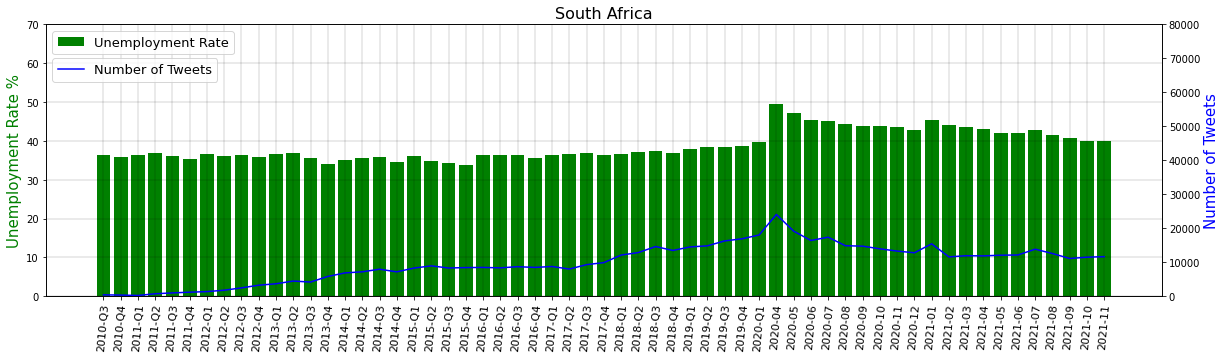

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('South Africa', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
l = len(output)
ax1.bar (output,sa , color='g')
ax2.plot (output, sa2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 80000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (sa, sa2[1:-1])

(0.7227225830627376, 1.02761320816841e-10)

In [ ]:
EC = df[df['Province'] == 'Eastern Cape']
FS = df[df['Province'] == 'Free State']
GT = df[df['Province'] == 'Gauteng']
NL = df[df['Province'] == 'KwaZulu-Natal']
LM = df[df['Province'] == 'Limpopo']
MP = df[df['Province'] == 'Mpumalanga']
NC = df[df['Province'] == 'Northern Cape']
NW = df[df['Province'] == 'North West']
WC = df[df['Province'] == 'Western Cape']

In [ ]:
# Eastern Cape
EC1 = EC.groupby('Date')['TextToLower'].count()

all_dates = EC1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

EC1 = pd.DataFrame ({'Date':EC1.index.tolist(), 'Count':EC1.values.tolist()})
EC1['DesiredDate'] = desired_dates

EC2 = EC1.groupby('DesiredDate')['Count'].sum()
N = EC1.groupby('DesiredDate')['Count'].count()
ec2 = [x/y for x, y in zip (EC2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


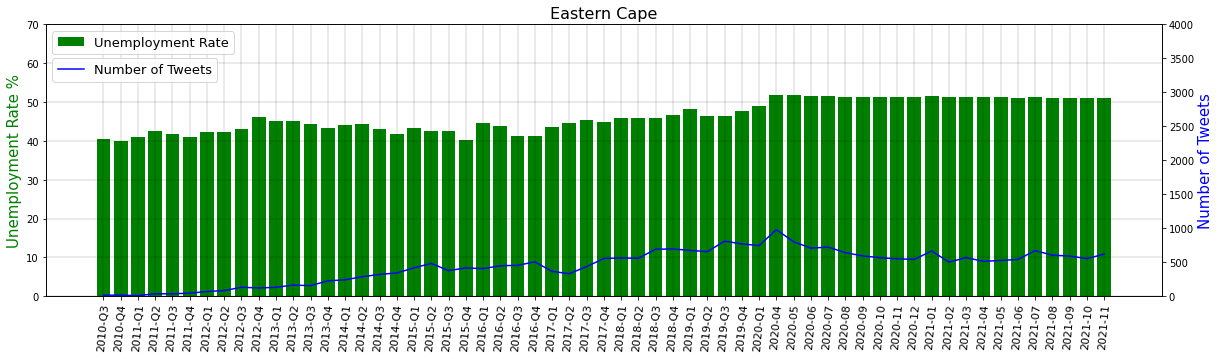

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Eastern Cape', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,ec , color='g')
ax2.plot (output, ec2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 4000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (ec, ec2[1:-1])

(0.7242866906070047, 8.956994221843042e-11)

In [ ]:
# Free State
FS1 = FS.groupby('Date')['TextToLower'].count()

all_dates = FS1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

FS1 = pd.DataFrame ({'Date':FS1.index.tolist(), 'Count':FS1.values.tolist()})
FS1['DesiredDate'] = desired_dates

FS2 = FS1.groupby('DesiredDate')['Count'].sum()
N = FS1.groupby('DesiredDate')['Count'].count()
fs2 = [x/y for x, y in zip (FS2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


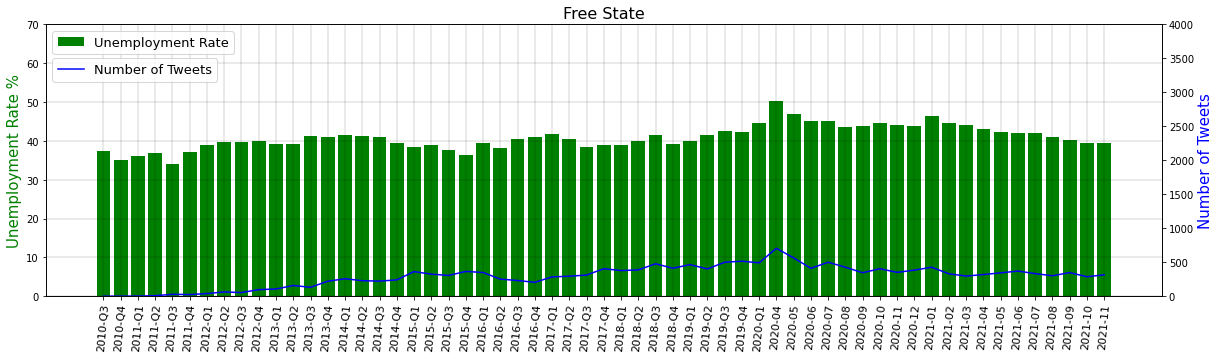

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Free State', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,fs , color='g')
ax2.plot (output, fs2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 4000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (fs, fs2[1:-1])

(0.6994580264236344, 7.146580079409743e-10)

In [ ]:
# Gauteng
GT1 = GT.groupby('Date')['TextToLower'].count()

all_dates = GT1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

GT1 = pd.DataFrame ({'Date':GT1.index.tolist(), 'Count':GT1.values.tolist()})
GT1['DesiredDate'] = desired_dates

GT2 = GT1.groupby('DesiredDate')['Count'].sum()
N = GT1.groupby('DesiredDate')['Count'].count()
gt2 = [x/y for x, y in zip (GT2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


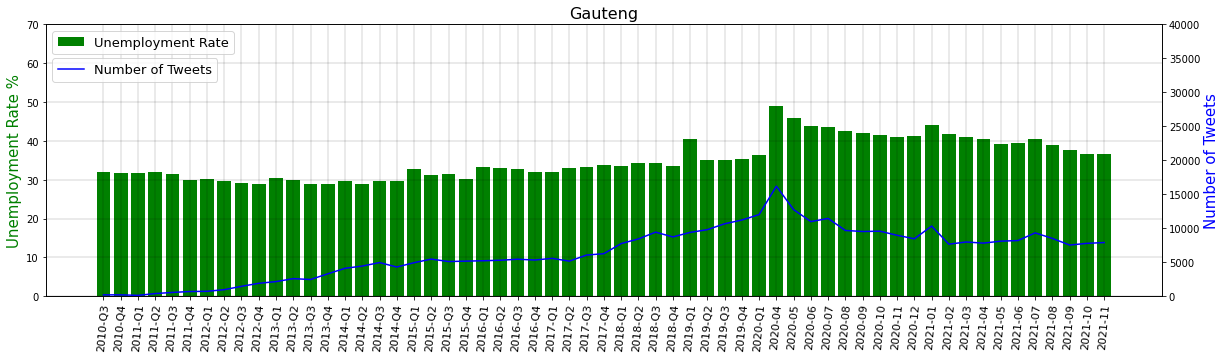

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Gauteng', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,gt , color='g')
ax2.plot (output, gt2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 40000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (gt, gt2[1:-1])

(0.8166892146635453, 3.139022974489139e-15)

In [ ]:
# KwaZulu-Natal
NL1 = NL.groupby('Date')['TextToLower'].count()

all_dates = NL1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

NL1 = pd.DataFrame ({'Date':NL1.index.tolist(), 'Count':NL1.values.tolist()})
NL1['DesiredDate'] = desired_dates

NL2 = NL1.groupby('DesiredDate')['Count'].sum()
N = GT1.groupby('DesiredDate')['Count'].count()
nl2 = [x/y for x, y in zip (NL2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


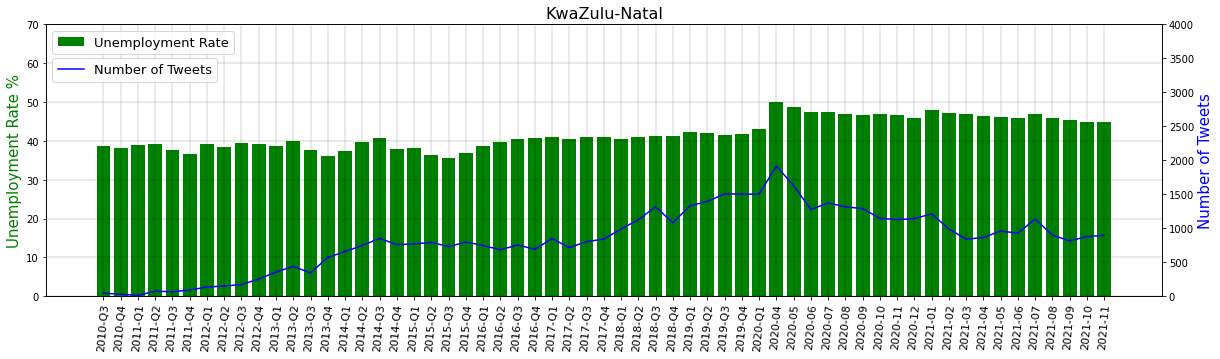

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('KwaZulu-Natal', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,nl , color='g')
ax2.plot (output, nl2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 4000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (nl, nl2[1:-1])

(0.676488567131253, 4.081047915843631e-09)

In [ ]:
# Limpopo
LM1 = LM.groupby('Date')['TextToLower'].count()

all_dates = LM1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

LM1 = pd.DataFrame ({'Date':LM1.index.tolist(), 'Count':LM1.values.tolist()})
LM1['DesiredDate'] = desired_dates

LM2 = LM1.groupby('DesiredDate')['Count'].sum()
N = LM1.groupby('DesiredDate')['Count'].count()
lm2 = [x/y for x, y in zip (LM2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


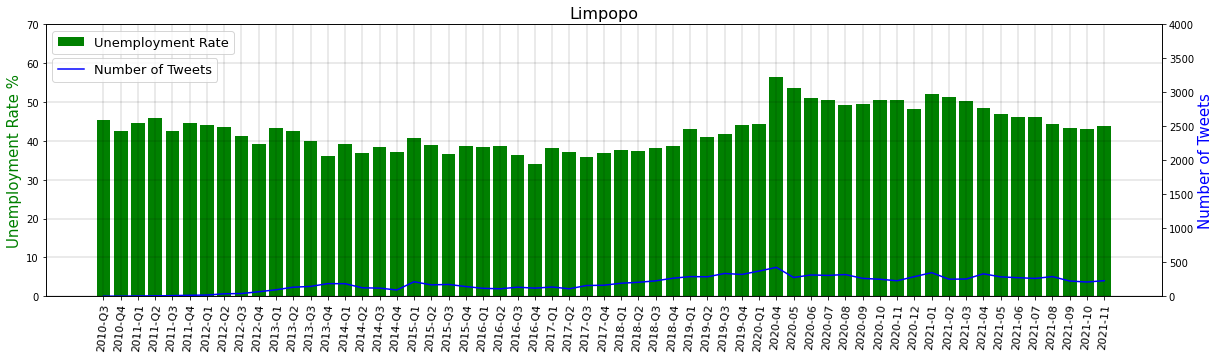

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Limpopo', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,lm , color='g')
ax2.plot (output, lm2[:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 4000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (lm, lm2[:-1])

(0.478136809668779, 0.0001281406356522385)

In [ ]:
# Mpumalanga
MP1 = MP.groupby('Date')['TextToLower'].count()

all_dates = MP1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

MP1 = pd.DataFrame ({'Date':MP1.index.tolist(), 'Count':MP1.values.tolist()})
MP1['DesiredDate'] = desired_dates

MP2 = MP1.groupby('DesiredDate')['Count'].sum()
N = MP1.groupby('DesiredDate')['Count'].count()
mp2 = [x/y for x, y in zip (MP2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


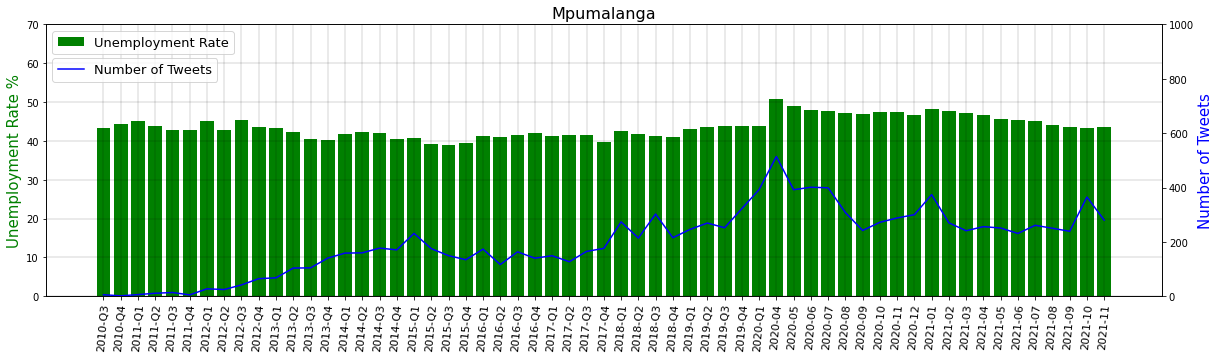

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Mpumalanga', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
l = len(output)
ax1.bar (output,mp , color='g')
ax2.plot (output, mp2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 1000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (mp, mp2[1:-1])

(0.5111517142540901, 3.519373945518597e-05)

In [ ]:
# Northern Cape
NC1 = NC.groupby('Date')['TextToLower'].count()

all_dates = NC1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

NC1 = pd.DataFrame ({'Date':NC1.index.tolist(), 'Count':NC1.values.tolist()})
NC1['DesiredDate'] = desired_dates

NC2 = NC1.groupby('DesiredDate')['Count'].sum()
N = NC1.groupby('DesiredDate')['Count'].count()
nc2 = [x/y for x, y in zip (NC2.values.tolist(), N.values.tolist())]

In [ ]:
nc2 = [0,0,0,0] + nc2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


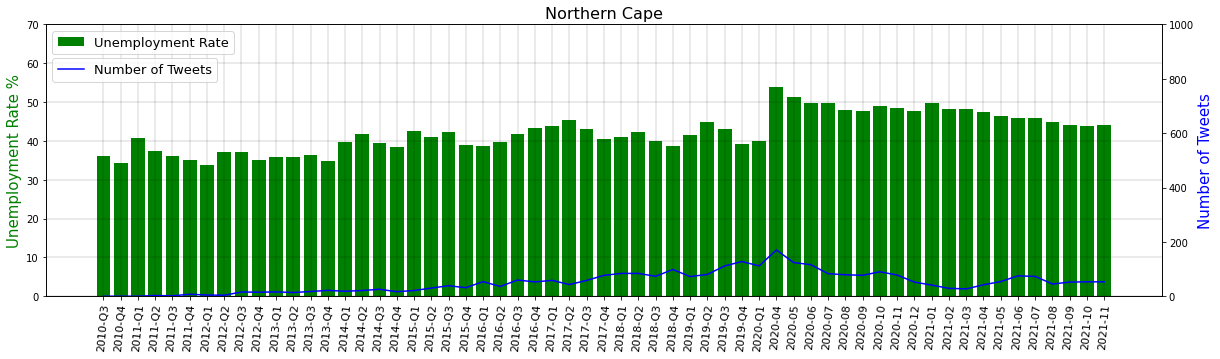

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Northern Cape', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
l = len(output)
ax1.bar (output,nc , color='g')
ax2.plot (output, nc2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 1000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (nc, nc2[1:-1])

(0.6221011789110078, 1.4443562334544899e-07)

In [ ]:
# North West
NW1 = NW.groupby('Date')['TextToLower'].count()

all_dates = NW1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

NW1 = pd.DataFrame ({'Date':NW1.index.tolist(), 'Count':NW1.values.tolist()})
NW1['DesiredDate'] = desired_dates

NW2 = NW1.groupby('DesiredDate')['Count'].sum()
N = NW1.groupby('DesiredDate')['Count'].count()
nw2 = [x/y for x, y in zip (NW2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


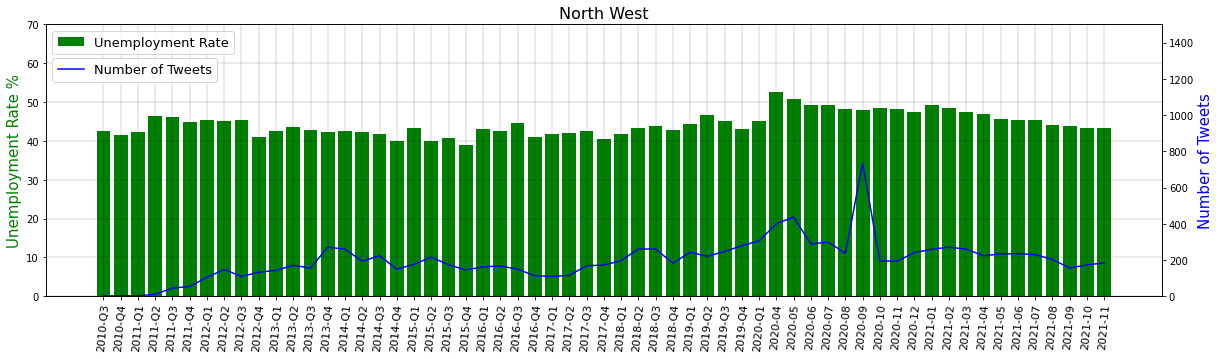

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('North West', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,nw , color='g')
ax2.plot (output, nw2[:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 1500)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (nw, nw2[:-1])

(0.488355925451906, 8.711078439007002e-05)

In [ ]:
# Western Cape
WC1 = WC.groupby('Date')['TextToLower'].count()

all_dates = WC1.index.to_list()
desired_dates = [pd.to_datetime(str(x.year)+str('-q')+str(x.quarter)) if x <= pd.to_datetime('2020-03') else x for x in all_dates]

WC1 = pd.DataFrame ({'Date':WC1.index.tolist(), 'Count':WC1.values.tolist()})
WC1['DesiredDate'] = desired_dates

WC2 = WC1.groupby('DesiredDate')['Count'].sum()
N = WC1.groupby('DesiredDate')['Count'].count()
wc2 = [x/y for x, y in zip (WC2.values.tolist(), N.values.tolist())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


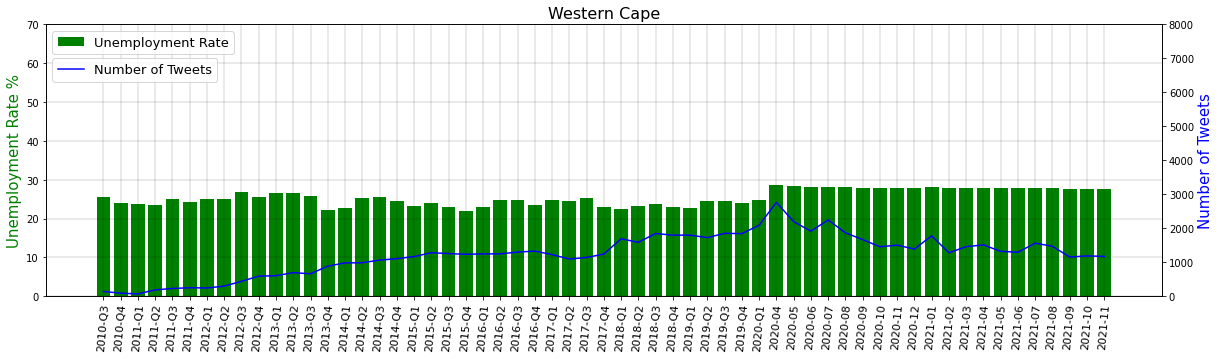

In [ ]:
f = plt.figure (figsize=(20,5))
plt.title ('Western Cape', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(0, 70, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.bar (output,wc , color='g')
ax2.plot (output, wc2[1:-1], 'b')
ax1.set_xticklabels(output, fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='g')
ax2.set_ylabel ('Number of Tweets', {'fontsize': 15}, color = 'b')
ax2.set_ylim (0, 8000)
ax1.legend (['Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Number of Tweets'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
from scipy import stats
stats.pearsonr (wc, wc2[1:-1])

(0.27629614496746063, 0.03415063555560787)

# Sentiment Analysis

This part uses GPU. Yet, it may take hours for it to execute.

In [ ]:
file_path2 = file_path + '/dataset2.csv'

In [ ]:
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:37tcmalloc: large alloc 1147494400 bytes == 0x38d22000 @  0x7f4272cb7615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 2.6 MB/s eta 0:06:25tcmalloc: large alloc 1434370048 bytes == 0x7d378000 @  0x7f4272cb7615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

In [ ]:
!pip install transformers==3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 754 kB 36.6 MB/s 
     |████████████████████████████████| 880 kB 61.1 MB/s 
     |████████████████████████████████| 1.3 MB 58.0 MB/s 
     |████████████████████████████████| 3.0 MB 53.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=af4c3821590f3d7313097792028de512072e4b772b166d7b13f8308b059218b7
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
from scipy.special import softmax
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from tqdm import tqdm

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Specifying GPU
device = torch.device ('cuda')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained ('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained ('cardiffnlp/twitter-roberta-base-sentiment')

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Finding the Accuracy of the Model**

In [ ]:
# Reading the Labelled Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Files/Test.csv', sep=',', encoding='utf-8')
len (df)

191

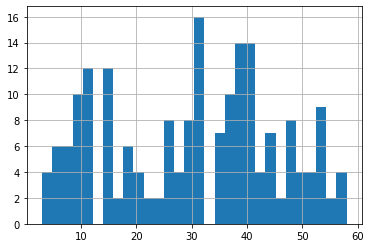

In [ ]:
data = list(df['Text'].astype(str))
seq_len = [len (x.split()) for x in data]
pd.Series (seq_len).hist(bins = 30)

In [ ]:
# The maximum length of the tweets according to above diagram is 61
max_len = 59

In [ ]:
tokens = tokenizer.batch_encode_plus (data, max_length=max_len, pad_to_max_length=True, add_special_tokens=True, truncation=True)
data_seq = torch.tensor (tokens['input_ids'])
data_mask = torch.tensor (tokens['attention_mask'])

In [ ]:
tensor_data = TensorDataset (data_seq, data_mask)
seq_sampler = SequentialSampler (tensor_data)
dataloader = DataLoader (tensor_data, sampler=seq_sampler, batch_size=1)

In [ ]:
model = model.to (device)

In [ ]:
P = []

with torch.no_grad():
  for d in tqdm(dataloader):
    input_ids = d[0].to (device)
    attention_mask = d[1].to (device)

    outputs = model (input_ids=input_ids, attention_mask=attention_mask)

    result = [outputs[0][0][0].item(), outputs[0][0][1].item(), outputs[0][0][2].item()]
    result = softmax (result)

    negative.append (result[0])
    neutral.append (result[1])
    positive.append (result[2])

    mx = result[0]
    mxidx = 0
    if result[1] > mx:
      mx = result [1]
      mxidx = 1
    if result[2] > mx:
      mx = result[2]
      mxidx = 2
    P.append (mxidx)

# 0: NEG
# 1: NEU
# 2: POS

100%|██████████| 191/191 [00:02<00:00, 81.93it/s]


In [ ]:
A = []
df['Label'] = df['Label'].astype(str)
a = list (df['Label'])
for item in a:
  if item == 'Neg':
    A.append (0)
  elif item == 'Neu':
    A.append (1)
  else:
    A.append (2)

In [ ]:
CM = confusion_matrix(A, P)
CM = CM / len (P)
CM = pd.DataFrame(CM, index=['Negative','Neutral', 'Positive'], columns=['Negative','Neutral', 'Positive'])

Text(5.9999999999999964, 0.5, 'True Values')

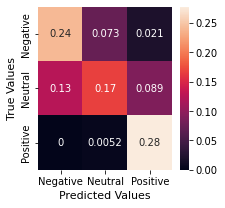

In [ ]:
plt.figure(figsize = (3,3))
sns.heatmap(CM, annot=True)
plt.xlabel("Predicted Values", fontsize = 11)
plt.ylabel("True Values", fontsize = 11)

In [ ]:
target_names = ['Negative','Neutral', 'Positive']
print(classification_report(A, P, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.66      0.72      0.69        64
     Neutral       0.68      0.44      0.53        73
    Positive       0.72      0.98      0.83        54

    accuracy                           0.69       191
   macro avg       0.68      0.71      0.68       191
weighted avg       0.68      0.69      0.67       191



**Performing Sentiment Analysis on the Whole Dataset**

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
data = list(df['CleanedText'].astype(str))

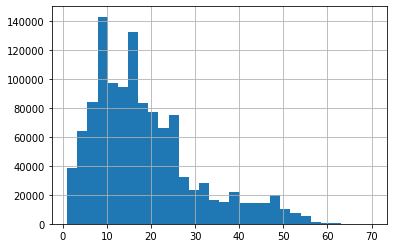

In [ ]:
seq_len = [len (x.split()) for x in data]
pd.Series (seq_len).hist(bins = 30)

In [ ]:
# The maximum length of the tweets according to above diagram is 61
max_len = 63

In [ ]:
tokens = tokenizer.batch_encode_plus (data, max_length=max_len, pad_to_max_length=True, add_special_tokens=True, truncation=True)

In [ ]:
data_seq = torch.tensor (tokens['input_ids'])
data_mask = torch.tensor (tokens['attention_mask'])

In [ ]:
tensor_data = TensorDataset (data_seq, data_mask)
seq_sampler = SequentialSampler (tensor_data)
dataloader = DataLoader (tensor_data, sampler=seq_sampler, batch_size=1)

In [ ]:
model = model.to (device)

In [ ]:
negative = []
neutral = []
positive = []
clas = []
score = []

with torch.no_grad():
  for d in tqdm(dataloader):
    input_ids = d[0].to (device)
    attention_mask = d[1].to (device)

    outputs = model (input_ids=input_ids, attention_mask=attention_mask)

    result = [outputs[0][0][0].item(), outputs[0][0][1].item(), outputs[0][0][2].item()]
    result = softmax (result)

    negative.append (result[0])
    neutral.append (result[1])
    positive.append (result[2])

    mx = result[0]
    mxidx = 0
    if result[1] > mx:
      mx = result [1]
      mxidx = 1
    if result[2] > mx:
      mx = result[2]
      mxidx = 2
    clas.append (mxidx)

    if mxidx == 1:
      score.append ((result[2]+result[0])/2)
    elif mxidx == 0:
      score.append (-result[0])
    else:
      score.append (result[2])

100%|██████████| 1182632/1182632 [3:21:07<00:00, 98.00it/s]


In [ ]:
df['Class'] = clas
df['Negative'] = negative
df['Neutral'] = neutral
df['Positive'] = positive
df['Score'] = score

In [ ]:
df.to_csv (file_path2, index=False, encoding='utf-8')

**GPU is not used in the rest of this file.**

# Finding Statistics

**Size of the Dataset**

In [ ]:
file_path2 = file_path + '/dataset2.csv'

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
len (df)

1182632

In [ ]:
df['Date'] = pd.to_datetime (df['Date'])
df1 = df[df['Date'] >= pd.to_datetime('2020-04')]

In [ ]:
len (df1)

289738

In [ ]:
len (df) - len (df1)

892894

**Distribution on different provinces**

In [ ]:
pr = ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 'Mpumalanga', 'Northern Cape', 'North West', 'Western Cape']
provinces = {}
l = len (df)
for item in pr:
  aux = df[df['Province'] == item]
  s = len(aux) / l
  provinces[item] = s

In [ ]:
l = sum (list(provinces.values()))
for k in provinces.keys():
  provinces[k] /= l

Text(0.5, 0, '')

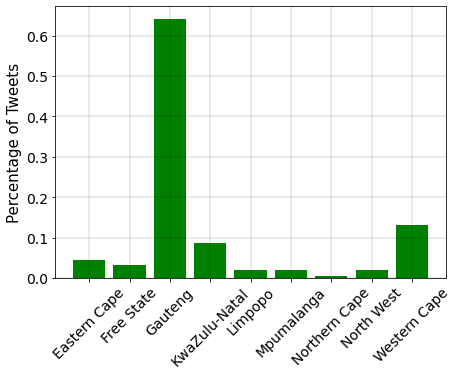

In [ ]:
plt.figure (figsize=(7,5))
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 14})
plt.bar (list(provinces.keys()), list(provinces.values()), color='g')
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Tweets', {'fontsize': 15})
plt.xlabel ('')

In [ ]:
provinces['Western Cape'] + provinces['KwaZulu-Natal'] + provinces['Gauteng']

0.8587151370840633

More than 85% of the tweets belong to urban areas, i.e. Gauteng, KwaZulu-Natal, and Western Cape.

**Sentiments**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
before = df[df['Date'] <= pd.to_datetime('2020-03')]
during = df[df['Date'] >= pd.to_datetime('2020-04')]

In [ ]:
sentiment0 = before.groupby('Class')['CleanedText'].count()
sentiment1 = during.groupby('Class')['CleanedText'].count()
before0 = [sentiment0[0]/len(before), sentiment0[1]/len(before), sentiment0[2]/len(before)]
during0 = [sentiment1[0]/len(during), sentiment1[1]/len(during), sentiment1[2]/len(during)]

Text(0.5, 0, '')

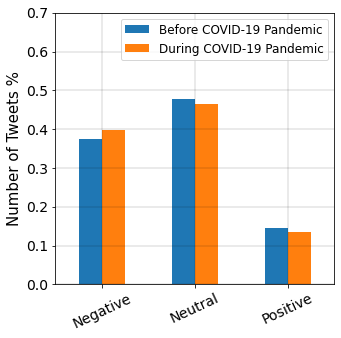

In [ ]:
fig = []
fig.append (['Negative', before0[0], during0[0]])
fig.append (['Neutral', before0[1], during0[1]])
fig.append (['Positive', before0[2], during0[2]])
fig = pd.DataFrame (fig, columns=['Class', 'Before COVID-19 Pandemic', 'During COVID-19 Pandemic'])
fig.plot (x='Class', y=['Before COVID-19 Pandemic', 'During COVID-19 Pandemic'], kind='bar', figsize=(5,5))
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.ylim (0, 0.7)
plt.legend (['Before COVID-19 Pandemic', 'During COVID-19 Pandemic'])
plt.ylabel ('Number of Tweets %', {'fontsize': 15})
plt.xlabel ('', {'fontsize': 15})

In [ ]:
EC = df[df['Province'] == 'Eastern Cape']
FS = df[df['Province'] == 'Free State']
GT = df[df['Province'] == 'Gauteng']
NL = df[df['Province'] == 'KwaZulu-Natal']
LM = df[df['Province'] == 'Limpopo']
MP = df[df['Province'] == 'Mpumalanga']
NC = df[df['Province'] == 'Northern Cape']
NW = df[df['Province'] == 'North West']
WC = df[df['Province'] == 'Western Cape']

Text(0.5, 0, '')

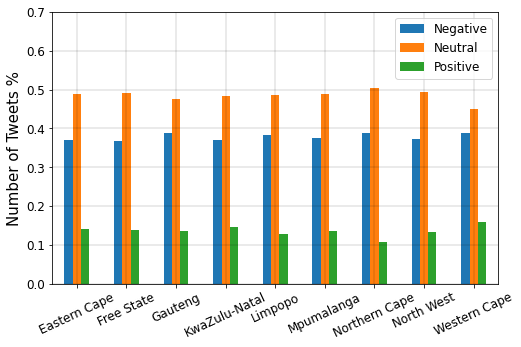

In [ ]:
EC0 = EC.groupby('Class')['CleanedText'].count()
EC0 = [EC0[0]/len(EC), EC0[1]/len(EC), EC0[2]/len(EC)]
FS0 = FS.groupby('Class')['CleanedText'].count()
FS0 = [FS0[0]/len(FS), FS0[1]/len(FS), FS0[2]/len(FS)]
GT0 = GT.groupby('Class')['CleanedText'].count()
GT0 = [GT0[0]/len(GT), GT0[1]/len(GT), GT0[2]/len(GT)]
NL0 = NL.groupby('Class')['CleanedText'].count()
NL0 = [NL0[0]/len(NL), NL0[1]/len(NL), NL0[2]/len(NL)]
LM0 = LM.groupby('Class')['CleanedText'].count()
LM0 = [LM0[0]/len(LM), LM0[1]/len(LM), LM0[2]/len(LM)]
MP0 = MP.groupby('Class')['CleanedText'].count()
MP0 = [MP0[0]/len(MP), MP0[1]/len(MP), MP0[2]/len(MP)]
NC0 = NC.groupby('Class')['CleanedText'].count()
NC0 = [NC0[0]/len(NC), NC0[1]/len(NC), NC0[2]/len(NC)]
NW0 = NW.groupby('Class')['CleanedText'].count()
NW0 = [NW0[0]/len(NW), NW0[1]/len(NW), NW0[2]/len(NW)]
WC0 = WC.groupby('Class')['CleanedText'].count()
WC0 = [WC0[0]/len(WC), WC0[1]/len(WC), WC0[2]/len(WC)]

fig = []
fig.append(['Eastern Cape', EC0[0], EC0[1], EC0[2]])
fig.append(['Free State', FS0[0], FS0[1], FS0[2]])
fig.append(['Gauteng', GT0[0], GT0[1], GT0[2]])
fig.append(['KwaZulu-Natal', NL0[0], NL0[1], NL0[2]])
fig.append(['Limpopo', LM0[0], LM0[1], LM0[2]])
fig.append(['Mpumalanga', MP0[0], MP0[1], MP0[2]])
fig.append(['Northern Cape', NC0[0], NC0[1], NC0[2]])
fig.append(['North West', NW0[0], NW0[1], NW0[2]])
fig.append(['Western Cape', WC0[0], WC0[1], WC0[2]])
fig = pd.DataFrame (fig, columns=['Province', 'Negative', 'Neutral', 'Positive'])
fig.plot (x='Province', y=['Negative', 'Neutral', 'Positive'], kind='bar', figsize=(8,5))
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.ylim (0, 0.7)
plt.legend (['Negative', 'Neutral', 'Positive'])
plt.ylabel ('Number of Tweets %', {'fontsize': 15})
plt.xlabel ('', {'fontsize': 15})

In [ ]:
print ('EC', EC0)
print ('FS', FS0)
print ('GT', GT0)
print ('NL', NL0)
print ('LM', LM0)
print ('MP', MP0)
print ('NC', NC0)
print ('NW', NW0)
print ('WC', WC0)

EC [0.3708511579879038, 0.4889179820032453, 0.14023086000885085]
FS [0.368669982875316, 0.49242980238658296, 0.13890021473810107]
GT [0.3883026393766969, 0.47543361565701964, 0.1362637449662835]
NL [0.36959680700598685, 0.4844322166895937, 0.14597097630441944]
LM [0.3838719827392457, 0.48725670876972177, 0.1288713084910325]
MP [0.3762031625988312, 0.4874527328979031, 0.13634410450326573]
NC [0.38784, 0.50464, 0.10752]
NW [0.3728290394271133, 0.4930035393859577, 0.13416742118692895]
WC [0.3890235781661139, 0.45093323506403665, 0.16004318676984944]


In [ ]:
urban = df[(df['Province'] == 'Gauteng') | (df['Province'] == 'KwaZulu-Natal') | (df['Province'] == 'Western Cape')]
rural = df[(df['Province'] != 'Gauteng') & (df['Province'] != 'KwaZulu-Natal') & (df['Province'] != 'Western Cape')]

In [ ]:
urban0 = urban.groupby('Date')['Score'].sum()
rural0 = rural.groupby('Date')['Score'].sum()
urban1 = urban.groupby('Date')['CleanedText'].count()
rural1 = rural.groupby('Date')['CleanedText'].count()

In [ ]:
d = [str(x)[0:7] for x in urban0.index]
u = [s/n for s, n in zip(urban0, urban1)]
r = [s/n for s, n in zip(rural0, rural1)]

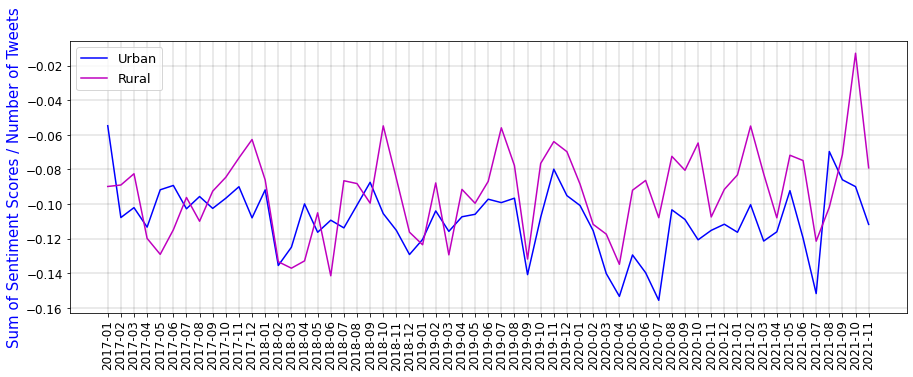

In [ ]:
f = plt.figure (figsize=(15,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
#plt.ylim(0, 80)
n = 79
plt.plot (d[n:-1], u[n:-1], 'b')
plt.plot (d[n:-1], r[n:-1], 'm')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=90)#'vertical')
plt.ylabel ('Sum of Sentiment Scores / Number of Tweets', {'fontsize': 15}, color='b')
plt.legend (['Urban','Rural'])
plt.show()

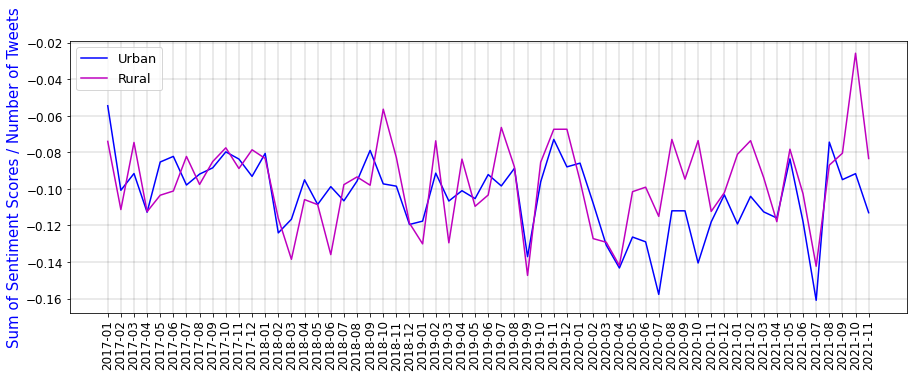

In [ ]:
f = plt.figure (figsize=(15,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
#plt.ylim(0, 80)
n = 79
plt.plot (d[n:-1], u[n:-1], 'b')
plt.plot (d[n:-1], r[n:-1], 'm')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=90)#'vertical')
plt.ylabel ('Sum of Sentiment Scores / Number of Tweets', {'fontsize': 15}, color='b')
plt.legend (['Urban','Rural'])
plt.show()

**Stratifying Unemployment Rate of Provinces based on Age and Industry**

**Age**

In [ ]:
# Age-2021
# Source: http://www.statssa.gov.za/publications/P0302/P03022021.pdf
age = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '0-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+', 'Total']
EC1 = [681354,731328,768035,624558,452379,468946,517232,464769,365121,318951,269854,246166,220687,180196,135681,97777,133555,6676590]
FS1 = [268531,273258,293005,254791,229874,238227,259275,233477,184337,159586,134528,115716,94387,76776,54628,34308,27737,2932441]
GT1 = [1321840,1252810,1147171,1076418,1349311,1668804,1729846,1483479,1149539,937015,736621,611262,489182,369602,253785,147700,86004,15810388]
NL1 = [1214414,1198342,1191956,1034772,960644,1016075,1027447,891706,666238,557039,432163,378916,306801,244651,186597,114022,91791,11513575]
LP1 = [663129,675009,679403,562385,418735,438544,472696,427044,344784,289300,227744,196720,156804,131226,96692,62200,84307,5926724]
MP1 = [464586,448426,476663,399833,382282,419163,448988,402680,307163,250584,196589,164482,124067,98860,68008,42147,49061,4743584]
NC1 = [128438,127422,125265,107012,95661,103886,116019,106031,83215,70350,58895,49196,40806,33564,24430,16834,16021,1303047]
NW1 = [387058,387159,406050,335244,303087,340833,381200,347559,279544,233912,189347,160234,128182,95718,65053,43788,38887,4122854]
WC1 = [579605,569542,583473,514928,547331,629656,677941,628505,501790,437402,379649,321132,254894,192009,139470,88488,67960,7113776]

In [ ]:
# Age-2020
# Source: https://www.statssa.gov.za/publications/P0302/P03022020.pdf

EC2 = [702044,751774,765180,599184,478473,501473,524994,451007,355503,315332,269042,248969,223485,181422,136105,100454,129562,6734001]
FS2 = [264320,277954,291297,249141,234076,246681,262679,226679,178883,157378,133348,115132,95191,77938,55104,34975,28126,2928903]
GT2 = [1304927,1224646,1117926,1062602,1340369,1655304,1719113,1425916,1104058,908134,716093,598836,479181,360126,244621,141871,84412,15488137]
NL2 = [1290865,1238265,1179731,1000825,983379,1040504,1029626,853785,637862,539934,423872,375830,305552,246130,186709,110251,88507,11531628]
LP2 = [635117,671354,664950,539369,439977,461593,476555,412125,332191,279903,222592,193030,155413,130199,94258,61172,82755,5852553]
MP2 = [456558,457688,467206,391623,391634,426938,450361,385478,291967,240923,190350,159214,121200,96820,65142,41224,45461,4679786]
NC2 = [123707,124561,126728,106368,97432,106342,116563,102440,80339,69396,58142,48810,41154,33894,24376,16954,15579,1292786]
NW2 = [401845,399364,402177,324615,307477,347899,381397,334735,269044,227810,185415,158189,126819,94483,64527,44868,38151,4108816]
WC2 = [564068,570346,576358,500852,550550,634019,680462,606128,484094,430838,372410,313299,248321,187652,136333,85294,64718,7005741]


In [ ]:
# Age-2019
# Source: https://www.statssa.gov.za/publications/P0302/P03022019.pdf

EC3 = [724979,761380,744889,590967,499509,521391,513360,427873,342369,304590,267466,251747,223865,176518,128350,100470,132555,6712276]
FS3 = [269566,285218,281338,242030,235788,253059,256796,214099,170772,151616,131151,113709,94905,75093,51235,32162,28929,2887465]
GT3 = [1278086,1235127,1115251,1027773,1335604,1657254,1674390,1357901,1057834,871036,702640,593312,474169,349051,230171,126533,89983,15176116]
NL3 = [1231101,1196909,1136163,980573,1006031,1061072,1008574,805406,613052,517033,423932,376538,306529,244864,178784,106104,96422,11289086]
LP3 = [671145,685489,638214,521671,491304,506465,494715,414464,330869,275088,225989,195379,160280,130583,90848,61883,88198,5982584]
MP3 = [231177,230987,224004,193178,194788,206550,206382,171911,139761,122378,104665,87153,68176,53960,36180,24528,32780,2328559]
NC3 = [124890,121544,120192,103167,97278,107688,113762,97171,76718,66928,56856,48509,41286,32858,23144,15439,16446,1263875]
NW3 = [400609,405590,389264,317228,309145,353859,371120,317638,255934,217130,180725,155471,124075,89517,60462,40499,38895,4027160]
WC3 = [566934,580381,552862,489956,545024,636458,667162,575249,462595,414775,361166,304311,240114,179444,127114,76179,64550,6844272]


In [ ]:
# Age-2018
# Source: https://www.statssa.gov.za/publications/P0302/P03022018.pdf

EC4 = [744571,768110,727015,590297,531545,527548,495926,401438,315467,275531,246226,230554,199986,154362,111346,91026,111786,6522734]
FS4 = [292277,297553,276228,251737,252127,267346,262530,215768,171671,150413,129669,111032,93118,71530,48491,31394,31463,2954348]
GT4 = [1289558,1238980,1073784,1033968,1295014,1583867,1575352,1304733,1035258,848107,684064,571442,449283,323435,209248,117024,83924,14717040]
NL4 = [1228339,1248537,1107008,1019693,1062455,1077999,1004480,793903,615240,505869,426270,369067,300517,239788,169574,105520,110464,11384722]
LP4 = [688603,677757,618970,541501,524829,524842,484729,390511,298945,239728,199782,167650,139315,109005,73274,51562,66271,5797275]
MP4 = [508218,490786,431728,391936,399926,428268,422145,341357,259300,210924,173550,139688,110697,82093,52770,35640,44847,4523874]
NC4 = [127111,125458,116711,102473,98840,106376,107526,89312,70601,62138,52795,45376,38780,30006,21232,14457,16364,1225555]
NW4 = [440192,419456,377237,319710,315616,351103,353467,299977,241405,204661,172511,147865,116551,82637,56890,38787,40891,3978955]
WC4 = [610082,595444,523803,482475,538809,619602,639088,544139,441300,394999,337714,279693,216842,160771,111137,67612,57594,6621103]


Text(0.5, 0, 'Age')

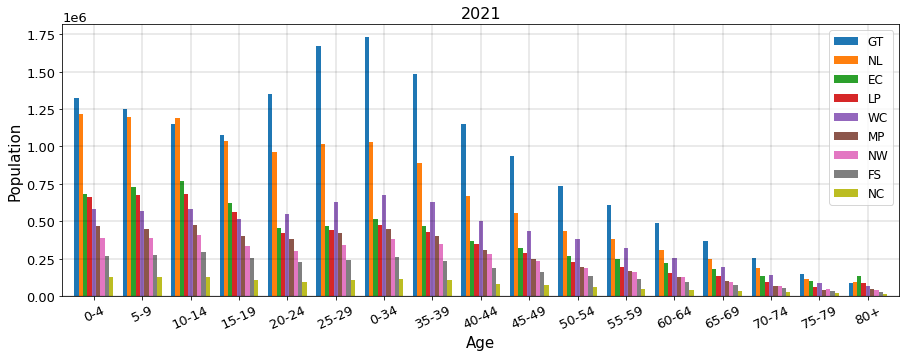

In [ ]:
l = len (age)
ages = []
for i in range (0, l-1):
    ages.append ([age[i], EC1[i], FS1[i], GT1[i], NL1[i], LP1[i], MP1[i], NC1[i], NW1[i], WC1[i]])
df1 = pd.DataFrame (ages, columns = ['age', 'EC', 'FS', 'GT', 'NL', 'LP', 'MP', 'NC', 'NW', 'WC'])
df1.plot (x='age', y=['GT','NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'], kind='bar', figsize=(15, 5), width=0.8)
plt.title ('2021', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Population', {'fontsize': 15})
plt.xlabel ('Age', {'fontsize': 15})

Text(0.5, 0, 'Age')

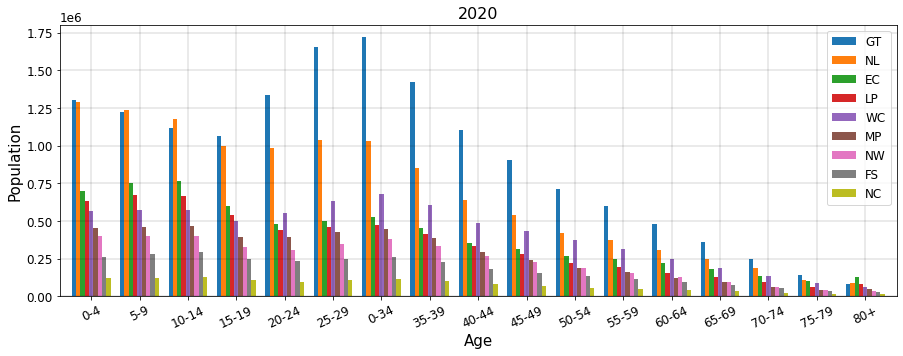

In [ ]:
l = len (age)
ages = []
for i in range (0, l-1):
    ages.append ([age[i], EC2[i], FS2[i], GT2[i], NL2[i], LP2[i], MP2[i], NC2[i], NW2[i], WC2[i]])
df1 = pd.DataFrame (ages, columns = ['age', 'EC', 'FS', 'GT', 'NL', 'LP', 'MP', 'NC', 'NW', 'WC'])
df1.plot (x='age', y=['GT','NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'], kind='bar', figsize=(15, 5), width=0.8)
plt.title ('2020', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Population', {'fontsize': 15})
plt.xlabel ('Age', {'fontsize': 15})

Text(0.5, 0, 'Age')

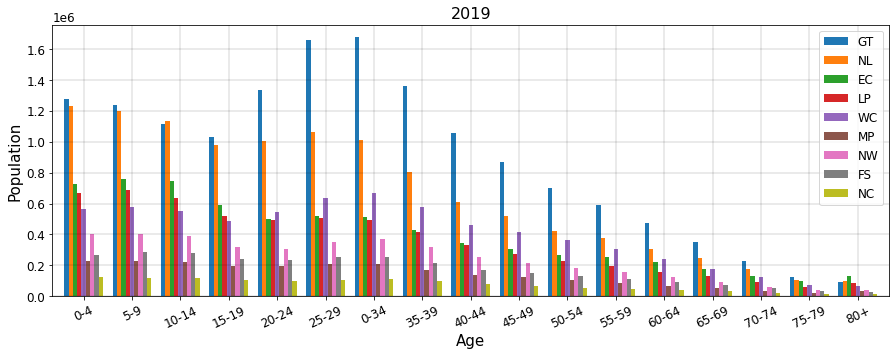

In [ ]:
l = len (age)
ages = []
for i in range (0, l-1):
    ages.append ([age[i], EC3[i], FS3[i], GT3[i], NL3[i], LP3[i], MP3[i], NC3[i], NW3[i], WC3[i]])
df1 = pd.DataFrame (ages, columns = ['age', 'EC', 'FS', 'GT', 'NL', 'LP', 'MP', 'NC', 'NW', 'WC'])
df1.plot (x='age', y=['GT','NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'], kind='bar', figsize=(15, 5), width=0.8)
plt.title ('2019', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Population', {'fontsize': 15})
plt.xlabel ('Age', {'fontsize': 15})

Text(0.5, 0, 'Age')

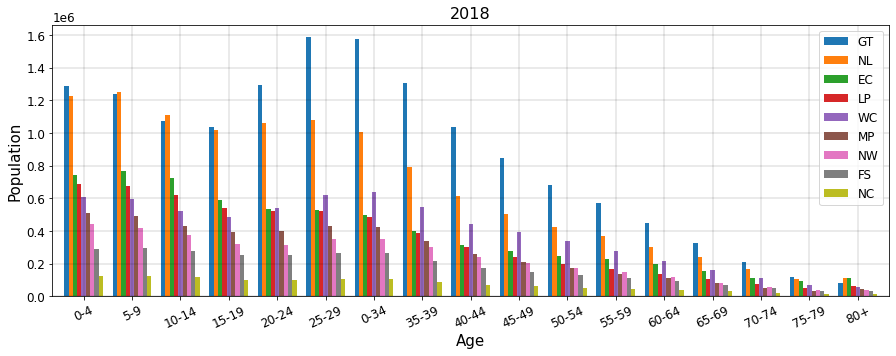

In [ ]:
l = len (age)
ages = []
for i in range (0, l-1):
    ages.append ([age[i], EC4[i], FS4[i], GT4[i], NL4[i], LP4[i], MP4[i], NC4[i], NW4[i], WC4[i]])
df1 = pd.DataFrame (ages, columns = ['age', 'EC', 'FS', 'GT', 'NL', 'LP', 'MP', 'NC', 'NW', 'WC'])
df1.plot (x='age', y=['GT','NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'], kind='bar', figsize=(15, 5), width=0.8)
plt.title ('2018', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL','EC', 'LP', 'WC', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Population', {'fontsize': 15})
plt.xlabel ('Age', {'fontsize': 15})

**Industry**

**Industry-2021**

Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf

http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf

http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2019.pdf

http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2018.pdf

In [ ]:
# The columns are: ['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2' ,'2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3']
Agriculture = [847, 843, 842, 849, 837, 842, 880, 885, 865, 799, 808, 810, 792, 862, 829]
AWesternCape = [208, 181, 183, 213, 225, 182, 215, 236, 255, 197, 137, 178, 136, 185, 197]
AEasternCape = [91 ,97, 88, 78, 84, 97, 96, 77, 80, 67, 98, 101, 101, 82, 107]
ANorthernCape = [48 ,44, 42, 39, 41, 33, 33, 36, 41, 24, 28, 28, 39, 31, 34]
AFreeState = [92 ,71, 74, 57, 60, 60, 56, 66, 62, 57, 49, 54, 55, 74, 72]
AKwaZuluNatal = [115, 122, 121, 136, 134, 134, 143, 162, 133, 126, 132, 141, 130, 137, 113]
ANorthWest = [47 ,43, 60, 62, 62, 61, 59, 48, 51, 45, 66, 40, 40, 70, 52]
AGauteng = [29 ,32, 34, 31 ,31, 33, 40, 30, 30, 32, 41, 33, 43, 35, 28]
AMpumalanga = [87 ,94, 91, 96 ,76 ,101, 98, 92, 86, 108, 117, 100, 113, 95, 92]
ALimpopo = [130, 158, 148, 138, 124, 141, 140, 140, 126 ,142, 142, 136, 136, 153, 133]

# However, this is the columns that I want: [2018, 2019, 2020, 2021]
l = len (Agriculture)
Agr = []
Awc = []
Aec = []
Anc = []
Afs = []
Anl = []
Anw = []
Agt = []
Amp = []
Alm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Agr.append (Agriculture[i])
        Awc.append (AWesternCape[i])
        Aec.append (AEasternCape[i])
        Anc.append (ANorthernCape[i])
        Afs.append (AFreeState[i])
        Anl.append (AKwaZuluNatal[i])
        Anw.append (ANorthWest[i])
        Agt.append (AGauteng[i])
        Amp.append (AMpumalanga[i])
        Alm.append (ALimpopo[i])
        q += 1

    else:
        Agr[q] += Agriculture[i]
        Awc[q] += AWesternCape[i]
        Aec[q] += AEasternCape[i]
        Anc[q] += ANorthernCape[i]
        Afs[q] += AFreeState[i]
        Anl[q] += AKwaZuluNatal[i]
        Anw[q] += ANorthWest[i]
        Agt[q] += AGauteng[i]
        Amp[q] += AMpumalanga[i]
        Alm[q] += ALimpopo[i]

#----------------------------------------
print ('[2018, 2019, 2020, 2021]')
Agr

[2018, 2019, 2020, 2021]


[3381, 3444, 3282, 2483]

In [ ]:
Mining = [397, 435, 406, 438, 417, 381, 419, 430, 436, 373, 419, 384, 395, 398, 345]
MiWesternCape = [2 ,4, 4, 4, 4, 3, 9, 2, 2, 4, 10, 5, 8, 3, 4]
MiEasternCape = [1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1]
MiNorthernCape = [24 ,23, 23, 27, 28, 26, 29, 33, 35, 27, 34, 32, 28, 18, 20]
MiFreeState = [18 ,23, 24, 24, 17, 20, 15, 17, 20, 18, 16, 13, 16, 18, 19]
MiKwaZuluNatal = [7 ,6, 9, 8, 9, 7, 3, 5, 7, 4, 1, 2, 2, 3, 6]
MiNorthWest = [125, 147, 133, 130, 136, 122, 130, 134, 125, 122, 140, 120, 123, 138, 124]
MiGauteng = [74 ,72, 61, 65, 50, 50, 65, 73, 83, 53, 61, 59, 61, 73, 34]
MiMpumalanga = [66 ,72, 64, 73, 71, 68, 78, 80, 69, 67, 65, 61, 62, 47, 50]
MiLimpopo = [81 ,88, 89, 106, 100, 86, 89, 84, 93, 76, 89, 90, 95, 98, 86]

l = len (Mining)
Mi = []
Miwc = []
Miec = []
Minc = []
Mifs = []
Minl = []
Minw = []
Migt = []
Mimp = []
Milm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Mi.append (Mining[i])
        Miwc.append (MiWesternCape[i])
        Miec.append (MiEasternCape[i])
        Minc.append (MiNorthernCape[i])
        Mifs.append (MiFreeState[i])
        Minl.append (MiKwaZuluNatal[i])
        Minw.append (MiNorthWest[i])
        Migt.append (MiGauteng[i])
        Mimp.append (MiMpumalanga[i])
        Milm.append (MiLimpopo[i])
        q += 1

    else:
        Mi[q] += Mining[i]
        Miwc[q] += MiWesternCape[i]
        Miec[q] += MiEasternCape[i]
        Minc[q] += MiNorthernCape[i]
        Mifs[q] += MiFreeState[i]
        Minl[q] += MiKwaZuluNatal[i]
        Minw[q] += MiNorthWest[i]
        Migt[q] += MiGauteng[i]
        Mimp[q] += MiMpumalanga[i]
        Milm[q] += MiLimpopo[i]


In [ ]:
Manufacturing = [1849, 1744, 1719, 1766, 1780, 1789, 1760, 1720, 1706, 1456, 1460, 1491, 1497, 1415, 1402]
MWesternCape = [351 ,339, 297, 325, 346, 357, 330, 305, 309, 273, 303, 311, 311, 265, 283]
MEasternCape = [144 ,127, 118, 123, 113, 119, 134, 127, 127, 115, 107, 102, 108, 115, 126]
MNorthernCape = [15 ,11, 13, 17, 17, 17, 15, 17, 14, 6, 9, 14, 20, 11, 11]
MFreeState = [58 ,58,65, 71, 77, 62, 59, 55, 53, 54, 48, 49, 48, 45, 31]
MKwaZuluNatal = [371, 350, 346, 338, 348, 352, 333, 338, 324, 249, 272, 272, 277, 253, 271]
MNorthWest = [74 ,49, 54, 55, 75, 72, 74, 70, 62, 63, 44, 51, 72, 44, 63]
MGauteng = [650, 612, 627, 637, 620, 627, 627, 624, 616, 534, 504, 525, 510, 505, 459]
MMpumalanga = [98 ,117,120, 109, 97, 101, 104 ,103 ,105, 97, 91, 90, 82, 106, 98]
MLimpopo = [88 ,80, 79, 91, 86, 81, 84, 81, 96, 65, 81, 76, 69, 72, 60]

l = len (Manufacturing)
Ma = []
Mawc = []
Maec = []
Manc = []
Mafs = []
Manl = []
Manw = []
Magt = []
Mamp = []
Malm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Ma.append (Manufacturing[i])
        Mawc.append (MWesternCape[i])
        Maec.append (MEasternCape[i])
        Manc.append (MNorthernCape[i])
        Mafs.append (MFreeState[i])
        Manl.append (MKwaZuluNatal[i])
        Manw.append (MNorthWest[i])
        Magt.append (MGauteng[i])
        Mamp.append (MMpumalanga[i])
        Malm.append (MLimpopo[i])
        q += 1

    else:
        Ma[q] += Manufacturing[i]
        Mawc[q] += MWesternCape[i]
        Maec[q] += MEasternCape[i]
        Manc[q] += MNorthernCape[i]
        Mafs[q] += MFreeState[i]
        Manl[q] += MKwaZuluNatal[i]
        Manw[q] += MNorthWest[i]
        Magt[q] += MGauteng[i]
        Mamp[q] += MMpumalanga[i]
        Malm[q] += MLimpopo[i]

In [ ]:
Utilities = [143, 161, 156, 134, 150, 151, 133, 120, 116, 113, 90, 99, 115, 118, 96]
UWesternCape = [4 ,10, 13, 10, 10, 11, 17, 16, 6, 10, 4, 3, 7, 5, 5]
UEasternCape = [5 ,4, 3, 2, 5, 4, 8, 12, 6, 7, 4, 5, 10, 4 ,5]
UNorthernCape = [9 ,5, 6, 4, 4, 3, 2, 1, 2, 2, 1, 1, 3, 1, 3]
UFreeState = [7 ,10, 11, 10, 8, 12, 10, 9, 7, 8, 3, 12, 5, 5, 5]
UKwaZuluNatal = [19, 17, 14, 9, 10, 12, 9, 11, 14, 16, 8, 7, 9, 2, 2]
UNorthWest = [5 ,11, 7, 10, 9 ,6, 6, 3, 6, 4, 1, 7, 9, 5, 5]
UGauteng = [39, 51, 51, 37, 52, 53, 44, 31, 35, 35, 32, 30, 42, 45, 33]
UMpumalanga = [47, 41, 42, 37, 38, 40, 26, 28, 26, 19, 25, 26, 23, 40, 29]
ULimpopo = [9 ,11, 9 ,15, 14, 12, 11, 8, 13, 13, 13, 9, 7, 11, 10]

l = len (Utilities)
Ut = []
Uwc = []
Uec = []
Unc = []
Ufs = []
Unl = []
Unw = []
Ugt = []
Ump = []
Ulm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Ut.append (Utilities[i])
        Uwc.append (UWesternCape[i])
        Uec.append (UEasternCape[i])
        Unc.append (UNorthernCape[i])
        Ufs.append (UFreeState[i])
        Unl.append (UKwaZuluNatal[i])
        Unw.append (UNorthWest[i])
        Ugt.append (UGauteng[i])
        Ump.append (UMpumalanga[i])
        Ulm.append (ULimpopo[i])
        q += 1

    else:
        Ut[q] += Utilities[i]
        Uwc[q] += UWesternCape[i]
        Uec[q] += UEasternCape[i]
        Unc[q] += UNorthernCape[i]
        Ufs[q] += UFreeState[i]
        Unl[q] += UKwaZuluNatal[i]
        Unw[q] += UNorthWest[i]
        Ugt[q] += UGauteng[i]
        Ump[q] += UMpumalanga[i]
        Ulm[q] += ULimpopo[i]

In [ ]:
Construction = [1431, 1476,1502, 1481, 1339, 1363, 1339, 1350, 1343, 1066, 1080, 1166, 1079, 1222, 1157]
ConWesternCape = [214 ,233,233, 223, 220, 214, 185, 204, 188, 148, 167, 199, 179, 198, 192]
ConEasternCape = [154 ,163,172, 164, 136, 147, 161, 155, 169, 119, 109, 115, 120, 112, 122]
ConNorthernCape = [26 ,24,25, 24, 18, 16, 20, 20, 24, 12, 16, 20, 11, 19, 10]
ConFreeState = [59 ,51,64, 58, 56, 60, 46, 66, 57, 40, 53, 46, 30, 34, 33]
ConKwaZuluNatal = [211, 229,238, 244, 230, 237, 238, 229, 222, 189, 192, 199, 184, 228, 227]
ConNorthWest = [96 ,94,79, 87, 65, 70, 56, 63, 59, 51, 53, 60, 64, 82, 60]
ConGauteng = [419, 419,413, 430, 375, 382, 383, 367, 382, 343, 305 ,329, 315, 339, 307]
ConMpumalanga = [105, 112,115, 106, 101, 109, 107, 105, 101, 69, 70, 75, 80, 88, 69]
ConLimpopo = [146, 150, 163, 146, 137, 128, 142, 141, 142, 96, 115, 124, 96, 121, 137]

l = len (Construction)
Co = []
Cowc = []
Coec = []
Conc = []
Cofs = []
Conl = []
Conw = []
Cogt = []
Comp = []
Colm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Co.append (Construction[i])
        Cowc.append (ConWesternCape[i])
        Coec.append (ConEasternCape[i])
        Conc.append (ConNorthernCape[i])
        Cofs.append (ConFreeState[i])
        Conl.append (ConKwaZuluNatal[i])
        Conw.append (ConNorthWest[i])
        Cogt.append (ConGauteng[i])
        Comp.append (ConMpumalanga[i])
        Colm.append (ConLimpopo[i])
        q += 1

    else:
        Co[q] += Construction[i]
        Cowc[q] += ConWesternCape[i]
        Coec[q] += ConEasternCape[i]
        Conc[q] += ConNorthernCape[i]
        Cofs[q] += ConFreeState[i]
        Conl[q] += ConKwaZuluNatal[i]
        Conw[q] += ConNorthWest[i]
        Cogt[q] += ConGauteng[i]
        Comp[q] += ConMpumalanga[i]
        Colm[q] += ConLimpopo[i]

In [ ]:
Trade = [3276, 3219, 3305, 3320, 3345, 3429, 3408, 3249, 3320, 2946, 3008, 3063, 2979, 3087, 2778]
TrWesternCape = [510 ,511, 501, 486, 506, 518, 513, 457, 483, 450, 443, 473, 447, 423, 370]
TrEasternCape = [286 ,301, 309, 281, 265, 294, 298, 277, 269, 240, 249, 231, 244 ,252, 198]
TrNorthernCape = [48 ,50, 50, 48, 46, 49, 47, 57, 65, 57, 43, 46, 40, 40, 46]
TrFreeState = [176, 162, 141, 140, 155, 168, 179, 161, 170, 115, 160, 149, 159, 155, 163]
TrKwaZuluNatal = [467, 466, 511, 521, 534, 556, 557, 559, 585, 519, 524, 564, 543, 532, 480]
TrNorthWest = [197, 190, 197, 179, 191, 161, 186, 170, 176, 180 ,178, 176, 175, 187, 160]
TrGauteng = [1004, 975, 979, 1043, 1066, 1070, 1025, 1008, 1019, 905, 914, 906, 909, 971, 899]
TrMpumalanga = [261 ,247, 262, 267, 258, 257, 256, 263, 265, 249, 250, 251, 235, 269, 235]
TrLimpopo = [328 ,318, 354, 354, 325, 355, 349, 298, 288, 231, 248, 268, 227, 257, 226]

l = len (Trade)
Tr = []
Trwc = []
Trec = []
Trnc = []
Trfs = []
Trnl = []
Trnw = []
Trgt = []
Trmp = []
Trlm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Tr.append (Trade[i])
        Trwc.append (TrWesternCape[i])
        Trec.append (TrEasternCape[i])
        Trnc.append (TrNorthernCape[i])
        Trfs.append (TrFreeState[i])
        Trnl.append (TrKwaZuluNatal[i])
        Trnw.append (TrNorthWest[i])
        Trgt.append (TrGauteng[i])
        Trmp.append (TrMpumalanga[i])
        Trlm.append (TrLimpopo[i])
        q += 1

    else:
        Tr[q] += Trade[i]
        Trwc[q] += TrWesternCape[i]
        Trec[q] += TrEasternCape[i]
        Trnc[q] += TrNorthernCape[i]
        Trfs[q] += TrFreeState[i]
        Trnl[q] += TrKwaZuluNatal[i]
        Trnw[q] += TrNorthWest[i]
        Trgt[q] += TrGauteng[i]
        Trmp[q] += TrMpumalanga[i]
        Trlm[q] += TrLimpopo[i]

In [ ]:
Transport = [960, 1014, 996, 965, 1025, 983, 975, 1011, 995, 885, 878, 943, 903, 969, 964]
TWesternCape = [141, 157, 160, 158, 133, 126, 152, 166, 169, 125, 131, 123, 128, 139, 147]
TEasternCape = [70 ,62, 71, 71, 82, 76, 61, 73, 81, 65, 59, 82, 81 ,70, 78]
TNorthernCape = [10 ,11, 14, 11, 14, 9, 9, 11, 7, 7, 7, 7, 9, 5, 4]
TFreeState = [35 ,41, 35, 40, 42, 37, 40, 34, 34, 33, 42, 46, 35, 49, 48]
TKwaZuluNatal = [178, 194, 176, 178 ,184, 171, 192, 180, 189, 161, 168, 180, 168, 173, 163]
TNorthWest = [33 ,34, 33 ,32, 45, 38, 37, 38, 30, 33, 35, 29, 30, 38 ,28]
TGauteng = [383, 405, 389 ,358 ,389, 386, 358, 377, 363, 354, 324, 362, 333, 378, 381]
TMpumalanga = [52 ,58, 67 ,60, 69, 66, 63, 70, 65, 69, 67, 64, 48, 70, 68]
TLimpopo = [58 ,51, 51, 56, 66, 73, 64, 62, 57, 38, 47, 50, 70, 48, 47]

l = len (Transport)
T = []
Twc = []
Tec = []
Tnc = []
Tfs = []
Tnl = []
Tnw = []
Tgt = []
Tmp = []
Tlm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        T.append (Transport[i])
        Twc.append (TWesternCape[i])
        Tec.append (TEasternCape[i])
        Tnc.append (TNorthernCape[i])
        Tfs.append (TFreeState[i])
        Tnl.append (TKwaZuluNatal[i])
        Tnw.append (TNorthWest[i])
        Tgt.append (TGauteng[i])
        Tmp.append (TMpumalanga[i])
        Tlm.append (TLimpopo[i])
        q += 1

    else:
        T[q] += Transport[i]
        Twc[q] += TWesternCape[i]
        Tec[q] += TEasternCape[i]
        Tnc[q] += TNorthernCape[i]
        Tfs[q] += TFreeState[i]
        Tnl[q] += TKwaZuluNatal[i]
        Tnw[q] += TNorthWest[i]
        Tgt[q] += TGauteng[i]
        Tmp[q] += TMpumalanga[i]
        Tlm[q] += TLimpopo[i]

In [ ]:
Finance = [2402, 2399, 2502, 2611, 2516, 2495, 2492, 2568, 2517, 2234, 2434, 2312, 2527, 2248, 2386]
FWesternCape = [436, 423, 456, 469, 444, 455, 457, 448, 422, 388, 421, 407, 483, 447, 481]
FEasternCape = [134, 137, 132, 148, 127, 147, 137, 137, 141, 114, 150, 125, 157, 118, 133]
FNorthernCape = [26 ,24, 22, 19, 20, 22, 21, 29, 20, 23, 27, 37, 31, 16, 21]
FFreeState = [91 ,84, 71, 91, 77, 88, 83, 79, 66, 73, 78, 59, 72, 65, 88]
FKwaZuluNatal = [323, 327, 347, 369, 335, 347, 337, 343, 338, 304, 309, 313, 355, 309, 303]
FNorthWest = [117, 100, 98, 94 ,89 ,93, 93, 126, 106, 85, 110, 107, 96, 92, 93]
FGauteng = [1018, 1063, 1112, 1139, 1168, 1089, 1105 ,1145, 1152, 1020, 1075, 1013, 1063, 996, 1047]
FMpumalanga = [117 ,122, 143, 161, 155, 143, 158, 143, 150, 135, 145, 147, 152, 120, 130]
FLimpopo = [141 ,119, 120, 120, 101, 112, 101, 117, 123, 93, 119, 102 ,119, 87, 91]

l = len (Finance)
F = []
Fwc = []
Fec = []
Fnc = []
Ffs = []
Fnl = []
Fnw = []
Fgt = []
Fmp = []
Flm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        F.append (Finance[i])
        Fwc.append (FWesternCape[i])
        Fec.append (FEasternCape[i])
        Fnc.append (FNorthernCape[i])
        Ffs.append (FFreeState[i])
        Fnl.append (FKwaZuluNatal[i])
        Fnw.append (FNorthWest[i])
        Fgt.append (FGauteng[i])
        Fmp.append (FMpumalanga[i])
        Flm.append (FLimpopo[i])
        q += 1

    else:
        F[q] += Finance[i]
        Fwc[q] += TWesternCape[i]
        Fec[q] += TEasternCape[i]
        Fnc[q] += TNorthernCape[i]
        Ffs[q] += TFreeState[i]
        Fnl[q] += TKwaZuluNatal[i]
        Fnw[q] += TNorthWest[i]
        Fgt[q] += TGauteng[i]
        Fmp[q] += TMpumalanga[i]
        Flm[q] += TLimpopo[i]

In [ ]:
CommunityAndSocialServices = [3785, 3692, 3675, 3624, 3574, 3622, 3679, 3792, 3759, 3244, 3381, 3551, 3567, 3401, 3191]
ComWesternCape = [496, 462, 499, 484, 492, 491, 473, 542, 521, 489, 476, 513, 492, 441, 417]
ComEasternCape = [403, 402, 390, 390, 388, 381, 378, 396, 384, 346, 340, 365, 365, 376, 367]
ComNorthernCape = [95, 105, 100, 104, 109, 101, 116, 107, 106, 84, 107, 106, 119, 98 ,102]
ComFreeState = [200 ,202, 197, 219, 198, 210, 206, 201, 198, 175, 194, 222, 190, 195, 178]
ComKwaZuluNatal = [702, 684, 657, 605, 580, 593, 631, 624, 626, 561, 598, 589, 577, 563, 529]
ComNorthWest = [228, 231, 241, 237, 212, 227, 245, 267, 283, 240, 242, 282, 265, 269, 216]
ComGauteng = [1069, 1040, 1017 ,1029, 1026, 1020, 1043, 1038, 1026, 836, 889, 907, 957, 912, 874]
ComMpumalanga = [252, 238, 227, 229, 240, 248, 239, 258, 274, 217, 236, 243, 251, 238, 236]
ComLimpopo = [339, 327, 347 ,329, 328, 352, 347, 360, 341, 296, 299, 324, 352, 310, 272]

l = len (CommunityAndSocialServices)
Com = []
Comwc = []
Comec = []
Comnc = []
Comfs = []
Comnl = []
Comnw = []
Comgt = []
Commp = []
Comlm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        Com.append (CommunityAndSocialServices[i])
        Comwc.append (ComWesternCape[i])
        Comec.append (ComEasternCape[i])
        Comnc.append (ComNorthernCape[i])
        Comfs.append (ComFreeState[i])
        Comnl.append (ComKwaZuluNatal[i])
        Comnw.append (ComNorthWest[i])
        Comgt.append (ComGauteng[i])
        Commp.append (ComMpumalanga[i])
        Comlm.append (ComLimpopo[i])
        q += 1

    else:
        Com[q] += CommunityAndSocialServices[i]
        Comwc[q] += ComWesternCape[i]
        Comec[q] += ComEasternCape[i]
        Comnc[q] += ComNorthernCape[i]
        Comfs[q] += ComFreeState[i]
        Comnl[q] += ComKwaZuluNatal[i]
        Comnw[q] += ComNorthWest[i]
        Comgt[q] += ComGauteng[i]
        Commp[q] += ComMpumalanga[i]
        Comlm[q] += ComLimpopo[i]

In [ ]:
PrivateHouseholds = [1275, 1296, 1267, 1332, 1301, 1251, 1286, 1286, 1316, 1005, 1121, 1197, 1127, 1194, 1130]
PWesternCape = [165 ,161, 147, 148, 139, 140, 144, 142, 145, 95, 125, 126, 118, 146, 128]
PEasternCape = [111 ,108, 104, 118, 107, 124, 127, 129, 122, 97, 95, 107, 111, 105, 79]
PNorthernCape = [20 ,20, 27, 29, 25, 25, 30, 26, 24, 12, 15, 17, 11, 18, 24]
PFreeState = [77 ,84, 92, 96, 112, 92, 100, 97, 89, 65, 81, 94, 93, 84, 82]
PKwaZuluNatal = [225, 225, 217 ,239 ,232, 226, 231, 212, 233, 164, 184, 188, 186, 222, 206]
PNorthWest = [70 ,77, 76, 85, 84, 70, 74, 75, 72, 50, 61, 72, 59 ,51 ,50]
PGauteng = [376, 378, 384, 387, 378, 351, 366, 395, 418, 341, 351, 398, 383, 375, 381]
PMpumalanga = [111, 111, 101, 109, 103, 110, 106, 103, 105, 81, 94 ,92 ,89 ,92 ,97]
PLimpopo = [121, 134, 118, 120, 120, 115, 108, 108, 107, 100, 114, 103, 78, 101, 82]

l = len (PrivateHouseholds)
p = []
pwc = []
pec = []
pnc = []
pfs = []
pnl = []
pnw = []
pgt = []
pmp = []
plm = []
b = False
q = -1
for i in range (0, l):
    if i%4 == 0:
        p.append (PrivateHouseholds[i])
        pwc.append (PWesternCape[i])
        pec.append (PEasternCape[i])
        pnc.append (PNorthernCape[i])
        pfs.append (PFreeState[i])
        pnl.append (PKwaZuluNatal[i])
        pnw.append (PNorthWest[i])
        pgt.append (PGauteng[i])
        pmp.append (PMpumalanga[i])
        plm.append (PLimpopo[i])
        q += 1

    else:
        p[q] += PrivateHouseholds[i]
        pwc[q] += PWesternCape[i]
        pec[q] += PEasternCape[i]
        pnc[q] += PNorthernCape[i]
        pfs[q] += PFreeState[i]
        pnl[q] += PKwaZuluNatal[i]
        pnw[q] += PNorthWest[i]
        pgt[q] += PGauteng[i]
        pmp[q] += PMpumalanga[i]
        plm[q] += PLimpopo[i]

Text(0.5, 0, 'Industry')

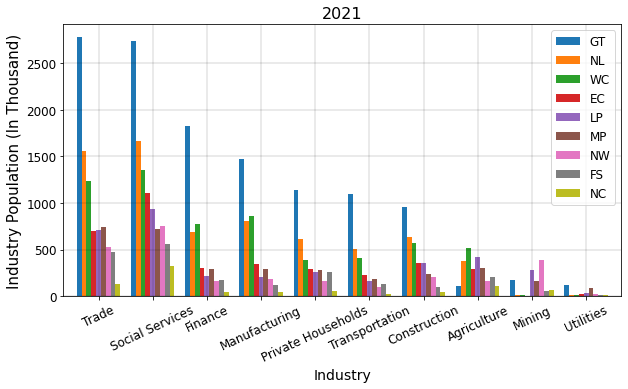

In [ ]:
industry = []
industry.append (['Trade',Trwc[3], Trec[3], Trfs[3], Trnw[3], Trgt[3], Trlm[3], Trmp[3], Trnl[3], Trnc[3]])
industry.append (['Social Services',Comwc[3], Comec[3], Comfs[3], Comnw[3], Comgt[3], Comlm[3], Commp[3], Comnl[3], Comnc[3]])
industry.append (['Finance',Fwc[3], Fec[3], Ffs[3], Fnw[3], Fgt[3], Flm[3], Fmp[3], Fnl[3], Fnc[3]])
industry.append (['Manufacturing',Mawc[3], Maec[3], Mafs[3], Manw[3], Magt[3], Malm[3], Mamp[3], Manl[3], Manc[3]])
industry.append (['Private Households',pwc[3], pec[3], pfs[3], pnw[3], pgt[3], plm[3], pmp[3], pnl[3], pnc[3]])
industry.append (['Transportation',Twc[3], Tec[3], Tfs[3], Tnw[3], Tgt[3], Tlm[3], Tmp[3], Tnl[3], Tnc[3]])
industry.append (['Construction',Cowc[3], Coec[3], Cofs[3], Conw[3], Cogt[3], Colm[3], Comp[3], Conl[3], Conc[3]])
industry.append (['Agriculture',Awc[3], Aec[3], Afs[3], Anw[3], Agt[3], Alm[3], Amp[3], Anl[3], Anc[3]])
industry.append (['Mining',Miwc[3], Miec[3], Mifs[3], Minw[3], Migt[3], Milm[3], Mimp[3], Minl[3], Minc[3]])
industry.append (['Utilities',Uwc[3], Uec[3], Ufs[3], Unw[3], Ugt[3], Ulm[3], Ump[3], Unl[3], Unc[3]])


df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2021', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Industry Population (In Thousand)', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

Text(0.5, 0, 'Industry')

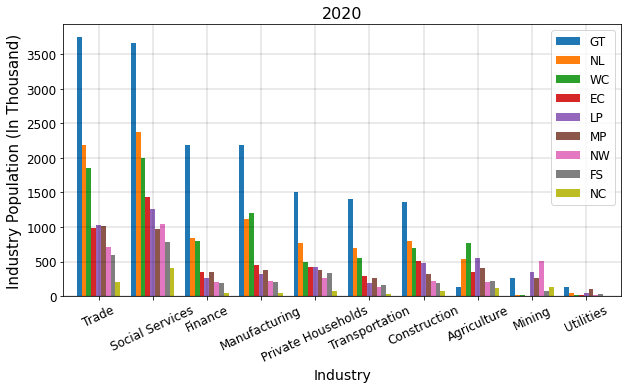

In [ ]:
industry = []
industry.append (['Trade',Trwc[2], Trec[2], Trfs[2], Trnw[2], Trgt[2], Trlm[2], Trmp[2], Trnl[2], Trnc[2]])
industry.append (['Social Services',Comwc[2], Comec[2], Comfs[2], Comnw[2], Comgt[2], Comlm[2], Commp[2], Comnl[2], Comnc[2]])
industry.append (['Finance',Fwc[2], Fec[2], Ffs[2], Fnw[2], Fgt[2], Flm[2], Fmp[2], Fnl[2], Fnc[2]])
industry.append (['Manufacturing',Mawc[2], Maec[2], Mafs[2], Manw[2], Magt[2], Malm[2], Mamp[2], Manl[2], Manc[2]])
industry.append (['Private Households',pwc[2], pec[2], pfs[2], pnw[2], pgt[2], plm[2], pmp[2], pnl[2], pnc[2]])
industry.append (['Transportation',Twc[2], Tec[2], Tfs[2], Tnw[2], Tgt[2], Tlm[2], Tmp[2], Tnl[2], Tnc[2]])
industry.append (['Construction',Cowc[2], Coec[2], Cofs[2], Conw[2], Cogt[2], Colm[2], Comp[2], Conl[2], Conc[2]])
industry.append (['Agriculture',Awc[2], Aec[2], Afs[2], Anw[2], Agt[2], Alm[2], Amp[2], Anl[2], Anc[2]])
industry.append (['Mining',Miwc[2], Miec[2], Mifs[2], Minw[2], Migt[2], Milm[2], Mimp[2], Minl[2], Minc[2]])
industry.append (['Utilities',Uwc[2], Uec[2], Ufs[2], Unw[2], Ugt[2], Ulm[2], Ump[2], Unl[2], Unc[2]])


df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2020', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Industry Population (In Thousand)', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

Text(0.5, 0, 'Industry')

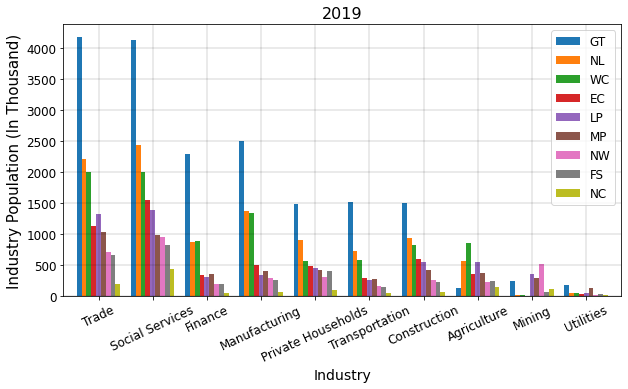

In [ ]:
industry = []
industry.append (['Trade',Trwc[1], Trec[1], Trfs[1], Trnw[1], Trgt[1], Trlm[1], Trmp[1], Trnl[1], Trnc[1]])
industry.append (['Social Services',Comwc[1], Comec[1], Comfs[1], Comnw[1], Comgt[1], Comlm[1], Commp[1], Comnl[1], Comnc[1]])
industry.append (['Finance',Fwc[1], Fec[1], Ffs[1], Fnw[1], Fgt[1], Flm[1], Fmp[1], Fnl[1], Fnc[1]])
industry.append (['Manufacturing',Mawc[1], Maec[1], Mafs[1], Manw[1], Magt[1], Malm[1], Mamp[1], Manl[1], Manc[1]])
industry.append (['Private Households',pwc[1], pec[1], pfs[1], pnw[1], pgt[1], plm[1], pmp[1], pnl[1], pnc[1]])
industry.append (['Transportation',Twc[1], Tec[1], Tfs[1], Tnw[1], Tgt[1], Tlm[1], Tmp[1], Tnl[1], Tnc[1]])
industry.append (['Construction',Cowc[1], Coec[1], Cofs[1], Conw[1], Cogt[1], Colm[1], Comp[1], Conl[1], Conc[1]])
industry.append (['Agriculture',Awc[1], Aec[1], Afs[1], Anw[1], Agt[1], Alm[1], Amp[1], Anl[1], Anc[1]])
industry.append (['Mining',Miwc[1], Miec[1], Mifs[1], Minw[1], Migt[1], Milm[1], Mimp[1], Minl[1], Minc[1]])
industry.append (['Utilities',Uwc[1], Uec[1], Ufs[1], Unw[1], Ugt[1], Ulm[1], Ump[1], Unl[1], Unc[1]])


df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2019', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Industry Population (In Thousand)', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

Text(0.5, 0, 'Industry')

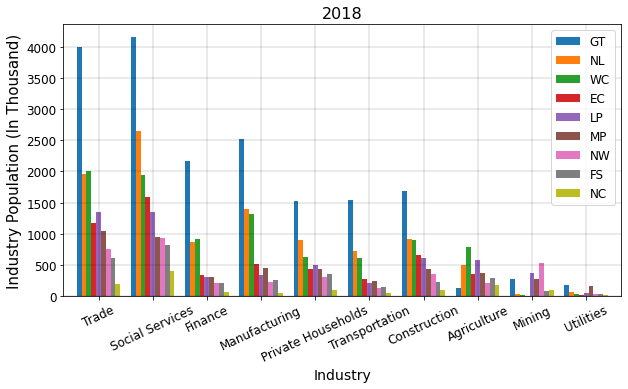

In [ ]:
industry = []
industry.append (['Trade',Trwc[0], Trec[0], Trfs[0], Trnw[0], Trgt[0], Trlm[0], Trmp[0], Trnl[0], Trnc[0]])
industry.append (['Social Services',Comwc[0], Comec[0], Comfs[0], Comnw[0], Comgt[0], Comlm[0], Commp[0], Comnl[0], Comnc[0]])
industry.append (['Finance',Fwc[0], Fec[0], Ffs[0], Fnw[0], Fgt[0], Flm[0], Fmp[0], Fnl[0], Fnc[0]])
industry.append (['Manufacturing',Mawc[0], Maec[0], Mafs[0], Manw[0], Magt[0], Malm[0], Mamp[0], Manl[0], Manc[0]])
industry.append (['Private Households',pwc[0], pec[0], pfs[0], pnw[0], pgt[0], plm[0], pmp[0], pnl[0], pnc[0]])
industry.append (['Transportation',Twc[0], Tec[0], Tfs[0], Tnw[0], Tgt[0], Tlm[0], Tmp[0], Tnl[0], Tnc[0]])
industry.append (['Construction',Cowc[0], Coec[0], Cofs[0], Conw[0], Cogt[0], Colm[0], Comp[0], Conl[0], Conc[0]])
industry.append (['Agriculture',Awc[0], Aec[0], Afs[0], Anw[0], Agt[0], Alm[0], Amp[0], Anl[0], Anc[0]])
industry.append (['Mining',Miwc[0], Miec[0], Mifs[0], Minw[0], Migt[0], Milm[0], Mimp[0], Minl[0], Minc[0]])
industry.append (['Utilities',Uwc[0], Uec[0], Ufs[0], Unw[0], Ugt[0], Ulm[0], Ump[0], Unl[0], Unc[0]])


df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2018', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'])
plt.ylabel ('Industry Population (In Thousand)', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

In [ ]:
# Finding the Relative Population
l = len (Agr)
for i in range (0, l):
    Awc[i] /= Agr[i]
    Aec[i] /= Agr[i]
    Anc[i] /= Agr[i]
    Afs[i] /= Agr[i]
    Anl[i] /= Agr[i]
    Anw[i] /= Agr[i]
    Agt[i] /= Agr[i]
    Amp[i] /= Agr[i]
    Alm[i] /= Agr[i]

    Miwc[i] /= Mi[i]
    Miec[i] /= Mi[i]
    Minc[i] /= Mi[i]
    Mifs[i] /= Mi[i]
    Minl[i] /= Mi[i]
    Minw[i] /= Mi[i]
    Migt[i] /= Mi[i]
    Mimp[i] /= Mi[i]
    Milm[i] /= Mi[i]

    Mawc[i] /= Ma[i]
    Maec[i] /= Ma[i]
    Manc[i] /= Ma[i]
    Mafs[i] /= Ma[i]
    Manl[i] /= Ma[i]
    Manw[i] /= Ma[i]
    Magt[i] /= Ma[i]
    Mamp[i] /= Ma[i]
    Malm[i] /= Ma[i]

    Uwc[i] /= Ut[i]
    Uec[i] /= Ut[i]
    Unc[i] /= Ut[i]
    Ufs[i] /= Ut[i]
    Unl[i] /= Ut[i]
    Unw[i] /= Ut[i]
    Ugt[i] /= Ut[i]
    Ump[i] /= Ut[i]
    Ulm[i] /= Ut[i]

    Cowc[i] /= Co[i]
    Coec[i] /= Co[i]
    Conc[i] /= Co[i]
    Cofs[i] /= Co[i]
    Conl[i] /= Co[i]
    Conw[i] /= Co[i]
    Cogt[i] /= Co[i]
    Comp[i] /= Co[i]
    Colm[i] /= Co[i]

    Trwc[i] /= Tr[i]
    Trec[i] /= Tr[i]
    Trnc[i] /= Tr[i]
    Trfs[i] /= Tr[i]
    Trnl[i] /= Tr[i]
    Trnw[i] /= Tr[i]
    Trgt[i] /= Tr[i]
    Trmp[i] /= Tr[i]
    Trlm[i] /= Tr[i]

    Twc[i] /= T[i]
    Tec[i] /= T[i]
    Tnc[i] /= T[i]
    Tfs[i] /= T[i]
    Tnl[i] /= T[i]
    Tnw[i] /= T[i]
    Tgt[i] /= T[i]
    Tmp[i] /= T[i]
    Tlm[i] /= T[i]

    Fwc[i] /= F[i]
    Fec[i] /= F[i]
    Fnc[i] /= F[i]
    Ffs[i] /= F[i]
    Fnl[i] /= F[i]
    Fnw[i] /= F[i]
    Fgt[i] /= F[i]
    Fmp[i] /= F[i]
    Flm[i] /= F[i]

    Comwc[i] /= Com[i]
    Comec[i] /= Com[i]
    Comnc[i] /= Com[i]
    Comfs[i] /= Com[i]
    Comnl[i] /= Com[i]
    Comnw[i] /= Com[i]
    Comgt[i] /= Com[i]
    Commp[i] /= Com[i]
    Comlm[i] /= Com[i]

    pwc[i] /= p[i]
    pec[i] /= p[i]
    pnc[i] /= p[i]
    pfs[i] /= p[i]
    pnl[i] /= p[i]
    pnw[i] /= p[i]
    pgt[i] /= p[i]
    pmp[i] /= p[i]
    plm[i] /= p[i]

Text(0.5, 0, 'Industry')

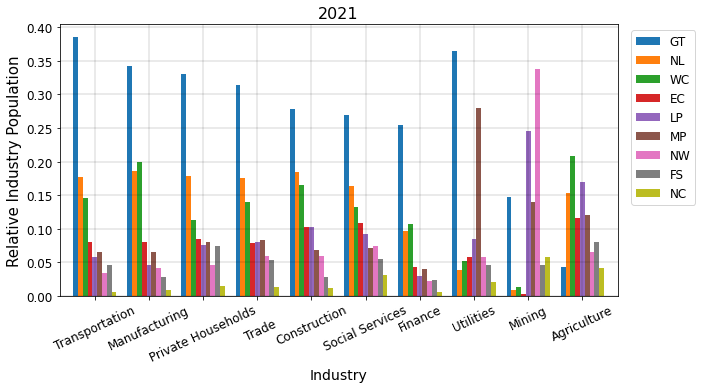

In [ ]:
industry = []
industry.append (['Transportation',Twc[3], Tec[3], Tfs[3], Tnw[3], Tgt[3], Tlm[3], Tmp[3], Tnl[3], Tnc[3]])
industry.append (['Manufacturing',Mawc[3], Maec[3], Mafs[3], Manw[3], Magt[3], Malm[3], Mamp[3], Manl[3], Manc[3]])
industry.append (['Private Households',pwc[3], pec[3], pfs[3], pnw[3], pgt[3], plm[3], pmp[3], pnl[3], pnc[3]])
industry.append (['\nTrade',Trwc[3], Trec[3], Trfs[3], Trnw[3], Trgt[3], Trlm[3], Trmp[3], Trnl[3], Trnc[3]])
industry.append (['Construction',Cowc[3], Coec[3], Cofs[3], Conw[3], Cogt[3], Colm[3], Comp[3], Conl[3], Conc[3]])
industry.append (['Social Services',Comwc[3], Comec[3], Comfs[3], Comnw[3], Comgt[3], Comlm[3], Commp[3], Comnl[3], Comnc[3]])
industry.append (['Finance',Fwc[3], Fec[3], Ffs[3], Fnw[3], Fgt[3], Flm[3], Fmp[3], Fnl[3], Fnc[3]])
industry.append (['Utilities',Uwc[3], Uec[3], Ufs[3], Unw[3], Ugt[3], Ulm[3], Ump[3], Unl[3], Unc[3]])
industry.append (['Mining',Miwc[3], Miec[3], Mifs[3], Minw[3], Migt[3], Milm[3], Mimp[3], Minl[3], Minc[3]])
industry.append (['Agriculture',Awc[3], Aec[3], Afs[3], Anw[3], Agt[3], Alm[3], Amp[3], Anl[3], Anc[3]])

df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2021', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ylabel ('Relative Industry Population', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

Text(0.5, 0, 'Industry')

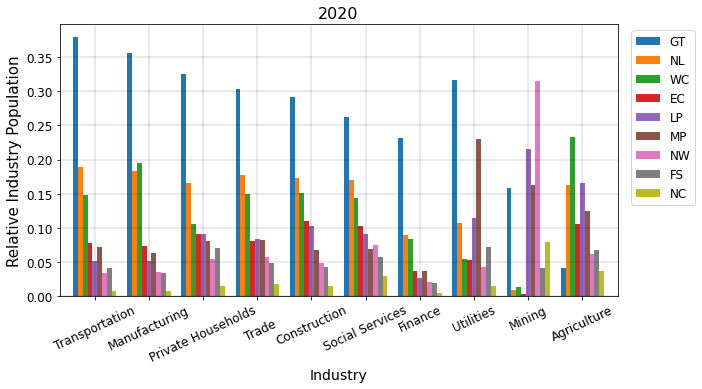

In [ ]:
industry = []
industry.append (['Transportation',Twc[2], Tec[2], Tfs[2], Tnw[2], Tgt[2], Tlm[2], Tmp[2], Tnl[2], Tnc[2]])
industry.append (['Manufacturing',Mawc[2], Maec[2], Mafs[2], Manw[2], Magt[2], Malm[2], Mamp[2], Manl[2], Manc[2]])
industry.append (['Private Households',pwc[2], pec[2], pfs[2], pnw[2], pgt[2], plm[2], pmp[2], pnl[2], pnc[2]])
industry.append (['\nTrade',Trwc[2], Trec[2], Trfs[2], Trnw[2], Trgt[2], Trlm[2], Trmp[2], Trnl[2], Trnc[2]])
industry.append (['Construction',Cowc[2], Coec[2], Cofs[2], Conw[2], Cogt[2], Colm[2], Comp[2], Conl[2], Conc[2]])
industry.append (['Social Services',Comwc[2], Comec[2], Comfs[2], Comnw[2], Comgt[2], Comlm[2], Commp[2], Comnl[2], Comnc[2]])
industry.append (['Finance',Fwc[2], Fec[2], Ffs[2], Fnw[2], Fgt[2], Flm[2], Fmp[2], Fnl[2], Fnc[2]])
industry.append (['Utilities',Uwc[2], Uec[2], Ufs[2], Unw[2], Ugt[2], Ulm[2], Ump[2], Unl[2], Unc[2]])
industry.append (['Mining',Miwc[2], Miec[2], Mifs[2], Minw[2], Migt[2], Milm[2], Mimp[2], Minl[2], Minc[2]])
industry.append (['Agriculture',Awc[2], Aec[2], Afs[2], Anw[2], Agt[2], Alm[2], Amp[2], Anl[2], Anc[2]])

df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2020', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ylabel ('Relative Industry Population', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

Text(0.5, 0, 'Industry')

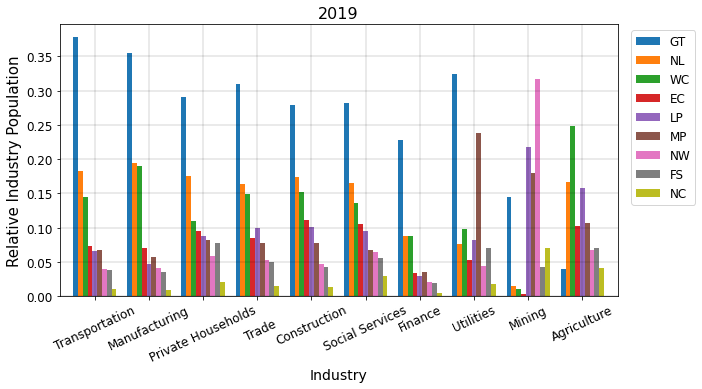

In [ ]:
industry = []
industry.append (['Transportation',Twc[1], Tec[1], Tfs[1], Tnw[1], Tgt[1], Tlm[1], Tmp[1], Tnl[1], Tnc[1]])
industry.append (['Manufacturing',Mawc[1], Maec[1], Mafs[1], Manw[1], Magt[1], Malm[1], Mamp[1], Manl[1], Manc[1]])
industry.append (['Private Households',pwc[1], pec[1], pfs[1], pnw[1], pgt[1], plm[1], pmp[1], pnl[1], pnc[1]])
industry.append (['\nTrade',Trwc[1], Trec[1], Trfs[1], Trnw[1], Trgt[1], Trlm[1], Trmp[1], Trnl[1], Trnc[1]])
industry.append (['Construction',Cowc[1], Coec[1], Cofs[1], Conw[1], Cogt[1], Colm[1], Comp[1], Conl[1], Conc[1]])
industry.append (['Social Services',Comwc[1], Comec[1], Comfs[1], Comnw[1], Comgt[1], Comlm[1], Commp[1], Comnl[1], Comnc[1]])
industry.append (['Finance',Fwc[1], Fec[1], Ffs[1], Fnw[1], Fgt[1], Flm[1], Fmp[1], Fnl[1], Fnc[1]])
industry.append (['Utilities',Uwc[1], Uec[1], Ufs[1], Unw[1], Ugt[1], Ulm[1], Ump[1], Unl[1], Unc[1]])
industry.append (['Mining',Miwc[1], Miec[1], Mifs[1], Minw[1], Migt[1], Milm[1], Mimp[1], Minl[1], Minc[1]])
industry.append (['Agriculture',Awc[1], Aec[1], Afs[1], Anw[1], Agt[1], Alm[1], Amp[1], Anl[1], Anc[1]])

df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2019', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ylabel ('Relative Industry Population', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

Text(0.5, 0, 'Industry')

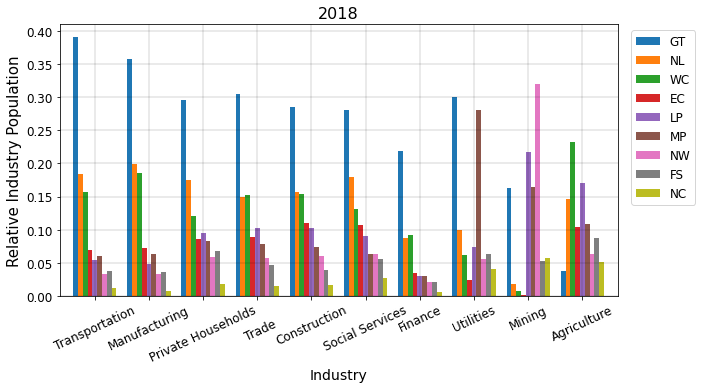

In [ ]:
industry = []
industry.append (['Transportation',Twc[0], Tec[0], Tfs[0], Tnw[0], Tgt[0], Tlm[0], Tmp[0], Tnl[0], Tnc[0]])
industry.append (['Manufacturing',Mawc[0], Maec[0], Mafs[0], Manw[0], Magt[0], Malm[0], Mamp[0], Manl[0], Manc[0]])
industry.append (['Private Households',pwc[0], pec[0], pfs[0], pnw[0], pgt[0], plm[0], pmp[0], pnl[0], pnc[0]])
industry.append (['\nTrade',Trwc[0], Trec[0], Trfs[0], Trnw[0], Trgt[0], Trlm[0], Trmp[0], Trnl[0], Trnc[0]])
industry.append (['Construction',Cowc[0], Coec[0], Cofs[0], Conw[0], Cogt[0], Colm[0], Comp[0], Conl[0], Conc[0]])
industry.append (['Social Services',Comwc[0], Comec[0], Comfs[0], Comnw[0], Comgt[0], Comlm[0], Commp[0], Comnl[0], Comnc[0]])
industry.append (['Finance',Fwc[0], Fec[0], Ffs[0], Fnw[0], Fgt[0], Flm[0], Fmp[0], Fnl[0], Fnc[0]])
industry.append (['Utilities',Uwc[0], Uec[0], Ufs[0], Unw[0], Ugt[0], Ulm[0], Ump[0], Unl[0], Unc[0]])
industry.append (['Mining',Miwc[0], Miec[0], Mifs[0], Minw[0], Migt[0], Milm[0], Mimp[0], Minl[0], Minc[0]])
industry.append (['Agriculture',Awc[0], Aec[0], Afs[0], Anw[0], Agt[0], Alm[0], Amp[0], Anl[0], Anc[0]])

df1 = pd.DataFrame (industry, columns = ['industry','WC', 'EC', 'FS', 'NW', 'GT', 'LP', 'MP', 'NL', 'NC'])
df1.plot (x='industry', y=['GT','NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], kind='bar', width=0.8, figsize=(10, 5))
plt.title ('2018', fontsize= 16)
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=25)
plt.legend (['GT', 'NL', 'WC','EC', 'LP', 'MP', 'NW', 'FS', 'NC'], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.ylabel ('Relative Industry Population', {'fontsize': 15})
plt.xlabel ('Industry', {'fontsize': 14})

# Correlation Checking for Sentiment Scores

In [ ]:
file_path2 = file_path + '/dataset2.csv'

In [ ]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
# Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2019.pdf, ..., https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2010.pdf

unemp2 = {'2010-Q3':36.4, '2010-Q4':35.8, '2011-Q1':36.5,  '2011-Q2':36.9, '2011-Q3':36,   '2011-Q4':35.4, '2012-Q1':36.6, '2012-Q2':36.2 , '2012-Q3':36.3, '2012-Q4':35.9, '2013-Q1':36.7, '2013-Q2':36.8, '2013-Q3':35.6, '2013-Q4':34   , '2014-Q1':35.1 , '2014-Q2':35.6 , '2014-Q3':35.8 , '2014-Q4':34.6 , '2015-Q1':36.1 , '2015-Q2':34.9 , '2015-Q3':34.4 , '2015-Q4':33.8 , '2016-Q1':36.30, '2016-Q2':36.4 , '2016-Q3':36.3 , '2016-Q4':35.6 , '2017-Q1':36.4 , '2017-Q2':36.6 , '2017-Q3':36.8 , '2017-Q4':36.3 , '2018-Q1':36.7 , '2018-Q2':37.20, '2018-Q3':37.3 , '2018-Q4':37   , '2019-Q1':38   , '2019-Q2':38.5 , '2019-Q3':38.5 , '2019-Q4':38.7 , '2020-Q1':39.70, '2020-Q2':42   , '2020-Q3':43.1 , '2020-Q4':42.60, '2021-Q1':43.20, '2021-Q2':44.4, '2021-Q3':46.6}

In [ ]:
GMI3 = {'2020-02': 41.36257465038207,
        '2020-03': 43.03129924522272,
        '2020-04': 49.447095903712224,
        '2020-05': 46.95102829143444,
        '2020-06': 45.25585761267374,
        '2020-07': 44.950970380872995,
        '2020-08': 44.23185825313509,
        '2020-09': 43.80851703091271,
        '2020-10': 43.70847044692002,
        '2020-11': 43.472640114870856,
        '2020-12': 42.92557316082869,
        '2021-01': 45.28911909707539,
        '2021-02': 44.205145877621135,
        '2021-03': 43.41750527251331,
        '2021-04': 43.061822919174496,
        '2021-05': 42.211703648845855,
        '2021-06': 42.22303352400544,
        '2021-07': 43.09508440357614,
        '2021-08': 41.797537004194865,
        '2021-09': 40.938214030651764,
        '2021-10': 40.27543089663784,
        '2021-11': 40.21680097711024,
        '2021-12': 38.973514650794
        }

In [ ]:
df['Date'] = pd.to_datetime (df['Date'])
df = df.sort_values(by="Date")

In [ ]:
scores = df.groupby('Date')['Score'].sum().to_dict()

In [ ]:
all_dates = list (scores.keys())

In [ ]:
mark_date = pd.to_datetime ('2020-04')
desired_dates = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in all_dates]

In [ ]:
scores = pd.DataFrame(data={'Date':list(scores.keys()), 'Score':list(scores.values())})

In [ ]:
scores['DesiredDates'] = desired_dates

In [ ]:
scores = scores.groupby('DesiredDates')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])

In [ ]:
val = [x/mx for x in list(scores.values())]

In [ ]:
scores.update(zip(scores, val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


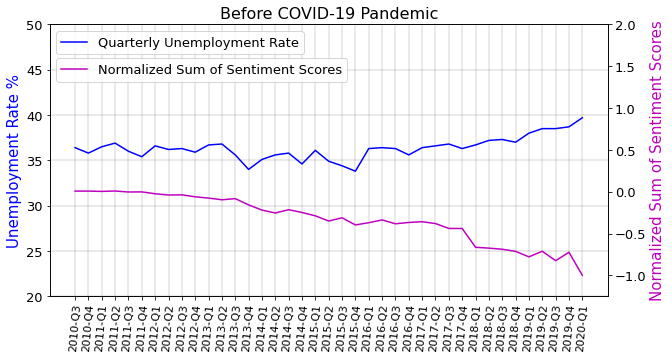

In [ ]:
f = plt.figure (figsize=(10,5))
plt.title ('Before COVID-19 Pandemic', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(20, 50, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.plot (list(unemp2.keys())[:39], list(unemp2.values())[:39], 'b')
ax2.plot (list(unemp2.keys())[:39], list(scores.values())[1:40], 'm')
ax1.set_xticklabels(list(unemp2.keys())[:39], fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='b')
ax2.set_ylabel ('Normalized Sum of Sentiment Scores', {'fontsize': 15}, color = 'm')
ax2.set_ylim (-1.25, 2)
ax1.legend (['Quarterly Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Normalized Sum of Sentiment Scores'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
stats.pearsonr (list(unemp2.values())[0:39], list(scores.values())[1:40])

(-0.6012261407624677, 5.1734347560324735e-05)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


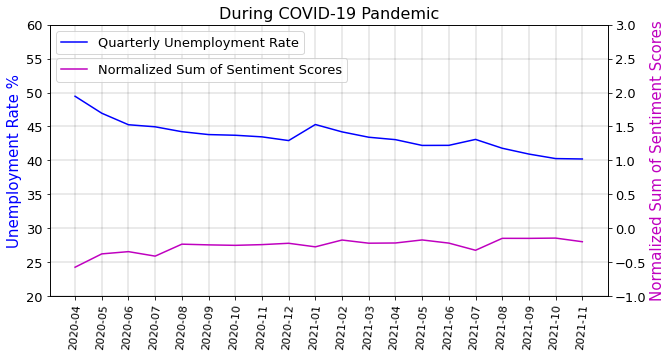

In [ ]:
f = plt.figure (figsize=(10,5))
plt.title ('During COVID-19 Pandemic', fontsize= 16)
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
ax1.set_ylim(20, 60, {'fontsize': 11})
ax2 = ax1.twinx ()
ax1.plot (list(GMI3.keys())[2:-1], list(GMI3.values())[2:-1], 'b')
ax2.plot (list(GMI3.keys())[2:-1], list(scores.values())[40:-1], 'm')
ax1.set_xticklabels(list(GMI3.keys())[2:-1], fontsize= 11, rotation=85)#'vertical')
ax1.set_ylabel ('Unemployment Rate %', {'fontsize': 15}, color='b')
ax2.set_ylabel ('Normalized Sum of Sentiment Scores', {'fontsize': 15}, color = 'm')
ax2.set_ylim (-1, 3)
ax1.legend (['Quarterly Unemployment Rate'], loc='upper left', fontsize= 13)#, 'Error=10%', 'Error=5%'])
ax2.legend (['Normalized Sum of Sentiment Scores'], loc='upper left', bbox_to_anchor=(0, 0.9), fontsize= 13)
#plt.show()

In [ ]:
stats.pearsonr (list(GMI3.values())[2:-1], list(scores.values())[40:-1])

(-0.8681689157097873, 7.010090283991678e-07)

# Estimating Unemployment Rate

In [ ]:
file_path2 = file_path + '/dataset2.csv'

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(file_path2, sep=',', encoding='utf-8')

In [ ]:
txt = list (df['CleanedText'])
txt = [str(x).lower() for x in txt]
df['TextToLower'] = txt

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")

In [ ]:
all_dates = list (df['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates)]

100%|██████████| 1182632/1182632 [02:38<00:00, 7466.68it/s]  


In [ ]:
df['DesiredDate'] = desired_dates

**Building the data for each keyword**

In [ ]:
keywords = {
    'LostJob': 'lost his job|lost her job|lost my job|lost their jobs',
    'Employed': 'employed',
    'Unemployed':'unemployed',
    'Retrench':'retrench|retrenched|retrenches|retrenching|retrenchment|retrenchments',
    'Jobless': 'jobless',
    'Debt': 'debt',
    'Bankruptcy':'bankrupt|bankruptcy',
    'Loan': 'loan',
    'Famine': 'famine',
    'Broke': 'be broke|being broke|am broke|are broke|is broke|',
    'Career': 'career',
    'Hire': 'hire|hired|hires',
    'Money': 'money',
    'Buy': 'buy',
    'Rent': 'rent',
    'Lend': 'lend',
    'Poverty': 'poverty',
    'Payment': 'payment',
    'Afford': 'afford',
    'Canned': 'canned',
}

In [ ]:
df1 = df.groupby('DesiredDate')['TextToLower'].count()
df1 = pd.DataFrame({'DesiredDate':df1.index.tolist(), 'TextToLower':df1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(df1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 2368.79it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    df2 = df[df['TextToLower'].str.contains(keywords[k], na=False)]
    df3 = df2.groupby('DesiredDate')['TextToLower'].count()
    for item in df3.index.to_list()[1:-1]:
        keyword_dates [k][item] += df3 [item]

100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


In [ ]:
N = df.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 139/139 [00:00<00:00, 4572.33it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

**Actual Data**

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

**Building the data for the whole dataset**

In [ ]:
df1 = df.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = df1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data['TotalDataset'] = d

**Building the data for sentiment scores**

In [ ]:
scores = df.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

**And Finally Building the Labels**

In [ ]:
# Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf, https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2019.pdf, ..., https://www.statssa.gov.za/publications/P0211/P02113rdQuarter2010.pdf

unemp2 = {'2010-Q3':36.4, '2010-Q4':35.8, '2011-Q1':36.5,  '2011-Q2':36.9, '2011-Q3':36,   '2011-Q4':35.4, '2012-Q1':36.6, '2012-Q2':36.2 , '2012-Q3':36.3, '2012-Q4':35.9, '2013-Q1':36.7, '2013-Q2':36.8, '2013-Q3':35.6, '2013-Q4':34   , '2014-Q1':35.1 , '2014-Q2':35.6 , '2014-Q3':35.8 , '2014-Q4':34.6 , '2015-Q1':36.1 , '2015-Q2':34.9 , '2015-Q3':34.4 , '2015-Q4':33.8 , '2016-Q1':36.30, '2016-Q2':36.4 , '2016-Q3':36.3 , '2016-Q4':35.6 , '2017-Q1':36.4 , '2017-Q2':36.6 , '2017-Q3':36.8 , '2017-Q4':36.3 , '2018-Q1':36.7 , '2018-Q2':37.20, '2018-Q3':37.3 , '2018-Q4':37   , '2019-Q1':38   , '2019-Q2':38.5 , '2019-Q3':38.5 , '2019-Q4':38.7 , '2020-Q1':39.70}


In [ ]:
GMI3 = {'2020-04': 49.447095903712224,
        '2020-05': 46.95102829143444,
        '2020-06': 45.25585761267374,
        '2020-07': 44.950970380872995,
        '2020-08': 44.23185825313509,
        '2020-09': 43.80851703091271,
        '2020-10': 43.70847044692002,
        '2020-11': 43.472640114870856,
        '2020-12': 42.92557316082869,
        '2021-01': 45.28911909707539,
        '2021-02': 44.205145877621135,
        '2021-03': 43.41750527251331,
        '2021-04': 43.061822919174496,
        '2021-05': 42.211703648845855,
        '2021-06': 42.22303352400544,
        '2021-07': 43.09508440357614,
        '2021-08': 41.797537004194865,
        '2021-09': 40.938214030651764,
        '2021-10': 40.27543089663784,
        '2021-11': 40.21680097711024,
        }

In [ ]:
unemployment = dict(unemp2)
unemployment.update (GMI3.items())

In [ ]:
data['Unemployment'] = list (unemployment.values())

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.000000,9.000000,5.666667,0.666667,0.000000,7.333333,2.000000,4.000000,0.000000,411.333333,...,141.333333,16.333333,5.000000,7.333333,7.333333,18.333333,1.333333,411.333333,1.000899,36.4
1,0.000000,4.333333,2.666667,1.666667,0.666667,6.666667,1.666667,3.333333,0.333333,342.333333,...,125.000000,10.666667,3.666667,7.000000,5.000000,9.333333,1.666667,342.333333,1.001180,35.8
2,0.000000,2.666667,2.000000,0.333333,1.333333,3.333333,1.000000,3.666667,0.333333,229.000000,...,74.000000,8.666667,3.333333,6.666667,3.000000,10.000000,0.333333,229.000000,1.004565,36.5
3,0.333333,9.333333,6.000000,0.666667,2.000000,11.666667,3.333333,11.000000,2.000000,729.000000,...,259.000000,21.666667,5.333333,18.000000,10.333333,28.666667,1.333333,729.000000,1.000000,36.9
4,0.000000,18.333333,11.666667,4.000000,2.666667,20.000000,4.000000,26.666667,11.000000,984.666667,...,314.000000,27.333333,10.000000,51.333333,9.666667,38.666667,3.666667,984.666667,1.011610,36.0


**Correlation and P-Values of the Unemployment Rate and Concatenated Dataset**

In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.7226732289792549, 1.0320621704748718e-10)

**Continue Building the PCR Model**
**Separating the Labels**

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
# Scaling the Data
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

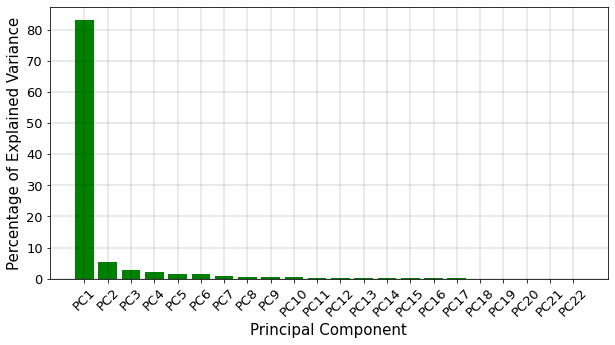

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.507737
1                                  2  1.079809
2                                  3  1.121257
3                                  4  0.962343
4                                  5  0.959872
5                                  6  0.989363
6                                  7  0.974392
7                                  8  1.063704
8                                  9  1.090591
9                                 10  1.085017
10                                11  1.157328
11                                12  1.233482
12                                13  0.987370
13                                14  1.050691
14                                15  1.168120
15                                16  1.326680
16                                17  1.434619
17                                18  1.196385
18                                19  1.330120
19                                20  1.340291
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


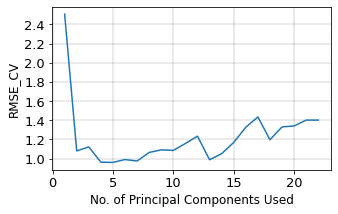

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:7]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

0.9214444523358419

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.017706207960037027

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.9288374980121152

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.017827829356894618

RMSE =  0.921
MAPE =  0.018
R-squared =  0.929
SMAPE =  0.018


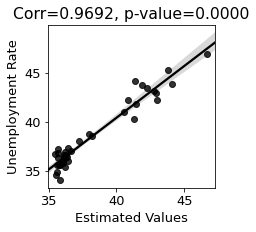

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

In [ ]:
train_x = x[21:36,:]
train_y = y[21:36]
test_x = x[36:,:]
test_y = y[36:]

In [ ]:
model = LinearRegression()
model.fit (train_x, train_y)

LinearRegression()

In [ ]:
output = model.predict (test_x)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(test_y)[i]) * (output[i] - list(test_y)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.7772594041232619

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs(output[i] - list(test_y)[i]) / list(test_y)[i]
mape = mape / l
mape

0.03655991274516965

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (test_y, output)
r2

0.5076562190369297

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(test_y)[i] - output[i])
    denom = (abs(output[i]) + abs(list(test_y)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.036976832038218374

In [ ]:
preds = [*lbls[21:36], *output]

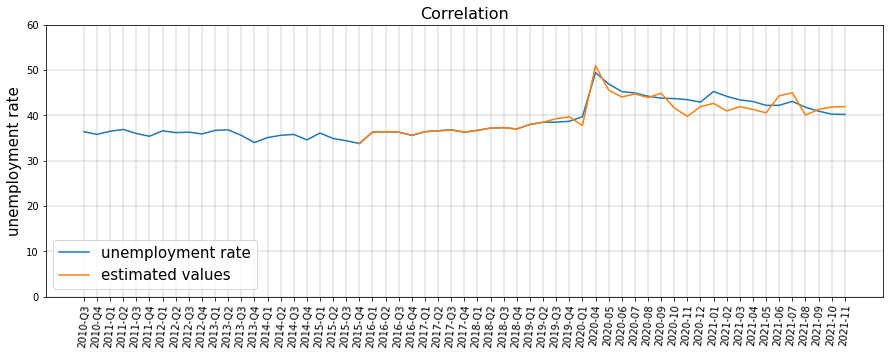

In [ ]:
#date = ['2016-01 to 03', '2016-04 to 06', '2016-07 to 09', '2016-10 to 12', '2017-01 to 03', '2017-04 to 06', '2017-07 to 09', '2017-10 to 12', '2018-01 to 03', '2018-04 to 06', '2018-07 to 09', '2018-10 to 12', '2019-01 to 03', '2019-04 to 06', '2019-07 to 09', '2019-10 to 12', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08']
plt.figure (figsize=(15,5))
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.title('Correlation', fontsize=16)
plt.plot (list(unemployment.keys()), list(lbls))
plt.plot (list(unemployment.keys())[-len(preds):], preds)
plt.rcParams.update({'font.size': 12})
plt.ylim(0, 60)
plt.xticks(rotation= 85)#'vertical')
#plt.plot (list(d.keys()), list(d.values()))
plt.ylabel ('Unemployment rate',fontsize=15)
plt.legend (['Unemployment rate', 'Estimated values'],loc='lower left', fontsize=15)
plt.show()

RMSE =  1.772
MAPE =  0.036
R-squared =  0.507
SMAPE =  0.036


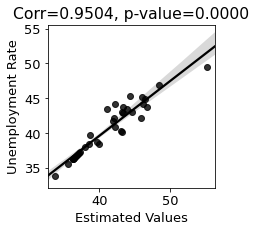

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':preds, 'Unemployment Rate':list(unemployment.values())[-len(preds):]})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(preds, list(unemployment.values())[-len(preds):])
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Nowcasting for Each Province**

**Bulding Unemployment Rate for each Province**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib.request as URL
import csv
import codecs
import re
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
#import matplotlib.dates as mdates
from matplotlib import gridspec
import seaborn as sns
import math
from tqdm import tqdm

In [ ]:
# This will work while GMI is available at https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
# This may take several minutes

response = URL.urlopen ('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
rdr = csv.reader (codecs.iterdecode(response, 'utf-8'))
MI = {}
for line in tqdm(rdr):
    if line[1] == 'South Africa' and line[2] not in list(MI.keys()):
        MI[line[2]] = {}
        MI[line[2]][line[8]] = [line[9], line[10], line[11], line[12], line[13], line[14]]
    elif line[1] == 'South Africa' and line[2] in list(MI.keys()):
        MI[line[2]][line[8]] = [line[9], line[10], line[11], line[12], line[13], line[14]]

11142506it [02:31, 73663.55it/s]


In [ ]:
GMI = {}
for k in MI.keys():
  GMI[k] = {}
  for q in list(MI[k].keys())[:660]:
    mi = [float(x) if x != '' else 0 for x in MI[k][q]]
    avg = -sum(mi)/5
    dt = str(q)[0:7]
    if dt not in list(GMI[k].keys()):
      GMI[k][dt] = avg
    else:
      GMI[k][dt] += avg

In [ ]:
GMI.keys()

dict_keys(['', 'Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape'])

In [ ]:
# Source: http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2021.pdf , http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2020.pdf , ..., http://www.statssa.gov.za/publications/P0211/P02113rdQuarter2010.pdf

unemp2 = {'2010-Q3':36.4, '2010-Q4':35.8, '2011-Q1':36.5,  '2011-Q2':36.9, '2011-Q3':36,   '2011-Q4':35.4, '2012-Q1':36.6, '2012-Q2':36.2 , '2012-Q3':36.3, '2012-Q4':35.9, '2013-Q1':36.7, '2013-Q2':36.8, '2013-Q3':35.6, '2013-Q4':34   , '2014-Q1':35.1 , '2014-Q2':35.6 , '2014-Q3':35.8 , '2014-Q4':34.6 , '2015-Q1':36.1 , '2015-Q2':34.9 , '2015-Q3':34.4 , '2015-Q4':33.8 , '2016-Q1':36.30, '2016-Q2':36.4 , '2016-Q3':36.3 , '2016-Q4':35.6 , '2017-Q1':36.4 , '2017-Q2':36.6 , '2017-Q3':36.8 , '2017-Q4':36.3 , '2018-Q1':36.7 , '2018-Q2':37.20, '2018-Q3':37.3 , '2018-Q4':37   , '2019-Q1':38   , '2019-Q2':38.5 , '2019-Q3':38.5 , '2019-Q4':38.7 , '2020-Q1':39.70, '2020-Q2':42   , '2020-Q3':43.1 , '2020-Q4':42.60, '2021-Q1':43.20, '2021-Q2':44.4, '2021-Q3':46.6}
wc2 = {'2010-Q3':25.5, '2010-Q4':24,      '2011-Q1':23.8, '2011-Q2':23.6, '2011-Q3':25, '2011-Q4':24.3, '2012-Q1':25  , '2012-Q2':25  , '2012-Q3':26.9, '2012-Q4':25.6, '2013-Q1':26.7, '2013-Q2':26.7, '2013-Q3':25.7,   '2013-Q4':22.1  , '2014-Q1':22.6, '2014-Q2':25.4, '2014-Q3':25.5, '2014-Q4':24.5, '2015-Q1':23.3  , '2015-Q2':24.1, '2015-Q3':23.1, '2015-Q4':22  , '2016-Q1':23  , '2016-Q2':24.8, '2016-Q3':24.8, '2016-Q4':23.6, '2017-Q1':24.7, '2017-Q2':24.6, '2017-Q3':25.2, '2017-Q4':23  , '2018-Q1':22.5, '2018-Q2':23.2, '2018-Q3':23.7, '2018-Q4':23.1, '2019-Q1':22.7, '2019-Q2':24.5, '2019-Q3':24.5, '2019-Q4':24.1, '2020-Q1':24.8, '2020-Q2':27.3, '2020-Q3':29.1, '2020-Q4':26.8, '2021-Q1':27.9, '2021-Q2':29.1, '2021-Q3':30.3}
ec2 = {'2010-Q3':40.4, '2010-Q4':40,      '2011-Q1':41, '2011-Q2':42.6, '2011-Q3':41.9, '2011-Q4':40.9, '2012-Q1':42.4, '2012-Q2':42.4, '2012-Q3':43  , '2012-Q4':46.1, '2013-Q1':45.2, '2013-Q2':45.2, '2013-Q3':44.3, '2013-Q4':43.3, '2014-Q1':44.2, '2014-Q2':44.4, '2014-Q3':43  , '2014-Q4':41.9, '2015-Q1':43.2, '2015-Q2':42.5, '2015-Q3':42.5, '2015-Q4':40.3, '2016-Q1':44.6, '2016-Q2':43.8, '2016-Q3':41.3, '2016-Q4':41.3, '2017-Q1':43.6, '2017-Q2':44.5, '2017-Q3':45.3, '2017-Q4':44.8, '2018-Q1':46  , '2018-Q2':45.8, '2018-Q3':46  , '2018-Q4':46.8, '2019-Q1':48.3, '2019-Q2':46.5, '2019-Q3':46.5, '2019-Q4':47.7, '2020-Q1':48.9, '2020-Q2':52.8, '2020-Q3':51.2, '2020-Q4':51.2, '2021-Q1':52.4, '2021-Q2':49.6, '2021-Q3':53  }
nc2 = {'2010-Q3':36,   '2010-Q4':34.4, '2011-Q1':40.7, '2011-Q2':37.3, '2011-Q3':36.1, '2011-Q4':35, '2012-Q1':33.8, '2012-Q2':37.1, '2012-Q3':37.2  , '2012-Q4':35, '2013-Q1':35.8, '2013-Q2':35.9, '2013-Q3':36.3,       '2013-Q4':34.8, '2014-Q1':39.8  , '2014-Q2':41.7, '2014-Q3':39.5, '2014-Q4':38.4, '2015-Q1':42.6, '2015-Q2':41.1, '2015-Q3':42.4, '2015-Q4':38.9, '2016-Q1':38.7, '2016-Q2':39.8, '2016-Q3':41.8, '2016-Q4':43.3  , '2017-Q1':43.9, '2017-Q2':45.3, '2017-Q3':43.1, '2017-Q4':40.5, '2018-Q1':41  , '2018-Q2':42.4, '2018-Q3':40.1  , '2018-Q4':38.6  , '2019-Q1':41.5  , '2019-Q2':44.8, '2019-Q3':43  , '2019-Q4':39.2, '2020-Q1':40, '2020-Q2':45.1, '2020-Q3':63  , '2020-Q4':41.8, '2021-Q1':42.2, '2021-Q2':50.3, '2021-Q3':49.1}
fs2 = {'2010-Q3':37.5, '2010-Q4':35, '2011-Q1':36.2, '2011-Q2':37, '2011-Q3':34, '2011-Q4':37.1, '2012-Q1':38.9, '2012-Q2':39.6, '2012-Q3':39.7  , '2012-Q4':40.1, '2013-Q1':39.3, '2013-Q2':39.3, '2013-Q3':41.2,     '2013-Q4':40.9  , '2014-Q1':41.5, '2014-Q2':41.2  , '2014-Q3':40.9, '2014-Q4':39.5, '2015-Q1':38.4, '2015-Q2':38.9, '2015-Q3':37.7, '2015-Q4':36.3, '2016-Q1':39.4, '2016-Q2':38.1, '2016-Q3':40.4, '2016-Q4':40.9, '2017-Q1':41.7, '2017-Q2':40.5, '2017-Q3':38.5, '2017-Q4':39  , '2018-Q1':39  , '2018-Q2':40.1, '2018-Q3':41.5, '2018-Q4':39.3, '2019-Q1':40.1, '2019-Q2':41.6, '2019-Q3':42.5, '2019-Q4':42.3  , '2020-Q1':44.5, '2020-Q2':41.2, '2020-Q3':42.6, '2020-Q4':39.9, '2021-Q1':43.4, '2021-Q2':45.2, '2021-Q3':45.8}
nl2 = {'2010-Q3':38.7, '2010-Q4':38.3, '2011-Q1':39, '2011-Q2':39.1, '2011-Q3':37.6, '2011-Q4':36.6, '2012-Q1':39.3, '2012-Q2':38.5, '2012-Q3':39.5, '2012-Q4':39.1, '2013-Q1':38.8, '2013-Q2':39.9, '2013-Q3':37.6, '2013-Q4':36.2, '2014-Q1':37.4, '2014-Q2':39.7, '2014-Q3':40.8, '2014-Q4':37.9, '2015-Q1':38.2, '2015-Q2':36.3, '2015-Q3':35.6, '2015-Q4':36.8, '2016-Q1':38.8, '2016-Q2':39.7, '2016-Q3':40.4, '2016-Q4':40.7, '2017-Q1':41  , '2017-Q2':40.4  , '2017-Q3':41  , '2017-Q4':41  , '2018-Q1':40.6, '2018-Q2':40.9, '2018-Q3':41.2  , '2018-Q4':41.3, '2019-Q1':42.4, '2019-Q2':42.1, '2019-Q3':41.4, '2019-Q4':41.9  , '2020-Q1':43  , '2020-Q2':46.2, '2020-Q3':47.5, '2020-Q4':46  , '2021-Q1':46.4, '2021-Q2':47.1, '2021-Q3':48.6}
nw2 = {'2010-Q3':42.5,   '2010-Q4':41.6, '2011-Q1':42.4, '2011-Q2':46.3, '2011-Q3':46.2, '2011-Q4':45  , '2012-Q1':45.5, '2012-Q2':45.1, '2012-Q3':45.5  , '2012-Q4':41.1, '2013-Q1':42.5, '2013-Q2':43.5, '2013-Q3':42.9,   '2013-Q4':42.2, '2014-Q1':42.6, '2014-Q2':42.3  , '2014-Q3':41.8, '2014-Q4':40  , '2015-Q1':43.2, '2015-Q2':40.1, '2015-Q3':40.7, '2015-Q4':38.9, '2016-Q1':43.1, '2016-Q2':42.6, '2016-Q3':44.6, '2016-Q4':40.9, '2017-Q1':41.7, '2017-Q2':42  , '2017-Q3':42.5, '2017-Q4':40.6, '2018-Q1':41.8, '2018-Q2':43.4, '2018-Q3':43.9  , '2018-Q4':42.9, '2019-Q1':44.4, '2019-Q2':46.6  , '2019-Q3':45.1, '2019-Q4':43  , '2020-Q1':45.1, '2020-Q2':46.3, '2020-Q3':46.5, '2020-Q4':46  , '2021-Q1':47.2, '2021-Q2':46.9, '2021-Q3':52.2}
gt2 = {'2010-Q3':31.9, '2010-Q4':31.8, '2011-Q1':31.8, '2011-Q2':31.9, '2011-Q3':31.6, '2011-Q4':29.9, '2012-Q1':30.3,'2012-Q2':29.8, '2012-Q3':29.2, '2012-Q4':28.8, '2013-Q1':30.4, '2013-Q2':30, '2013-Q3':29,     '2013-Q4':28.9, '2014-Q1':29.8, '2014-Q2':29  , '2014-Q3':29.6, '2014-Q4':29.6, '2015-Q1':32.8, '2015-Q2':31.3, '2015-Q3':31.4, '2015-Q4':30.2, '2016-Q1':33.3, '2016-Q2':33  , '2016-Q3':32.8, '2016-Q4':32.1, '2017-Q1':32  , '2017-Q2':32.9, '2017-Q3':33.3, '2017-Q4':33.7, '2018-Q1':33.6, '2018-Q2':34.4, '2018-Q3':34.3, '2018-Q4':33.6  , '2019-Q1':40.4, '2019-Q2':35  , '2019-Q3':35.1  , '2019-Q4':35.3, '2020-Q1':36.3, '2020-Q2':38.7, '2020-Q3':41  , '2020-Q4':41  , '2021-Q1':41.6, '2021-Q2':42.7, '2021-Q3':44.9  }
mp2 = {'2010-Q3':43.2, '2010-Q4':44.3, '2011-Q1':45.2, '2011-Q2':43.8, '2011-Q3':42.7, '2011-Q4':42.8, '2012-Q1':45.2, '2012-Q2':42.8, '2012-Q3':45.4, '2012-Q4':43.5, '2013-Q1':43.4, '2013-Q2':42.2, '2013-Q3':40.5, '2013-Q4':40.2, '2014-Q1':41.9, '2014-Q2':42.2, '2014-Q3':42  , '2014-Q4':40.5, '2015-Q1':40.7, '2015-Q2':39.1, '2015-Q3':39  , '2015-Q4':39.4, '2016-Q1':41.2, '2016-Q2':41  , '2016-Q3':41.4, '2016-Q4':42.1  , '2017-Q1':41.2, '2017-Q2':41.4, '2017-Q3':41.5, '2017-Q4':39.7, '2018-Q1':42.5, '2018-Q2':41.7, '2018-Q3':41.3, '2018-Q4':41.1  , '2019-Q1':43  , '2019-Q2':43.5, '2019-Q3':43.9, '2019-Q4':43.8, '2020-Q1':43.9, '2020-Q2':45.4, '2020-Q3':45.6, '2020-Q4':46.4  , '2021-Q1':47.6, '2021-Q2':46.5, '2021-Q3':49.7}
lm2 = {'2010-Q3':45.3, '2010-Q4':42.6, '2011-Q1':44.7, '2011-Q2':46, '2011-Q3':42.6, '2011-Q4':44.7, '2012-Q1':44.2, '2012-Q2':43.7, '2012-Q3':41.3, '2012-Q4':39.1, '2013-Q1':43.4, '2013-Q2':42.5, '2013-Q3':40.1, '2013-Q4':36.1, '2014-Q1':39.2, '2014-Q2':36.9, '2014-Q3':38.4, '2014-Q4':37.2, '2015-Q1':40.8, '2015-Q2':39  , '2015-Q3':36.6, '2015-Q4':38.6, '2016-Q1':38.5, '2016-Q2':38.6, '2016-Q3':36.3, '2016-Q4':34.1, '2017-Q1':38.2, '2017-Q2':37.1, '2017-Q3':35.8, '2017-Q4':36.8, '2018-Q1':37.6, '2018-Q2':37.4, '2018-Q3':38.1, '2018-Q4':38.8, '2019-Q1':43.1, '2019-Q2':41.1, '2019-Q3':41.9, '2019-Q4':44  , '2020-Q1':44.4, '2020-Q2':46.5, '2020-Q3':46.9, '2020-Q4':47.5, '2021-Q1':49.5, '2021-Q2':49.9, '2021-Q3':54.5}

In [ ]:
# Fitting for Eastern Cape
x = {}
y = {}
i = -7
for k in GMI['Eastern Cape']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Eastern Cape'][k]
        y[k] = list(ec2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Eastern Cape'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Eastern Cape'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(ec2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

ec = list(ec2.values())[0:39] + list(GMI3.values())[2:-1]


In [ ]:
# Fitting for Free State
x = {}
y = {}
i = -7
for k in GMI['Free State']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Free State'][k]
        y[k] = list(fs2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Free State'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Free State'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(fs2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

fs = list(fs2.values())[0:39] + list(GMI3.values())[2:-1]


In [ ]:
# Fitting for Gauteng
x = {}
y = {}
i = -7
for k in GMI['Gauteng']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Gauteng'][k]
        y[k] = list(gt2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Gauteng'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Gauteng'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(gt2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

gt = list(gt2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for KwaZulu-Natal
x = {}
y = {}
i = -7
for k in GMI['KwaZulu-Natal']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['KwaZulu-Natal'][k]
        y[k] = list(nl2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['KwaZulu-Natal'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['KwaZulu-Natal'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(nl2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

nl = list(nl2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Limpopo
x = {}
y = {}
i = -7
for k in GMI['Limpopo']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Limpopo'][k]
        y[k] = list(lm2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Limpopo'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Limpopo'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(lm2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

lm = list(lm2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Mpumalanga
x = {}
y = {}
i = -7
for k in GMI['Mpumalanga']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Mpumalanga'][k]
        y[k] = list(mp2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Mpumalanga'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Mpumalanga'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(mp2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

mp = list(mp2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Northern Cape
x = {}
y = {}
i = -7
for k in GMI['Northern Cape']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Northern Cape'][k]
        y[k] = list(nc2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Northern Cape'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Northern Cape'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(nc2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

nc = list(nc2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for North West
x = {}
y = {}
i = -7
for k in GMI['North West']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['North West'][k]
        y[k] = list(nw2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['North West'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['North West'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(nw2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

nw = list(nw2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
# Fitting for Western Cape
x = {}
y = {}
i = -7
for k in GMI['Western Cape']:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI['Western Cape'][k]
        y[k] = list(wc2.values())[i]
        i += 1

model = LinearRegression()
model.fit (np.reshape(list(x.values()), (-1,1)), list(y.values()))

GMI2 = {}
for k in GMI['Western Cape'].keys():
    GMI2[k] = abs(model.coef_[0]) * GMI['Western Cape'][k]

# I am writing this optimization problem to find the offset for the Linear Regression model
x = {}
y = {}
i = -7
for k in GMI2:
    if pd.to_datetime(k) <= pd.to_datetime('2021-11') and (k[-1]=='3' or k[-1]=='6' or k[-1]=='9' or (k[-1]=='2' and k[-2]=='1')):
        x[k] = GMI2[k]
        y[k] = list(wc2.values())[i]
        i += 1

def func (offset):
    ret = 0
    for k in x.keys():
        ret += (x[k] + offset - y[k]) ** 2
    return ret

offset0 = 10
out = minimize (func, offset0)

GMI3 = {}
for k in GMI2.keys():
    GMI3[k] = GMI2[k] + out.x[0]

wc = list(wc2.values())[0:39] + list(GMI3.values())[2:-1]

In [ ]:
EC = df[df['Province'] == 'Eastern Cape']
FS = df[df['Province'] == 'Free State']
GT = df[df['Province'] == 'Gauteng']
NL = df[df['Province'] == 'KwaZulu-Natal']
LM = df[df['Province'] == 'Limpopo']
MP = df[df['Province'] == 'Mpumalanga']
NC = df[df['Province'] == 'Northern Cape']
NW = df[df['Province'] == 'North West']
WC = df[df['Province'] == 'Western Cape']

**Eastern Cape**

In [ ]:
# Building the inputs from here:

EC1 = EC.groupby('DesiredDate')['TextToLower'].count()
EC1 = pd.DataFrame({'DesiredDate':EC1.index.tolist(), 'TextToLower':EC1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(EC1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 773.99it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    EC2 = EC[EC['TextToLower'].str.contains(keywords[k], na=False)]
    EC3 = EC2.groupby('DesiredDate')['TextToLower'].count()
    for item in EC3.index.to_list()[1:-1]:
        keyword_dates [k][item] += EC3 [item]

100%|██████████| 20/20 [00:02<00:00,  8.52it/s]


In [ ]:
N = EC.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 139/139 [00:00<00:00, 3622.97it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
EC1 = EC.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = EC1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = EC.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  ec[:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.000000,1.097329,40.4
1,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.333333,0.000000,15.666667,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,15.666667,1.083062,40.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.666667,...,1.000000,0.666667,0.000000,0.000000,0.000000,0.333333,0.0,9.666667,1.077073,41.0
3,0.0,0.666667,0.333333,0.0,0.0,0.333333,0.000000,0.000000,0.000000,36.000000,...,13.333333,1.333333,0.000000,0.333333,1.000000,2.000000,0.0,36.000000,1.050443,42.6
4,0.0,1.333333,1.000000,0.0,0.0,1.000000,0.666667,0.333333,0.333333,35.666667,...,11.666667,0.333333,0.666667,1.000000,0.666667,1.666667,0.0,35.666667,1.082379,41.9


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.7242866906070047, 8.956994221843042e-11)

----------------------------

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

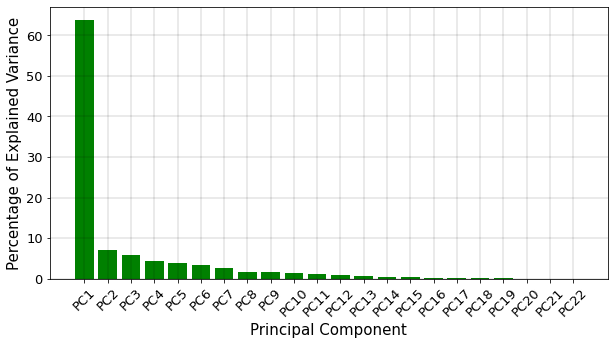

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.686043
1                                  2  2.362620
2                                  3  2.576985
3                                  4  2.045301
4                                  5  2.065828
5                                  6  1.850434
6                                  7  1.896509
7                                  8  1.817130
8                                  9  1.901955
9                                 10  1.920080
10                                11  1.931204
11                                12  1.987159
12                                13  2.035100
13                                14  2.139966
14                                15  2.241712
15                                16  2.297291
16                                17  2.296815
17                                18  2.327668
18                                19  2.161796
19                                20  2.329949
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


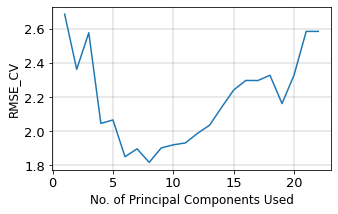

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:8]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.8214619487783574

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.03068088128218824

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.7768450797458405

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.0305271561306695

RMSE =  1.821
MAPE =  0.031
R-squared =  0.777
SMAPE =  0.031


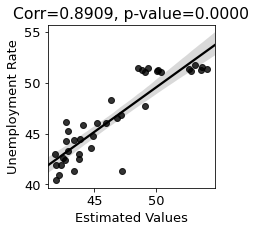

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Free State**

In [ ]:
# Building the inputs from here:

FS1 = FS.groupby('DesiredDate')['TextToLower'].count()
FS1 = pd.DataFrame({'DesiredDate':FS1.index.tolist(), 'TextToLower':FS1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(FS1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 3816.65it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    FS2 = FS[FS['TextToLower'].str.contains(keywords[k], na=False)]
    FS3 = FS2.groupby('DesiredDate')['TextToLower'].count()
    for item in FS3.index.to_list()[1:-1]:
        keyword_dates [k][item] += FS3 [item]

100%|██████████| 20/20 [00:01<00:00, 16.73it/s]


In [ ]:
N = FS.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 137/137 [00:00<00:00, 710.90it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
FS1 = FS.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = FS1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = FS.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  fs[:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,1.022509,37.5
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.333333,1.034048,35.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.000000,1.029569,36.2
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,8.000000,...,2.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,8.000000,1.000000,37.0
4,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,28.333333,...,10.666667,0.666667,0.0,0.0,0.0,0.666667,0.0,28.333333,1.053314,34.0


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.6995054976979248, 7.11969224644182e-10)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

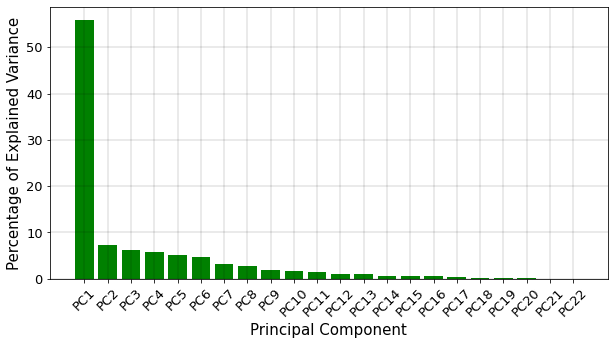

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.005101
1                                  2  1.737846
2                                  3  1.767105
3                                  4  1.785592
4                                  5  1.813453
5                                  6  1.901458
6                                  7  1.963411
7                                  8  1.914641
8                                  9  1.939721
9                                 10  2.090017
10                                11  2.040586
11                                12  2.131528
12                                13  2.135919
13                                14  2.074371
14                                15  2.318648
15                                16  2.397170
16                                17  2.470710
17                                18  2.312823
18                                19  2.321611
19                                20  2.439185
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


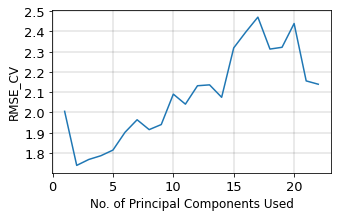

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:2]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.8903047329911387

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.03885163971986681

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.41448879383744397

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.039581346963292796

RMSE =  1.890
MAPE =  0.039
R-squared =  0.414
SMAPE =  0.040


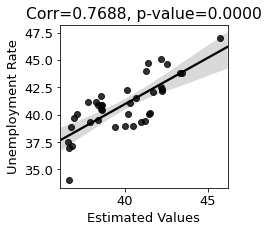

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Gauteng**

In [ ]:
# Building the inputs from here:

GT1 = GT.groupby('DesiredDate')['TextToLower'].count()
GT1 = pd.DataFrame({'DesiredDate':GT1.index.tolist(), 'TextToLower':GT1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(GT1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 1545.86it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    GT2 = GT[GT['TextToLower'].str.contains(keywords[k], na=False)]
    GT3 = GT2.groupby('DesiredDate')['TextToLower'].count()
    for item in GT3.index.to_list()[1:-1]:
        keyword_dates [k][item] += GT3 [item]

100%|██████████| 20/20 [00:18<00:00,  1.05it/s]


In [ ]:
N = GT.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 139/139 [00:00<00:00, 5384.96it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
GT1 = GT.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = GT1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = GT.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  gt[:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,4.666667,2.666667,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,203.333333,...,65.666667,7.666667,1.000000,3.666667,0.000000,11.000000,0.666667,203.333333,1.000000,31.9
1,0.0,2.666667,1.666667,1.000000,0.666667,5.000000,0.666667,1.333333,0.000000,203.666667,...,73.000000,5.666667,2.333333,4.666667,1.333333,3.333333,1.000000,203.666667,1.001490,31.8
2,0.0,1.333333,1.000000,0.000000,0.666667,2.333333,0.666667,2.666667,0.000000,129.000000,...,38.333333,5.000000,1.333333,4.666667,2.000000,5.000000,0.333333,129.000000,1.005351,31.8
3,0.0,4.000000,2.000000,0.333333,0.666667,5.333333,3.000000,4.333333,1.666667,392.333333,...,133.333333,11.000000,4.000000,10.333333,5.666667,14.333333,1.000000,392.333333,1.007488,31.9
4,0.0,9.333333,5.000000,3.000000,2.000000,10.333333,2.000000,13.000000,7.333333,559.000000,...,182.000000,11.333333,4.000000,43.000000,5.333333,21.333333,1.666667,559.000000,1.010380,31.6


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.8166892146635453, 3.139022974489139e-15)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

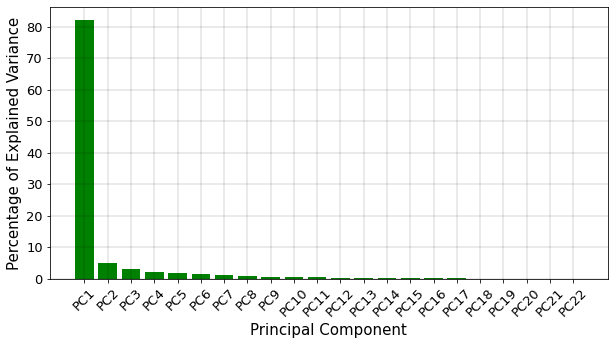

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.829957
1                                  2  1.701533
2                                  3  1.742408
3                                  4  1.523684
4                                  5  1.571160
5                                  6  1.602232
6                                  7  1.826700
7                                  8  1.851749
8                                  9  2.304737
9                                 10  2.328809
10                                11  2.245601
11                                12  2.444690
12                                13  2.556433
13                                14  2.211381
14                                15  2.397614
15                                16  2.440474
16                                17  2.630829
17                                18  2.736354
18                                19  3.200910
19                                20  3.254123
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


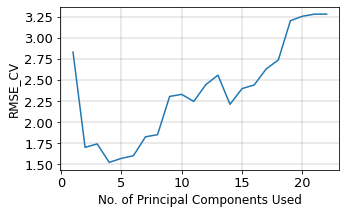

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:4]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.7333463572052275

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.03910402103838504

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.8733118970804797

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.03905383366114208

RMSE =  1.733
MAPE =  0.039
R-squared =  0.873
SMAPE =  0.039


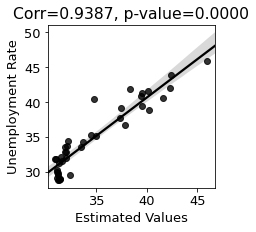

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

In [ ]:
train_x = x[:39,:]
train_y = y[:39]
test_x = x[39:,:]
test_y = y[39:]

In [ ]:
model = LinearRegression()
model.fit (train_x, train_y)

LinearRegression()

In [ ]:
output = model.predict (test_x)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(test_y)[i]) * (output[i] - list(test_y)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.6655987072994236

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs(output[i] - list(test_y)[i]) / list(test_y)[i]
mape = mape / l
mape

0.035032759336671646

In [ ]:
from sklearn.metrics import r2_score

#r2 = r2_score (output, test_y)
r2 = r2_score (test_y, output)
r2

0.6762040348818228

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(test_y)[i] - output[i])
    denom = (abs(output[i]) + abs(list(test_y)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.035540001769895815

In [ ]:
preds = [*lbls[21:39], *output]

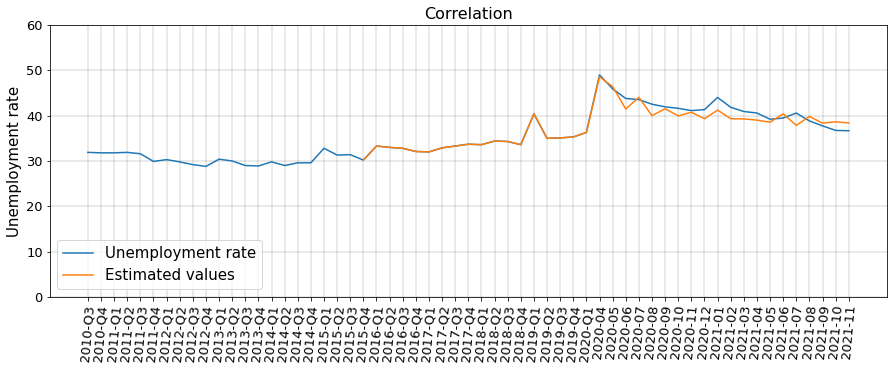

In [ ]:
#date = ['2016-01 to 03', '2016-04 to 06', '2016-07 to 09', '2016-10 to 12', '2017-01 to 03', '2017-04 to 06', '2017-07 to 09', '2017-10 to 12', '2018-01 to 03', '2018-04 to 06', '2018-07 to 09', '2018-10 to 12', '2019-01 to 03', '2019-04 to 06', '2019-07 to 09', '2019-10 to 12', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08']
plt.figure (figsize=(15,5))
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.title('Correlation', fontsize=16)
plt.plot (list(unemployment.keys()), list(lbls))
plt.plot (list(unemployment.keys())[-len(preds):], preds)
plt.rcParams.update({'font.size': 12})
plt.ylim(0, 60)
plt.xticks(rotation= 85)#'vertical')
#plt.plot (list(d.keys()), list(d.values()))
plt.ylabel ('Unemployment rate',fontsize=15)
plt.legend (['Unemployment rate', 'Estimated values'],loc='lower left', fontsize=15)
plt.show()

RMSE =  1.666
MAPE =  0.035
R-squared =  0.676
SMAPE =  0.036


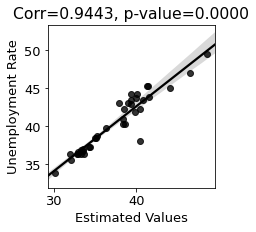

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':preds, 'Unemployment Rate':list(unemployment.values())[-len(preds):]})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(preds, list(unemployment.values())[-len(preds):])
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**KwaZulu-Natal**

In [ ]:
# Building the inputs from here:

NL1 = NL.groupby('DesiredDate')['TextToLower'].count()
NL1 = pd.DataFrame({'DesiredDate':NL1.index.tolist(), 'TextToLower':NL1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(NL1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 4034.92it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    NL2 = NL[NL['TextToLower'].str.contains(keywords[k], na=False)]
    NL3 = NL2.groupby('DesiredDate')['TextToLower'].count()
    for item in NL3.index.to_list()[1:-1]:
        keyword_dates [k][item] += NL3 [item]

100%|██████████| 20/20 [00:02<00:00,  7.54it/s]


In [ ]:
N = NL.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 139/139 [00:00<00:00, 5696.61it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
NL1 = NL.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = NL1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = NL.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  nl[:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,45.666667,...,16.000000,0.000000,1.000000,0.000000,0.000000,1.333333,0.000000,45.666667,1.042288,38.7
1,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,28.333333,...,9.333333,0.666667,0.333333,0.333333,0.333333,1.333333,0.333333,28.333333,1.021095,38.3
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,12.000000,...,4.000000,0.333333,0.333333,0.666667,0.000000,0.333333,0.000000,12.000000,1.020617,39.0
3,0.0,2.000000,1.666667,0.0,0.0,0.000000,0.0,1.666667,0.0,75.666667,...,31.000000,1.666667,0.333333,0.666667,1.000000,5.000000,0.000000,75.666667,1.033785,39.1
4,0.0,1.000000,0.333333,0.0,0.0,1.333333,0.0,1.333333,0.0,64.333333,...,20.333333,5.333333,1.666667,1.000000,0.333333,1.000000,0.666667,64.333333,1.007789,37.6


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.676488567131253, 4.081047915843631e-09)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

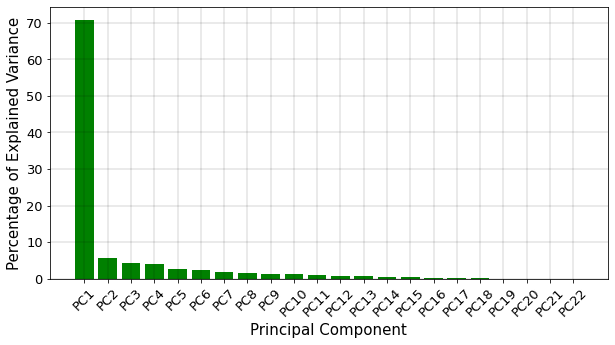

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.815719
1                                  2  1.875425
2                                  3  1.818821
3                                  4  1.802379
4                                  5  1.801004
5                                  6  1.779815
6                                  7  1.827616
7                                  8  1.889702
8                                  9  1.740366
9                                 10  1.724319
10                                11  1.902944
11                                12  1.981471
12                                13  1.829095
13                                14  1.862724
14                                15  1.915497
15                                16  1.996443
16                                17  1.956927
17                                18  1.975708
18                                19  2.049904
19                                20  2.236320
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


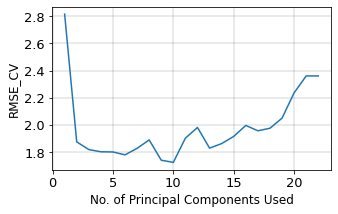

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:4]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

2.1860860592856275

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.03908414799040797

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.6248993147055013

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.039781295310035596

RMSE =  2.186
MAPE =  0.039
R-squared =  0.625
SMAPE =  0.040


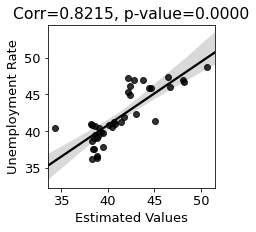

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

In [ ]:
train_x = x[21:36,:]
train_y = y[21:36]
test_x = x[36:,:]
test_y = y[36:]

In [ ]:
model = LinearRegression()
model.fit (train_x, train_y)

LinearRegression()

In [ ]:
output = model.predict (test_x)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(test_y)[i]) * (output[i] - list(test_y)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

2.065611657849978

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs(output[i] - list(test_y)[i]) / list(test_y)[i]
mape = mape / l
mape

0.036027327822127614

In [ ]:
from sklearn.metrics import r2_score

#r2 = r2_score (output, test_y)
r2 = r2_score (test_y, output)
r2

0.33749361462853367

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(test_y)[i] - output[i])
    denom = (abs(output[i]) + abs(list(test_y)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.03685370568783062

In [ ]:
preds = [*lbls[21:36], *output]

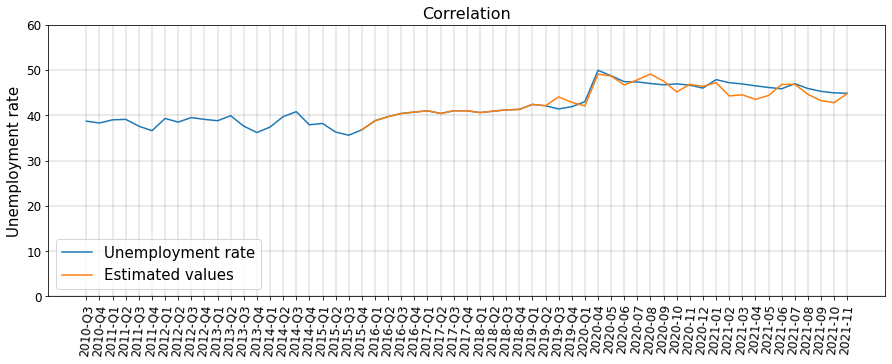

In [ ]:
#date = ['2016-01 to 03', '2016-04 to 06', '2016-07 to 09', '2016-10 to 12', '2017-01 to 03', '2017-04 to 06', '2017-07 to 09', '2017-10 to 12', '2018-01 to 03', '2018-04 to 06', '2018-07 to 09', '2018-10 to 12', '2019-01 to 03', '2019-04 to 06', '2019-07 to 09', '2019-10 to 12', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08']
plt.figure (figsize=(15,5))
plt.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.title('Correlation', fontsize=16)
plt.plot (list(unemployment.keys()), list(lbls))
plt.plot (list(unemployment.keys())[-len(preds):], preds)

plt.rcParams.update({'font.size': 12})
plt.ylim(0, 60)
plt.xticks(rotation= 85)#'vertical')
#plt.plot (list(d.keys()), list(d.values()))
plt.ylabel ('Unemployment rate',fontsize=15)
plt.legend (['Unemployment rate', 'Estimated values'],loc='lower left', fontsize=15)
plt.show()

RMSE =  2.066
MAPE =  0.036
R-squared =  0.337
SMAPE =  0.037


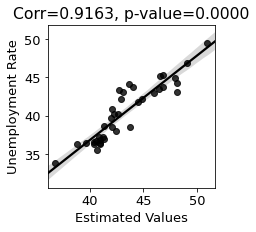

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':preds, 'Unemployment Rate':list(unemployment.values())[-len(preds):]})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(preds, list(unemployment.values())[-len(preds):])
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Limpopo**

In [ ]:
# Building the inputs from here:

LM1 = LM.groupby('DesiredDate')['TextToLower'].count()
LM1 = pd.DataFrame({'DesiredDate':LM1.index.tolist(), 'TextToLower':LM1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(LM1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 2336.07it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    LM2 = LM[LM['TextToLower'].str.contains(keywords[k], na=False)]
    LM3 = LM2.groupby('DesiredDate')['TextToLower'].count()
    for item in LM3.index.to_list()[1:-1]:
        keyword_dates [k][item] += LM3 [item]

100%|██████████| 20/20 [00:01<00:00, 17.26it/s]


In [ ]:
N = LM.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 134/134 [00:00<00:00, 1327.24it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
LM1 = LM.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = LM1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = LM.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  lm[1:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.666667,1.022735,42.6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.000000,...,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.333333,1.010361,44.7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.333333,...,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,5.333333,1.019935,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,9.000000,...,3.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,9.000000,1.000000,42.6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,14.000000,...,3.333333,0.333333,0.0,0.0,0.0,0.666667,0.0,14.000000,1.041186,44.7


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.4039817606246971, 0.001661565943553546)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

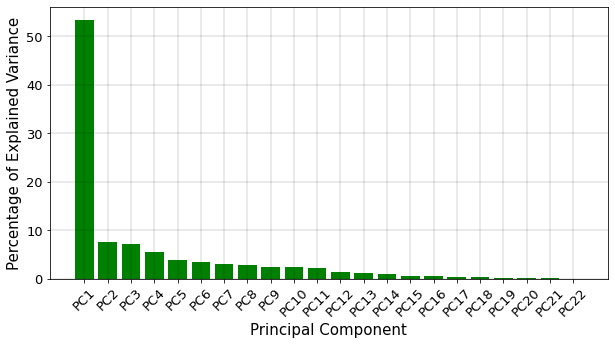

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used    RMSE_CV
0                                  1   4.717590
1                                  2   3.457863
2                                  3   3.464549
3                                  4   3.547909
4                                  5   3.469373
5                                  6   3.629527
6                                  7   3.680494
7                                  8   3.626481
8                                  9   3.663151
9                                 10   3.609381
10                                11   3.772615
11                                12   3.241527
12                                13   3.281068
13                                14   3.928269
14                                15   3.994570
15                                16   4.051716
16                                17   4.116108
17                                18   4.234315
18                                19   4.342535
19                                20   8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


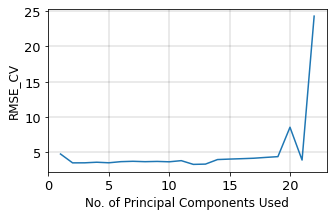

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:2]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

19

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

3.7782455697136763

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.07347797658250417

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.3843113909523632

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.07105477496891331

RMSE =  3.778
MAPE =  0.073
R-squared =  0.384
SMAPE =  0.071


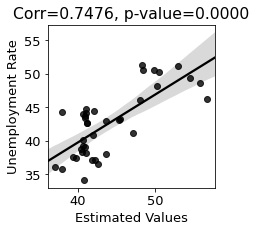

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Mpumalanga**

In [ ]:
# Building the inputs from here:

MP1 = MP.groupby('DesiredDate')['TextToLower'].count()
MP1 = pd.DataFrame({'DesiredDate':MP1.index.tolist(), 'TextToLower':MP1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(MP1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 1210.55it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    MP2 = MP[MP['TextToLower'].str.contains(keywords[k], na=False)]
    MP3 = MP2.groupby('DesiredDate')['TextToLower'].count()
    for item in MP3.index.to_list()[1:-1]:
        keyword_dates [k][item] += MP3 [item]

100%|██████████| 20/20 [00:01<00:00, 17.00it/s]


In [ ]:
N = MP.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 136/136 [00:00<00:00, 3759.90it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
MP1 = MP.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = MP1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = MP.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  mp[:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,5.500000,...,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.666667,1.555785,43.2
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.500000,...,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,1.000000,1.561513,44.3
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,6.000000,...,1.5,0.0,0.0,0.000000,0.0,0.0,0.0,4.000000,1.546876,45.2
3,0.0,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,11.000000,...,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,11.000000,1.510420,43.8
4,0.0,0.333333,0.333333,0.0,0.0,0.666667,0.0,0.666667,0.0,13.666667,...,3.0,1.0,0.0,0.333333,0.0,1.0,0.0,13.666667,1.580897,42.7


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.5104864956553017, 3.617030522400312e-05)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

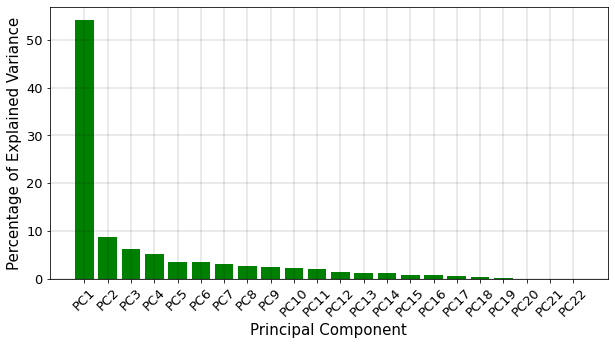

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.343362
1                                  2  2.038399
2                                  3  1.921696
3                                  4  1.947374
4                                  5  1.986687
5                                  6  2.033965
6                                  7  2.030925
7                                  8  1.771251
8                                  9  1.813641
9                                 10  1.848152
10                                11  1.912352
11                                12  1.938066
12                                13  1.926757
13                                14  1.972673
14                                15  2.233392
15                                16  2.218843
16                                17  2.181635
17                                18  2.242946
18                                19  2.313746
19                                20  2.374564
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


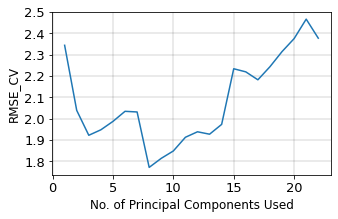

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:3]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.7921063337147505

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.03473579699493853

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.4693672180668318

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.034819859718990466

RMSE =  1.792
MAPE =  0.035
R-squared =  0.469
SMAPE =  0.035


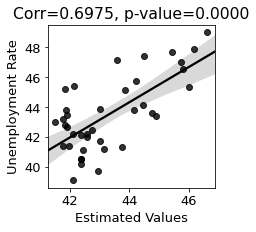

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Northern Cape**

In [ ]:
# Building the inputs from here:

NC1 = NC.groupby('DesiredDate')['TextToLower'].count()
NC1 = pd.DataFrame({'DesiredDate':NC1.index.tolist(), 'TextToLower':NC1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(NC1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 1051.12it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    NC2 = NC[NC['TextToLower'].str.contains(keywords[k], na=False)]
    NC3 = NC2.groupby('DesiredDate')['TextToLower'].count()
    for item in NC3.index.to_list()[1:-1]:
        keyword_dates [k][item] += NC3 [item]

100%|██████████| 20/20 [00:00<00:00, 41.88it/s]


In [ ]:
N = NC.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 128/128 [00:00<00:00, 2315.71it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
NC1 = NC.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = NC1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = NC.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  nc[4:59]

In [ ]:
len(nc)

59

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.071032,37.3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.333333,...,2.666667,0.000000,0.000000,0.0,0.0,0.000000,0.0,7.333333,1.104298,36.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.333333,...,2.333333,0.000000,0.000000,0.0,0.0,0.333333,0.0,4.333333,1.070244,35.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.666667,...,1.333333,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.666667,1.000000,33.8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.666667,...,3.000000,0.666667,0.333333,0.0,0.0,0.666667,0.0,15.666667,1.095259,37.1


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.7013722075498011, 6.135297801516346e-10)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

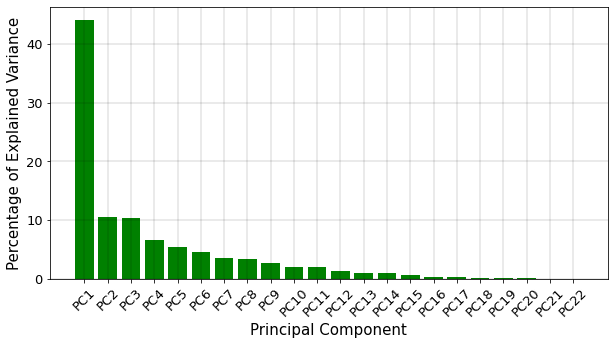

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used       RMSE_CV
0                                  1      4.293131
1                                  2      3.981628
2                                  3      3.931239
3                                  4      3.938903
4                                  5      3.959311
5                                  6      4.907542
6                                  7      4.146980
7                                  8      4.242867
8                                  9      5.213726
9                                 10      4.809107
10                                11      4.208853
11                                12      5.899049
12                                13      4.290491
13                                14      6.859122
14                                15     47.790015
15                                16     34.628711
16                                17    537.066100
17                                18    541.098106
18                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


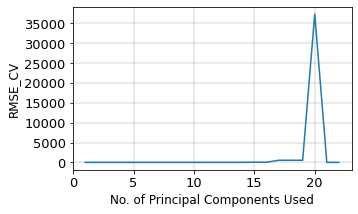

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:3]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

18

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

4.919498110181563

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.09024682485618629

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.5450612868208287

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.08582859700338011

RMSE =  4.919
MAPE =  0.090
R-squared =  0.545
SMAPE =  0.086


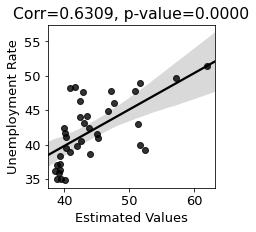

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**North West**

In [ ]:
# Building the inputs from here:

NW1 = NW.groupby('DesiredDate')['TextToLower'].count()
NW1 = pd.DataFrame({'DesiredDate':NW1.index.tolist(), 'TextToLower':NW1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(NW1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 1963.21it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    NW2 = NW[NW['TextToLower'].str.contains(keywords[k], na=False)]
    NW3 = NW2.groupby('DesiredDate')['TextToLower'].count()
    for item in NW3.index.to_list()[1:-1]:
        keyword_dates [k][item] += NW3 [item]

100%|██████████| 20/20 [00:01<00:00, 15.18it/s]


In [ ]:
N = NW.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 136/136 [00:00<00:00, 2920.79it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
NW1 = NW.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = NW1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = NW.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  nw[1:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.333333,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.333333,1.348205,41.6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.333333,...,1.333333,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.333333,1.377367,42.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,11.000000,...,3.666667,0.000000,0.0,0.0,0.000000,0.000000,0.0,11.000000,1.381120,46.3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,45.000000,...,12.333333,0.666667,0.0,0.0,0.333333,3.333333,0.0,45.000000,1.546810,46.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,54.000000,...,21.000000,1.666667,1.0,1.0,0.333333,1.333333,0.0,54.000000,1.427946,45.0


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.5200520483506438, 2.426705122111987e-05)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

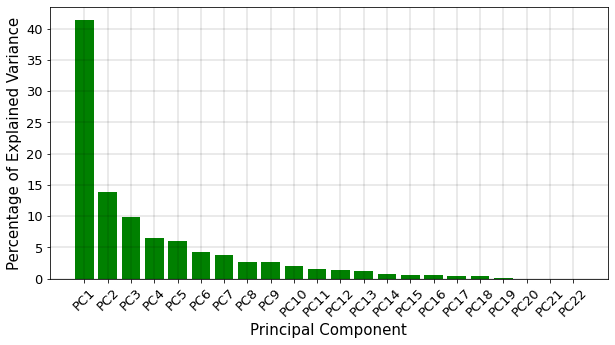

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  2.523624
1                                  2  2.898671
2                                  3  2.213329
3                                  4  2.328539
4                                  5  2.230403
5                                  6  2.208982
6                                  7  2.342037
7                                  8  2.549206
8                                  9  2.826068
9                                 10  2.929338
10                                11  2.888475
11                                12  2.874108
12                                13  2.326539
13                                14  2.669825
14                                15  2.759571
15                                16  2.965022
16                                17  3.840834
17                                18  3.640799
18                                19  3.789352
19                                20  6.185630
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


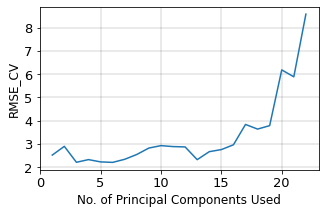

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:8]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

19

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

3.1748827138968028

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.046623769474836964

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (output, y_test)
#r2 = r2_score (y_test, output)
r2

0.3285684267525012

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.04807055519050534

RMSE =  3.175
MAPE =  0.047
R-squared =  0.328
SMAPE =  0.048


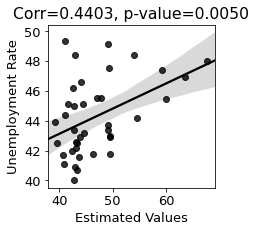

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)

**Western Cape**

In [ ]:
# Building the inputs from here:

WC1 = WC.groupby('DesiredDate')['TextToLower'].count()
WC1 = pd.DataFrame({'DesiredDate':WC1.index.tolist(), 'TextToLower':WC1.values.tolist()})

In [ ]:
keyword_dates = {}
for k in tqdm(keywords.keys()):
    keyword_dates[k] = {}
    for item in list(WC1['DesiredDate'])[1:-1]:
        keyword_dates[k][item] = 0

100%|██████████| 20/20 [00:00<00:00, 1896.07it/s]


In [ ]:
for k in tqdm(keywords.keys()):
    WC2 = WC[WC['TextToLower'].str.contains(keywords[k], na=False)]
    WC3 = WC2.groupby('DesiredDate')['TextToLower'].count()
    for item in WC3.index.to_list()[1:-1]:
        keyword_dates [k][item] += WC3 [item]

100%|██████████| 20/20 [00:06<00:00,  3.28it/s]


In [ ]:
N = WC.groupby('Date')['TextToLower'].count ()
N = pd.DataFrame ({'Date':N.index.tolist(), 'TextToLower':N.values.tolist()})
all_dates1 = list (N['Date'])
mark_date = pd.to_datetime ('2020-04')
desired_dates1 = [pd.to_datetime(x.to_period('Q').strftime('%Y-Q%q')) if x < mark_date else x for x in tqdm(all_dates1)]
N['DesiredDate'] = desired_dates1
N = N.groupby('DesiredDate')['TextToLower'].count ()
N = pd.DataFrame ({'DesiredDate':N.index.tolist(), 'count':N.values.tolist()})

100%|██████████| 139/139 [00:00<00:00, 3946.44it/s]


In [ ]:
for k1 in keyword_dates.keys():
  i = 1
  for k2 in keyword_dates[k1].keys():
      keyword_dates[k1][k2] /= N['count'][i]
      i += 1

In [ ]:
# This is the actual data
data = {}
for k1 in keyword_dates.keys():
  for k2 in keyword_dates[k1].keys():
    data [k1] = list (keyword_dates[k1].values())

In [ ]:
WC1 = WC.groupby('DesiredDate')['TextToLower'].count()

In [ ]:
# Because the quarterly tweets should be divided by 3

d = WC1.values.tolist()[1:-1]
d = [x/3 if i < 39 else x for x, i in zip(d, range(0,59))]

In [ ]:
data ['TotalDataset'] = d

In [ ]:
scores = WC.groupby('DesiredDate')['Score'].sum().to_dict()

In [ ]:
# Normalizing
mx = max(list(scores.values()))
mn = -min(list(scores.values()))
mx = max([mx, mn])
val = [x/mx for x in list(scores.values())]
scores.update(zip(scores, val))

In [ ]:
mx = max (list(scores.values())) + 1
scores = [mx-x for x in list(scores.values())]

In [ ]:
data['Score'] = scores[1:-1]

In [ ]:
data['Unemployment'] =  wc[:59]

In [ ]:
data = pd.DataFrame (data)

In [ ]:
data.head()

,LostJob,Employed,Unemployed,Retrench,Jobless,Debt,Bankruptcy,Loan,Famine,Broke,...,Buy,Rent,Lend,Poverty,Payment,Afford,Canned,TotalDataset,Score,Unemployment
0,0.0,3.666667,2.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,140.333333,...,53.666667,8.000000,2.333333,3.000000,2.333333,5.666667,0.000000,140.333333,1.022312,25.5
1,0.0,1.333333,0.666667,0.666667,0.000000,1.333333,0.666667,1.666667,0.000000,90.333333,...,35.333333,3.333333,1.000000,2.000000,3.000000,3.666667,0.333333,90.333333,1.034309,24.0
2,0.0,1.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.000000,0.000000,68.666667,...,26.333333,2.666667,0.666667,1.333333,1.000000,4.000000,0.000000,68.666667,1.045413,23.8
3,0.0,2.333333,1.666667,0.333333,1.333333,4.333333,0.333333,3.666667,0.333333,187.000000,...,69.000000,6.666667,1.000000,5.333333,2.000000,6.666667,0.333333,187.000000,1.000040,23.6
4,0.0,5.333333,4.000000,0.666667,0.333333,5.333333,1.333333,8.333333,2.000000,228.666667,...,71.000000,8.000000,3.333333,6.000000,2.333333,9.666667,1.000000,228.666667,1.049311,25.0


In [ ]:
from scipy import stats
stats.pearsonr (list (data['Unemployment']), list (data['TotalDataset']))

(0.27629614496746063, 0.03415063555560787)

In [ ]:
df3 = data.drop (columns=['Unemployment'])

In [ ]:
lbls = data['Unemployment']

In [ ]:
scaled_data = preprocessing.scale (df3)

In [ ]:
pca = PCA()
pca.fit (scaled_data)
pca_data = pca.transform (scaled_data)

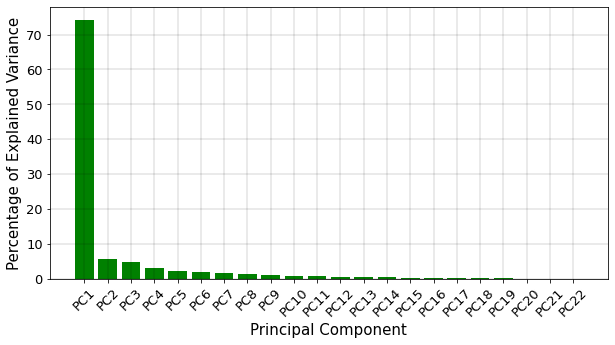

In [ ]:
per_var = np.round (pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

f = plt.figure (figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='green')
plt.rcParams.update({'font.size': 13})
plt.xticks(rotation=45)
plt.ylabel ('Percentage of Explained Variance', {'fontsize': 15})
plt.xlabel ('Principal Component', {'fontsize': 15})
#plt.title ('Scree Plot')
plt.show ()

In [ ]:
M = pca_data.shape[1]
MSEs = []
seed = 20
cv_folds = 10
for m in range (M):
    model = LinearRegression ()
    cv = KFold (n_splits=cv_folds, random_state=seed, shuffle=True)
    cv10 = cross_val_score (model, pca_data[:, 0:m+1], y=lbls, cv=cv, scoring='neg_mean_squared_error')
    MSEs += [np.mean (np.abs(cv10))]

    No. of Principal Components Used   RMSE_CV
0                                  1  1.927506
1                                  2  1.470319
2                                  3  1.440602
3                                  4  1.480329
4                                  5  1.447059
5                                  6  1.322871
6                                  7  1.409702
7                                  8  1.441359
8                                  9  1.381746
9                                 10  1.313051
10                                11  1.229319
11                                12  1.248303
12                                13  1.213772
13                                14  1.221474
14                                15  1.348612
15                                16  1.304359
16                                17  1.381745
17                                18  1.344034
18                                19  1.414610
19                                20  1.507549
20           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


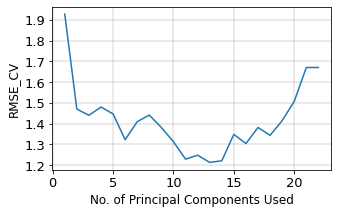

In [ ]:
df6 = pd.DataFrame ({'No. of Principal Components Used': np.arange(1,M+1), 'RMSE_CV':np.sqrt(MSEs)})
print (df6)
f = plt.figure (figsize=(5,3))
ax1 = sns.lineplot (data=df6, x='No. of Principal Components Used', y='RMSE_CV')
ax1 = f.add_subplot(111)
plt.rcParams.update({'font.size': 9})
plt.ylabel ('RMSE_CV', {'fontsize': 12})
plt.xlabel ('No. of Principal Components Used', {'fontsize': 12})
ax1.grid(linestyle='-', linewidth=0.2, alpha=0.8, color='k')
plt.show();

In [ ]:
x = pca_data[:,0:3]
y = lbls

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.66, random_state=42)
len (y_train)

20

In [ ]:
model = LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

In [ ]:
output = model.predict (x_test)

In [ ]:
l = len (output)
rmse = 0
for i in range (0, l):
    rmse += (output[i] - list(y_test)[i]) * (output[i] - list(y_test)[i])
rmse = rmse / l
rmse = np.sqrt (rmse)
rmse

1.4919197679450888

In [ ]:
l = len (output)
mape = 0
for i in range (0, l):
    mape += np.abs (output[i] - list(y_test)[i]) / list(y_test)[i]
mape = mape / l
mape

0.04894980749827943

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score (y_test, output)
r2

0.4075003146774657

In [ ]:
nom = 0
denom = 0
smape = 0
l = len (output)
for i in range (0, l):
    nom = abs (list(y_test)[i] - output[i])
    denom = (abs(output[i]) + abs(list(y_test)[i])) / 2
    smape += (nom / denom)
smape /= l
smape

0.04963947542662784

RMSE =  1.492
MAPE =  0.049
R-squared =  0.408
SMAPE =  0.050


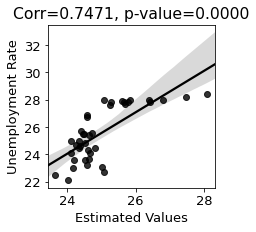

In [ ]:
print ('RMSE = ', "{:.3f}".format(rmse))
print ('MAPE = ', "{:.3f}".format(mape))
print ('R-squared = ', "{:.3f}".format(r2))
print ('SMAPE = ', "{:.3f}".format(smape))
ln = range(33, 50)
df6 = pd.DataFrame ({'Estimated Values':output, 'Unemployment Rate':y_test})

plt.figure (figsize=(3,3))
plt.rcParams.update({'font.size': 13})
p = stats.pearsonr(output, y_test)
plt.title ('Corr='+"{:.4f}".format(p[0]) + ', p-value='+"{:.4f}".format(p[1]))
sns.regplot (x='Estimated Values', y='Unemployment Rate', color='k', data=df6, truncate=False)